# Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn import tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)
pd.set_option('display.float.format',lambda x:'%.5f'%x)

In [2]:
%%capture
!pip install imblearn

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import BorderlineSMOTE
#from imblearn.over_sampling import SVMSMOTE
#from imblearn.over_sampling import KMeansSMOTE

# Data Loading:

In [3]:
df=pd.read_csv('Thyroid.csv')
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0 41.00000   F            f                  f                         f    f   
1 23.00000   F            f                  f                         f    f   
2 46.00000   M            f                  f                         f    f   
3 70.00000   F            t                  f                         f    f   
4 70.00000   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  \
0        f               f              f                 f   
1        f               f              f                 f   
2        f               f              f                 f   
3        f               f              f                 f   
4        f               f              f                 f   

  query_hyperthyroid lithium goitre tumor hypopituitary psych TSH_measured  \
0                  f       f      f     f             f     f            t   
1                  f       f      f     f             f     f            t   
2                  f       f      f     f             f     f            t   
3                  f       f      f     f             f     f            t   
4                  f       f      f     f             f     f            t   

      TSH T3_measured      T3 TT4_measured       TT4 T4U_measured     T4U  \
0 1.30000           t 2.50000            t 125.00000            t 1.14000   
1 4.10000           t 2.00000            t 102.00000            f     NaN   
2 0.98000           f     NaN            t 109.00000            t 0.91000   
3 0.16000           t 1.90000            t 175.00000            f     NaN   
4 0.72000           t 1.20000            t  61.00000            t 0.87000   

  FTI_measured       FTI TBG_measured  TBG referral_source     Class  
0            t 109.00000            f  NaN            SVHC  negative  
1            f       NaN            f  NaN           other  negative  
2            t 120.00000            f  NaN           other  negative  
3            f       NaN            f  NaN           other  negative  
4            t  70.00000            f  NaN             SVI  negative

# Data Understanding:

In [4]:
df.shape

(3772, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [6]:
mode=df.select_dtypes(include=['int','float']).mode().rename(index={0:'mode'})

df.describe().append(mode)

age        TSH         T3        TT4        T4U        FTI  \
count 3771.00000 3403.00000 3003.00000 3541.00000 3385.00000 3387.00000   
mean    51.73588    5.08677    2.01350  108.31934    0.99500  110.46965   
std     20.08496   24.52147    0.82743   35.60425    0.19546   33.08970   
min      1.00000    0.00500    0.05000    2.00000    0.25000    2.00000   
25%     36.00000    0.50000    1.60000   88.00000    0.88000   93.00000   
50%     54.00000    1.40000    2.00000  103.00000    0.98000  107.00000   
75%     67.00000    2.70000    2.40000  124.00000    1.08000  124.00000   
max    455.00000  530.00000   10.60000  430.00000    2.32000  395.00000   
mode    59.00000    0.20000    2.00000  101.00000    0.99000  100.00000   

          TBG  
count 0.00000  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN  
mode      NaN

# Data cleaning:

## Dealing with null values:

In [7]:
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [8]:
# dropping TBG column since it has 100% null values..

df.drop('TBG',axis=1,inplace=True)

In [9]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
TBG_measured                   0
referral_source                0
Class                          0
dtype: int64

In [10]:
# since, age is a continuos variable, we use median to replace null values.

df['age'].fillna(df['age'].median(),inplace=True)

# since, sex is a categorical variable, we use mode to replace null values.

df['sex'].fillna(df['sex'].mode()[0],inplace=True)

# For all remaining variables,they have null values when the corresponding measured variable is false.so we will use 0 for them.

df.fillna(0,inplace=True)

In [11]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
Class                        0
dtype: int64

# Sanity checks:

In [12]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0 41.00000   F            f                  f                         f    f   
1 23.00000   F            f                  f                         f    f   
2 46.00000   M            f                  f                         f    f   
3 70.00000   F            t                  f                         f    f   
4 70.00000   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  \
0        f               f              f                 f   
1        f               f              f                 f   
2        f               f              f                 f   
3        f               f              f                 f   
4        f               f              f                 f   

  query_hyperthyroid lithium goitre tumor hypopituitary psych TSH_measured  \
0                  f       f      f     f             f     f            t   
1                  f       f      f     f             f     f            t   
2                  f       f      f     f             f     f            t   
3                  f       f      f     f             f     f            t   
4                  f       f      f     f             f     f            t   

      TSH T3_measured      T3 TT4_measured       TT4 T4U_measured     T4U  \
0 1.30000           t 2.50000            t 125.00000            t 1.14000   
1 4.10000           t 2.00000            t 102.00000            f 0.00000   
2 0.98000           f 0.00000            t 109.00000            t 0.91000   
3 0.16000           t 1.90000            t 175.00000            f 0.00000   
4 0.72000           t 1.20000            t  61.00000            t 0.87000   

  FTI_measured       FTI TBG_measured referral_source     Class  
0            t 109.00000            f            SVHC  negative  
1            f   0.00000            f           other  negative  
2            t 120.00000            f           other  negative  
3            f   0.00000            f           other  negative  
4            t  70.00000            f             SVI  negative

## Checking data types:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

## Checking data types

In [14]:
print(df['age'].dtype)

df['age']=df['age'].astype('int')

df['age'].dtype

float64


dtype('int32')

## Dropping redundant columns:

In [15]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

In [16]:
for i in df.columns:
    if df[i].nunique()==1:
        print(i)

TBG_measured


In [17]:
df.drop('TBG_measured',axis=1,inplace=True)

In [18]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'referral_source', 'Class'],
      dtype='object')

## Checking for duplicates:

In [19]:
df.duplicated().value_counts()

False    3709
True       63
dtype: int64

In [20]:
# total 63 duplicates, so we will be dropping them.

df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().value_counts()

False    3709
dtype: int64

# Range checks:

In [22]:
df_num=df.select_dtypes(include=['float64','int32'])
df_num.describe()

age        TSH         T3        TT4        T4U        FTI
count 3709.00000 3709.00000 3709.00000 3709.00000 3709.00000 3709.00000
mean    51.85683    4.66669    1.62970  103.39250    0.90780  100.85945
std     20.12538   23.52962    1.08626   41.47802    0.33769   44.38608
min      1.00000    0.00000    0.00000    0.00000    0.00000    0.00000
25%     36.00000    0.25000    1.00000   85.00000    0.84000   88.00000
50%     54.00000    1.20000    1.80000  102.00000    0.96000  104.00000
75%     67.00000    2.50000    2.30000  123.00000    1.07000  122.00000
max    455.00000  530.00000   10.60000  430.00000    2.32000  395.00000

In [23]:
df.age.sort_values(ascending=False).head(5)

1364    455
1129     94
2673     94
2418     93
3014     93
Name: age, dtype: int32

In [24]:
# age can't be more than 100-120.

df[df.age>100].shape

(1, 28)

In [25]:
df.age=df.age.apply(lambda x: 94 if x>100 else x)

df[df.age>100].shape

(0, 28)

In [26]:
df.describe()

age        TSH         T3        TT4        T4U        FTI
count 3709.00000 3709.00000 3709.00000 3709.00000 3709.00000 3709.00000
mean    51.75950    4.66669    1.62970  103.39250    0.90780  100.85945
std     19.01762   23.52962    1.08626   41.47802    0.33769   44.38608
min      1.00000    0.00000    0.00000    0.00000    0.00000    0.00000
25%     36.00000    0.25000    1.00000   85.00000    0.84000   88.00000
50%     54.00000    1.20000    1.80000  102.00000    0.96000  104.00000
75%     67.00000    2.50000    2.30000  123.00000    1.07000  122.00000
max     94.00000  530.00000   10.60000  430.00000    2.32000  395.00000

Looks like all the variables representing harmone variables are having outliers

## Handling Outliers

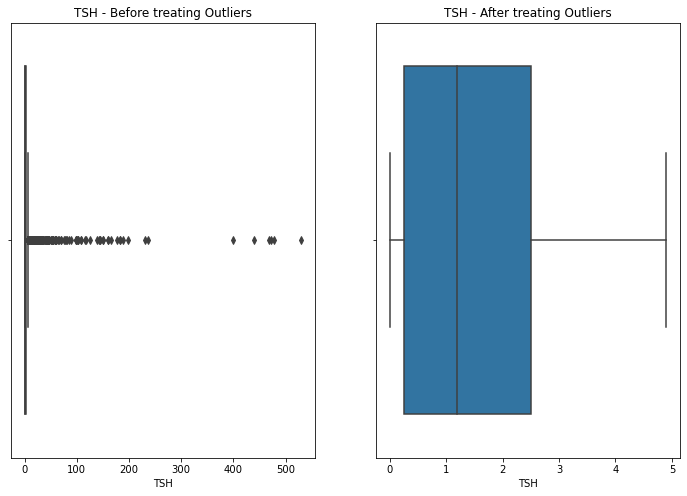

In [27]:
plt.figure(figsize = [12,8])                          #
plt.subplot(1,2,1)
sns.boxplot(df.TSH)
plt.title('TSH - Before treating Outliers',size=12)


lower=df.TSH.min()
upper=df.TSH.quantile(0.88)
df.TSH=df.TSH.clip(lower=lower,upper=upper)

plt.subplot(1,2,2)
sns.boxplot(df.TSH)
plt.title('TSH - After treating Outliers',size=12)

plt.show()

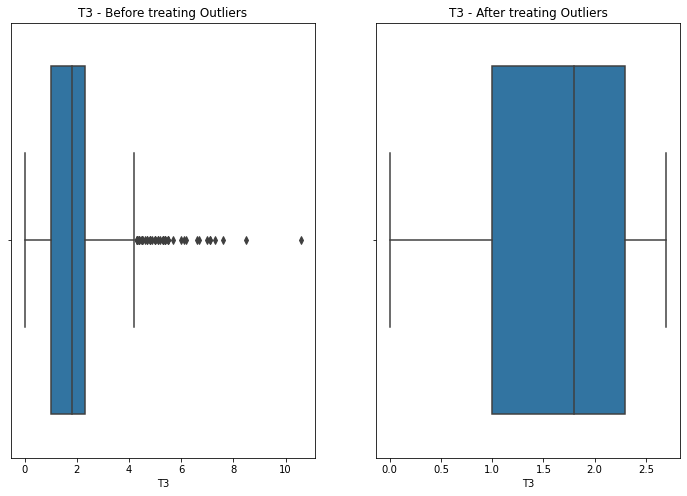

In [28]:
plt.figure(figsize = [12,8])                          #
plt.subplot(1,2,1)
sns.boxplot(df.T3)
plt.title('T3 - Before treating Outliers',size=12)

lower=df.T3.min()
upper=df.T3.quantile(0.9)
df.T3=df.T3.clip(lower=lower,upper=upper)

plt.subplot(1,2,2)
sns.boxplot(df.T3)
plt.title('T3 - After treating Outliers',size=12)

plt.show()

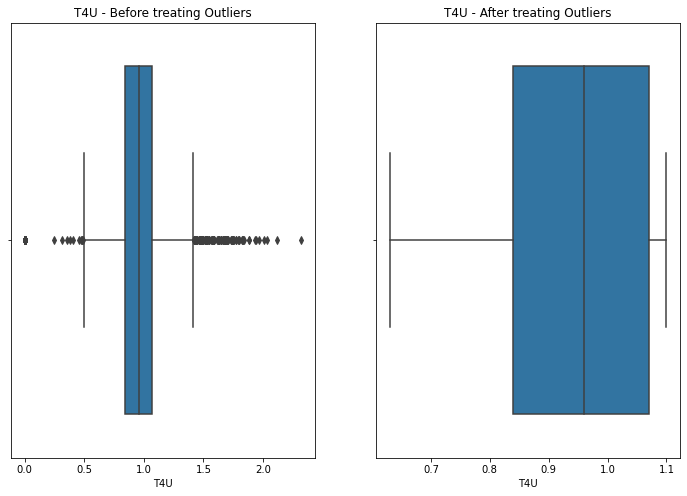

In [29]:
plt.figure(figsize = [12,8])                          #
plt.subplot(1,2,1)
sns.boxplot(df.T4U)
plt.title('T4U - Before treating Outliers',size=12)

lower=df.T4U.quantile(0.1)
upper=df.T4U.quantile(0.8)
df.T4U=df.T4U.clip(lower=lower,upper=upper)

plt.subplot(1,2,2)
sns.boxplot(df.T4U)
plt.title('T4U - After treating Outliers',size=12)

plt.show()

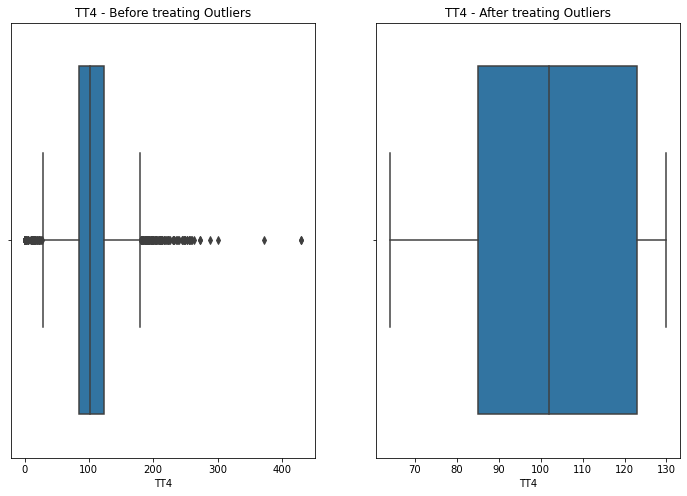

In [30]:
plt.figure(figsize = [12,8])                          #
plt.subplot(1,2,1)
sns.boxplot(df.TT4)
plt.title('TT4 - Before treating Outliers',size=12)

lower=df.TT4.quantile(0.1)
upper=df.TT4.quantile(0.8)
df.TT4=df.TT4.clip(lower=lower,upper=upper)

plt.subplot(1,2,2)
sns.boxplot(df.TT4.clip(lower=lower,upper=upper))
plt.title('TT4 - After treating Outliers',size=12)

plt.show()

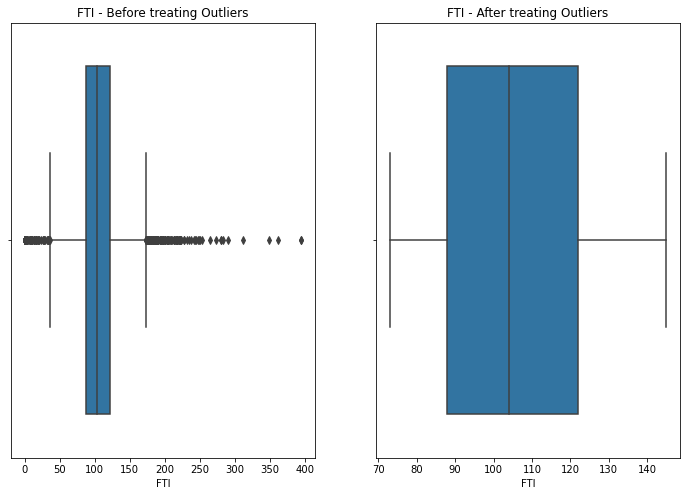

In [31]:
plt.figure(figsize = [12,8])                          #
plt.subplot(1,2,1)
sns.boxplot(df.FTI)
plt.title('FTI - Before treating Outliers',size=12)

lower=df.FTI.quantile(0.15)
upper=df.FTI.quantile(0.9)
df.FTI=df.FTI.clip(lower=lower,upper=upper)

plt.subplot(1,2,2)
sns.boxplot(df.FTI)
plt.title('FTI - After treating Outliers',size=12)

plt.show()

## Feature Engineering:

Thyroid stimulating Harmone is one of the main indicator, so we will create a new variable indicating whether TSH levels are normal or not

In [32]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'referral_source', 'Class'],
      dtype='object')

In [33]:
# TSH normal values are 0.5 to 5.0 mIU/L

df.insert(17,'TSH_Normal',df['TSH'].apply(lambda x: 1 if (x>=0.5)&(x<=5.0) else 0 ))

In [34]:
df['TSH_Normal'].value_counts(normalize=True)*100

1   68.85953
0   31.14047
Name: TSH_Normal, dtype: float64

In [35]:
df.insert(26,'All_harmones_measured',0)

In [36]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0   41   F            f                  f                         f    f   
1   23   F            f                  f                         f    f   
2   46   M            f                  f                         f    f   
3   70   F            t                  f                         f    f   
4   70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  \
0        f               f              f                 f   
1        f               f              f                 f   
2        f               f              f                 f   
3        f               f              f                 f   
4        f               f              f                 f   

  query_hyperthyroid lithium goitre tumor hypopituitary psych TSH_measured  \
0                  f       f      f     f             f     f            t   
1                  f       f      f     f             f     f            t   
2                  f       f      f     f             f     f            t   
3                  f       f      f     f             f     f            t   
4                  f       f      f     f             f     f            t   

   TSH_Normal     TSH T3_measured      T3 TT4_measured       TT4 T4U_measured  \
0           1 1.30000           t 2.50000            t 125.00000            t   
1           1 4.10000           t 2.00000            t 102.00000            f   
2           1 0.98000           f 0.00000            t 109.00000            t   
3           0 0.16000           t 1.90000            t 130.00000            f   
4           1 0.72000           t 1.20000            t  64.00000            t   

      T4U FTI_measured  All_harmones_measured       FTI referral_source  \
0 1.10000            t                      0 109.00000            SVHC   
1 0.63000            f                      0  73.00000           other   
2 0.91000            t                      0 120.00000           other   
3 0.63000            f                      0  73.00000           other   
4 0.87000            t                      0  73.00000             SVI   

      Class  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative

In [37]:
df['All_harmones_measured'][(df.TSH_measured=='t')&(df.T3_measured=='t')&(df.TT4_measured=='t')&(df.T4U_measured=='t')&(df.FTI_measured=='t')]=1

In [38]:
df['All_harmones_measured'].value_counts(normalize=True)*100

1   74.17094
0   25.82906
Name: All_harmones_measured, dtype: float64

In [39]:
df[df.age>50].shape

(2063, 30)

In [40]:
df.insert(1,'age_50',df.age.apply(lambda x: 1 if x>=50 else 0))

In [41]:
df.head()

age  age_50 sex on_thyroxine query_on_thyroxine on_antithyroid_medication  \
0   41       0   F            f                  f                         f   
1   23       0   F            f                  f                         f   
2   46       0   M            f                  f                         f   
3   70       1   F            t                  f                         f   
4   70       1   F            f                  f                         f   

  sick pregnant thyroid_surgery I131_treatment query_hypothyroid  \
0    f        f               f              f                 f   
1    f        f               f              f                 f   
2    f        f               f              f                 f   
3    f        f               f              f                 f   
4    f        f               f              f                 f   

  query_hyperthyroid lithium goitre tumor hypopituitary psych TSH_measured  \
0                  f       f      f     f             f     f            t   
1                  f       f      f     f             f     f            t   
2                  f       f      f     f             f     f            t   
3                  f       f      f     f             f     f            t   
4                  f       f      f     f             f     f            t   

   TSH_Normal     TSH T3_measured      T3 TT4_measured       TT4 T4U_measured  \
0           1 1.30000           t 2.50000            t 125.00000            t   
1           1 4.10000           t 2.00000            t 102.00000            f   
2           1 0.98000           f 0.00000            t 109.00000            t   
3           0 0.16000           t 1.90000            t 130.00000            f   
4           1 0.72000           t 1.20000            t  64.00000            t   

      T4U FTI_measured  All_harmones_measured       FTI referral_source  \
0 1.10000            t                      1 109.00000            SVHC   
1 0.63000            f                      0  73.00000           other   
2 0.91000            t                      0 120.00000           other   
3 0.63000            f                      0  73.00000           other   
4 0.87000            t                      1  73.00000             SVI   

      Class  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative

## Mapping

In [42]:
cat_col=list(df.select_dtypes(include='object').columns)

In [43]:
cat_col.remove('sex')
cat_col.remove('referral_source')
cat_col.remove('Class')

In [44]:
for i in cat_col:
    df[i]=df[i].apply(lambda x: 0 if x=='f' else 1)

In [45]:
df.Class=df.Class.apply(lambda x:0 if x=='negative' else 1)

In [46]:
df.head()

age  age_50 sex  on_thyroxine  query_on_thyroxine  \
0   41       0   F             0                   0   
1   23       0   F             0                   0   
2   46       0   M             0                   0   
3   70       1   F             1                   0   
4   70       1   F             0                   0   

   on_antithyroid_medication  sick  pregnant  thyroid_surgery  I131_treatment  \
0                          0     0         0                0               0   
1                          0     0         0                0               0   
2                          0     0         0                0               0   
3                          0     0         0                0               0   
4                          0     0         0                0               0   

   query_hypothyroid  query_hyperthyroid  lithium  goitre  tumor  \
0                  0                   0        0       0      0   
1                  0                   0        0       0      0   
2                  0                   0        0       0      0   
3                  0                   0        0       0      0   
4                  0                   0        0       0      0   

   hypopituitary  psych  TSH_measured  TSH_Normal     TSH  T3_measured  \
0              0      0             1           1 1.30000            1   
1              0      0             1           1 4.10000            1   
2              0      0             1           1 0.98000            0   
3              0      0             1           0 0.16000            1   
4              0      0             1           1 0.72000            1   

       T3  TT4_measured       TT4  T4U_measured     T4U  FTI_measured  \
0 2.50000             1 125.00000             1 1.10000             1   
1 2.00000             1 102.00000             0 0.63000             0   
2 0.00000             1 109.00000             1 0.91000             1   
3 1.90000             1 130.00000             0 0.63000             0   
4 1.20000             1  64.00000             1 0.87000             1   

   All_harmones_measured       FTI referral_source  Class  
0                      1 109.00000            SVHC      0  
1                      0  73.00000           other      0  
2                      0 120.00000           other      0  
3                      0  73.00000           other      0  
4                      1  73.00000             SVI      0

# Data Visualization:

In [47]:
df.head()

age  age_50 sex  on_thyroxine  query_on_thyroxine  \
0   41       0   F             0                   0   
1   23       0   F             0                   0   
2   46       0   M             0                   0   
3   70       1   F             1                   0   
4   70       1   F             0                   0   

   on_antithyroid_medication  sick  pregnant  thyroid_surgery  I131_treatment  \
0                          0     0         0                0               0   
1                          0     0         0                0               0   
2                          0     0         0                0               0   
3                          0     0         0                0               0   
4                          0     0         0                0               0   

   query_hypothyroid  query_hyperthyroid  lithium  goitre  tumor  \
0                  0                   0        0       0      0   
1                  0                   0        0       0      0   
2                  0                   0        0       0      0   
3                  0                   0        0       0      0   
4                  0                   0        0       0      0   

   hypopituitary  psych  TSH_measured  TSH_Normal     TSH  T3_measured  \
0              0      0             1           1 1.30000            1   
1              0      0             1           1 4.10000            1   
2              0      0             1           1 0.98000            0   
3              0      0             1           0 0.16000            1   
4              0      0             1           1 0.72000            1   

       T3  TT4_measured       TT4  T4U_measured     T4U  FTI_measured  \
0 2.50000             1 125.00000             1 1.10000             1   
1 2.00000             1 102.00000             0 0.63000             0   
2 0.00000             1 109.00000             1 0.91000             1   
3 1.90000             1 130.00000             0 0.63000             0   
4 1.20000             1  64.00000             1 0.87000             1   

   All_harmones_measured       FTI referral_source  Class  
0                      1 109.00000            SVHC      0  
1                      0  73.00000           other      0  
2                      0 120.00000           other      0  
3                      0  73.00000           other      0  
4                      1  73.00000             SVI      0

## Univariate Analysis:

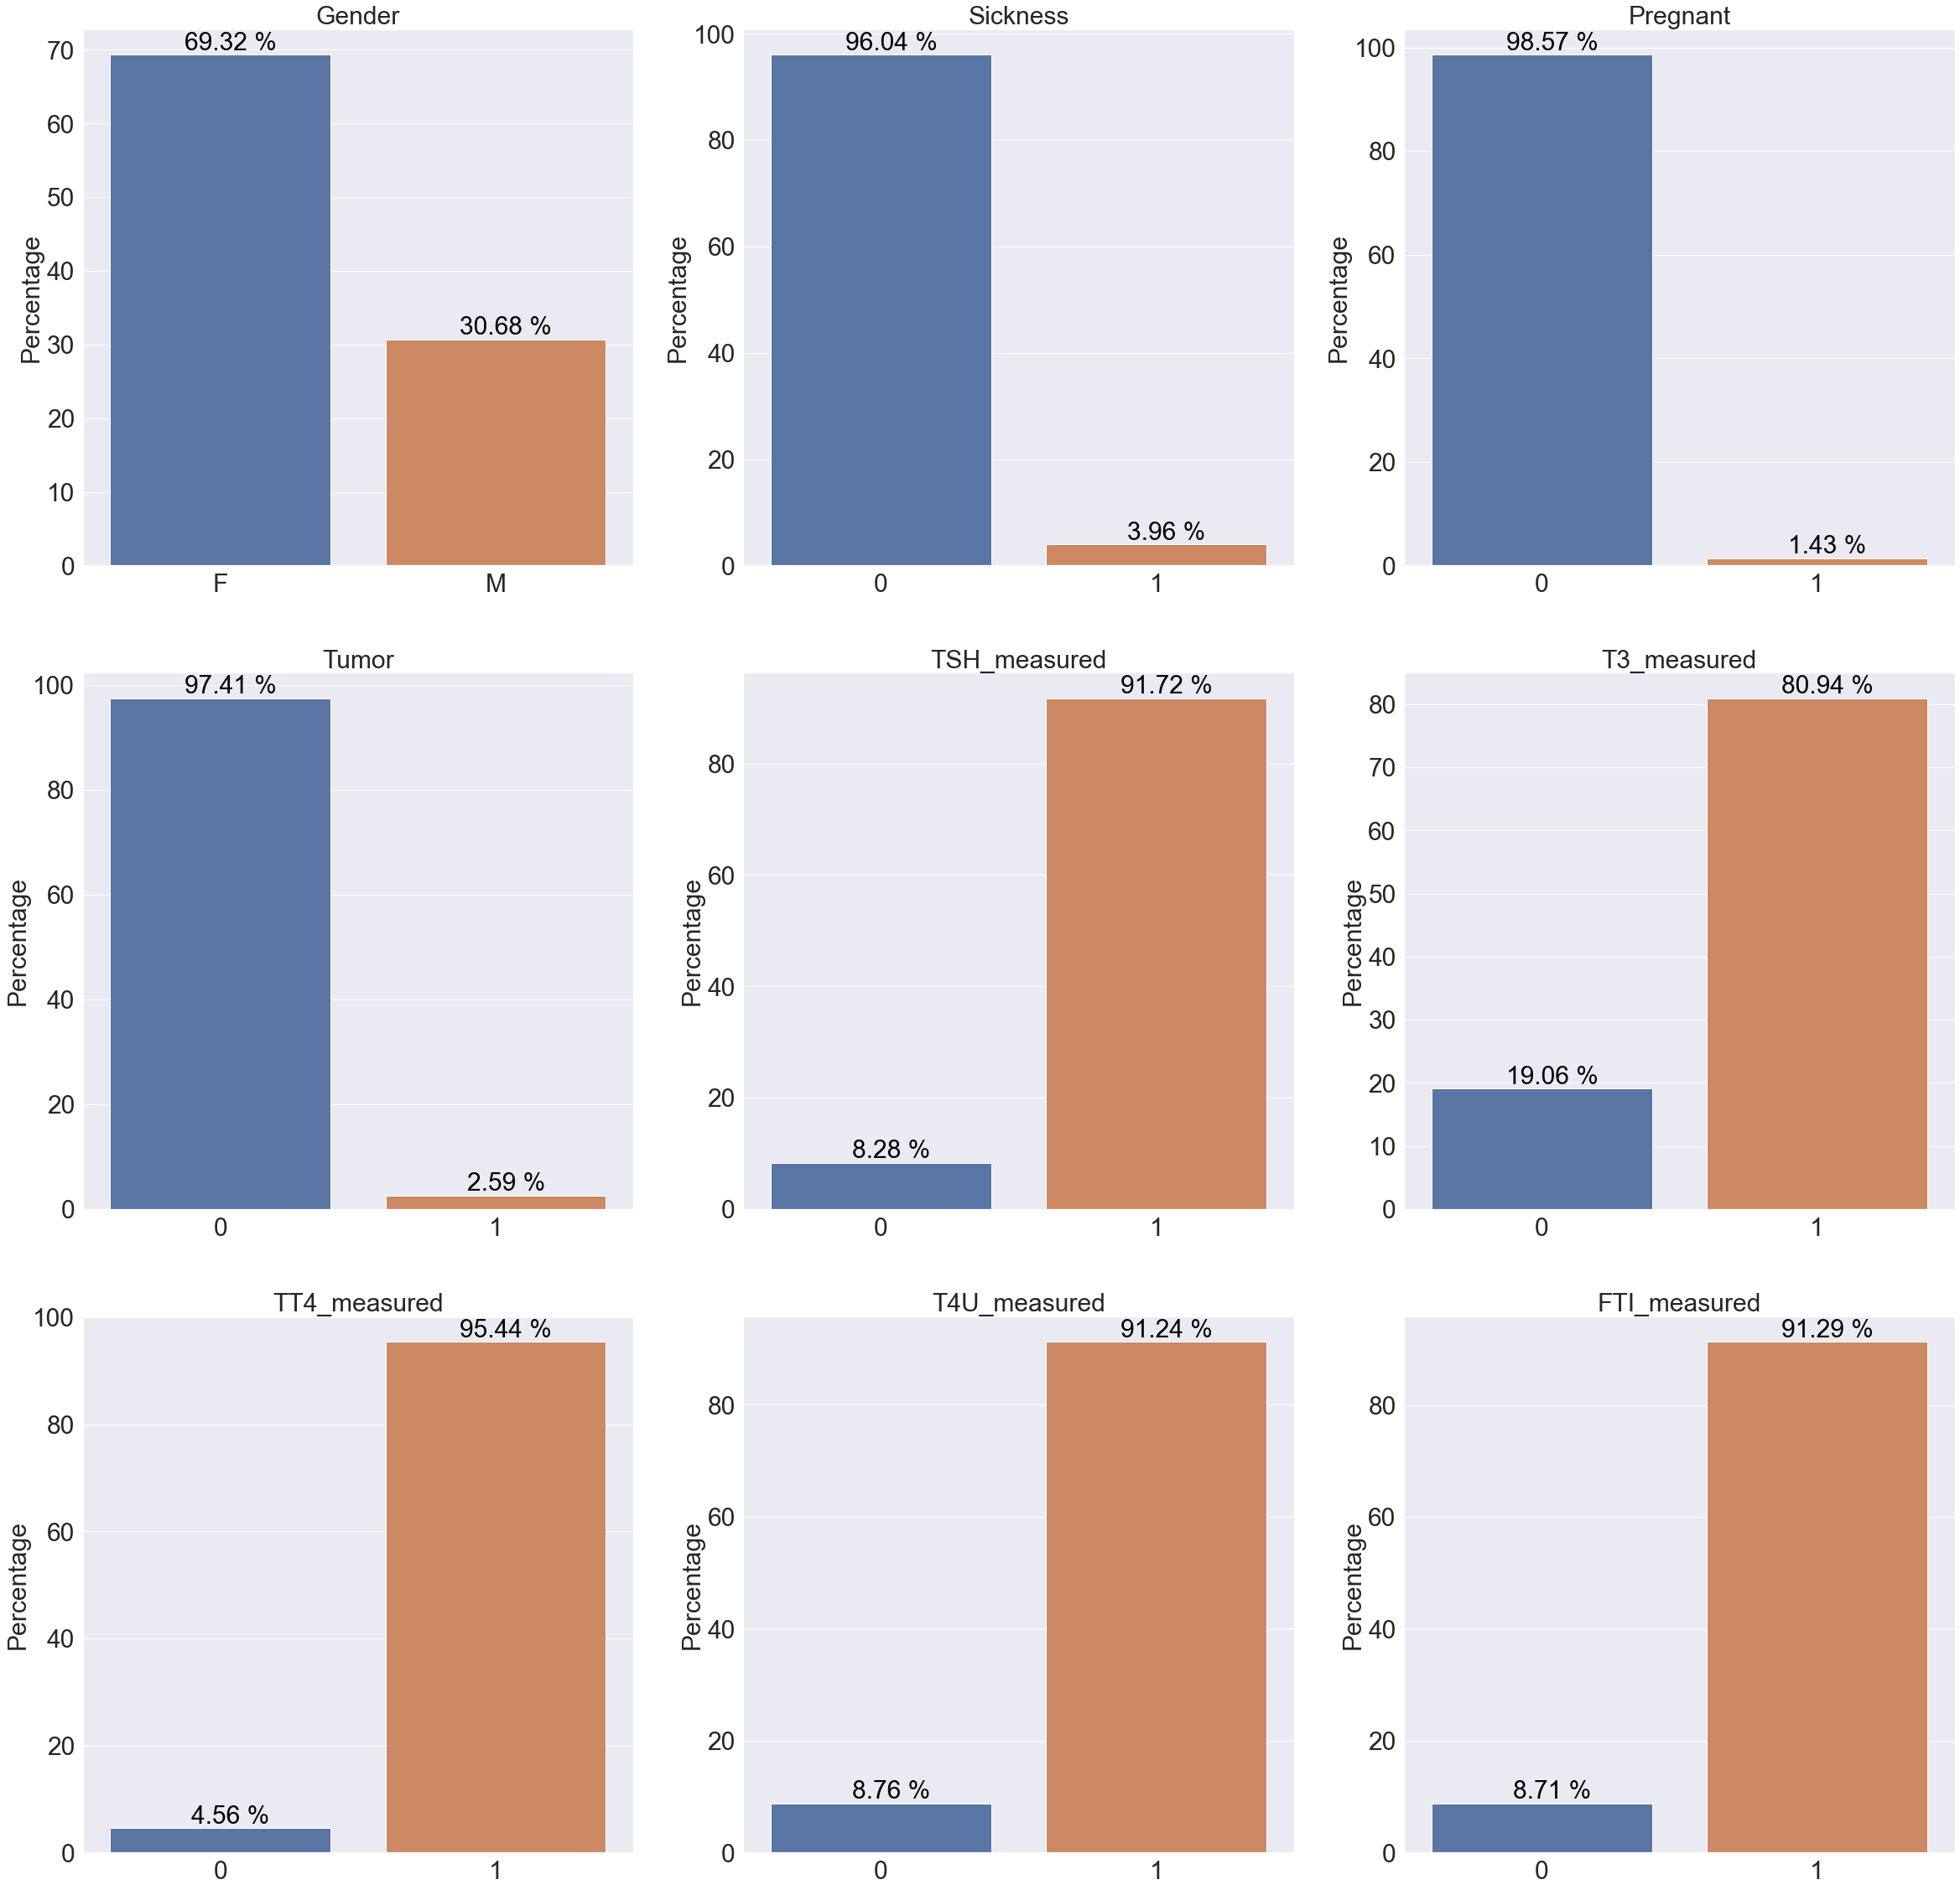

In [48]:
plt.figure(figsize= (40,40))
sns.set_theme(style="darkgrid")

plt.subplot(3,3,1)
a=sns.barplot(x=df.sex.value_counts(normalize=True).index,y=df.sex.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('Gender',size=30)

plt.subplot(3,3,2)
a=sns.barplot(x=df.sick.value_counts(normalize=True).index,y=df.sick.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('Sickness',size=30)

plt.subplot(3,3,3)
a=sns.barplot(x=df.pregnant.value_counts(normalize=True).index,y=df.pregnant.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('Pregnant',size=30)


plt.subplot(3,3,4)
a=sns.barplot(x=df.tumor.value_counts(normalize=True).index,y=df.tumor.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('Tumor',size=30)

plt.subplot(3,3,5)
a=sns.barplot(x=df.TSH_measured.value_counts(normalize=True).index,y=df.TSH_measured.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('TSH_measured',size=30)

plt.subplot(3,3,6)
a=sns.barplot(x=df.T3_measured.value_counts(normalize=True).index,y=df.T3_measured.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('T3_measured',size=30)


plt.subplot(3,3,7)
a=sns.barplot(x=df.TT4_measured.value_counts(normalize=True).index,y=df.TT4_measured.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('TT4_measured',size=30)

plt.subplot(3,3,8)
a=sns.barplot(x=df.T4U_measured.value_counts(normalize=True).index,y=df.T4U_measured.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('T4U_measured',size=30)

plt.subplot(3,3,9)
a=sns.barplot(x=df.FTI_measured.value_counts(normalize=True).index,y=df.FTI_measured.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Percentage',size=30)
plt.title('FTI_measured',size=30)


plt.show()

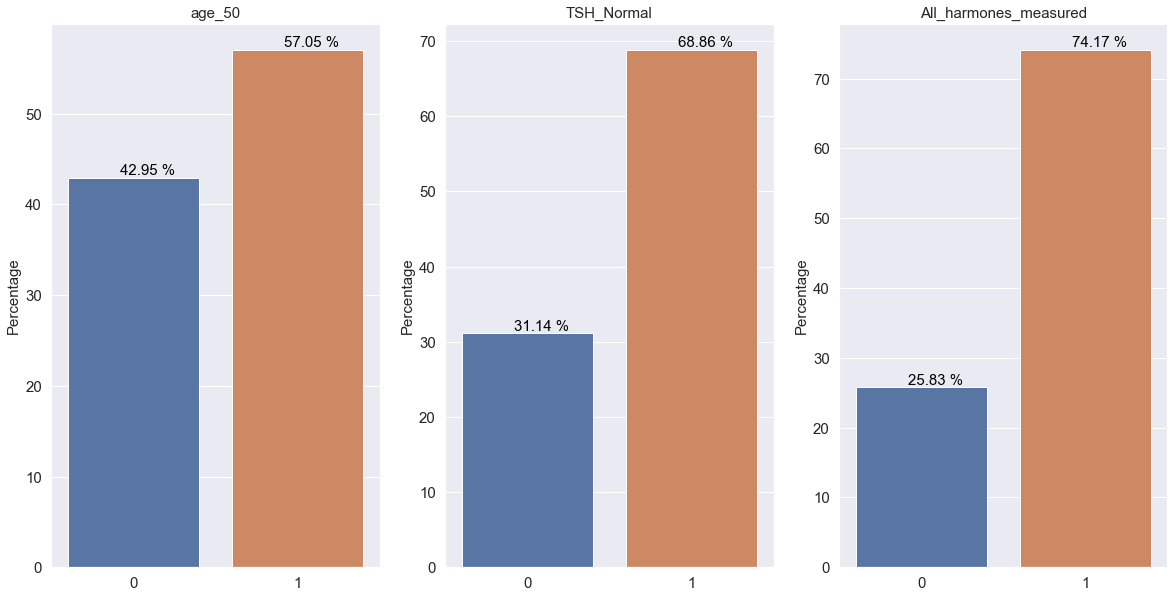

In [49]:
plt.figure(figsize= (20,10))
sns.set_theme(style="darkgrid")

plt.subplot(1,3,1)
a=sns.barplot(x=df.age_50.value_counts(normalize=True).index,y=df.age_50.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Percentage',size=15)
plt.title('age_50',size=15)


plt.subplot(1,3,2)
a=sns.barplot(x=df.TSH_Normal.value_counts(normalize=True).index,y=df.TSH_Normal.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Percentage',size=15)
plt.title('TSH_Normal',size=15)

plt.subplot(1,3,3)
a=sns.barplot(x=df.All_harmones_measured.value_counts(normalize=True).index,y=df.All_harmones_measured.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Percentage',size=15)
plt.title('All_harmones_measured',size=15)


plt.show()

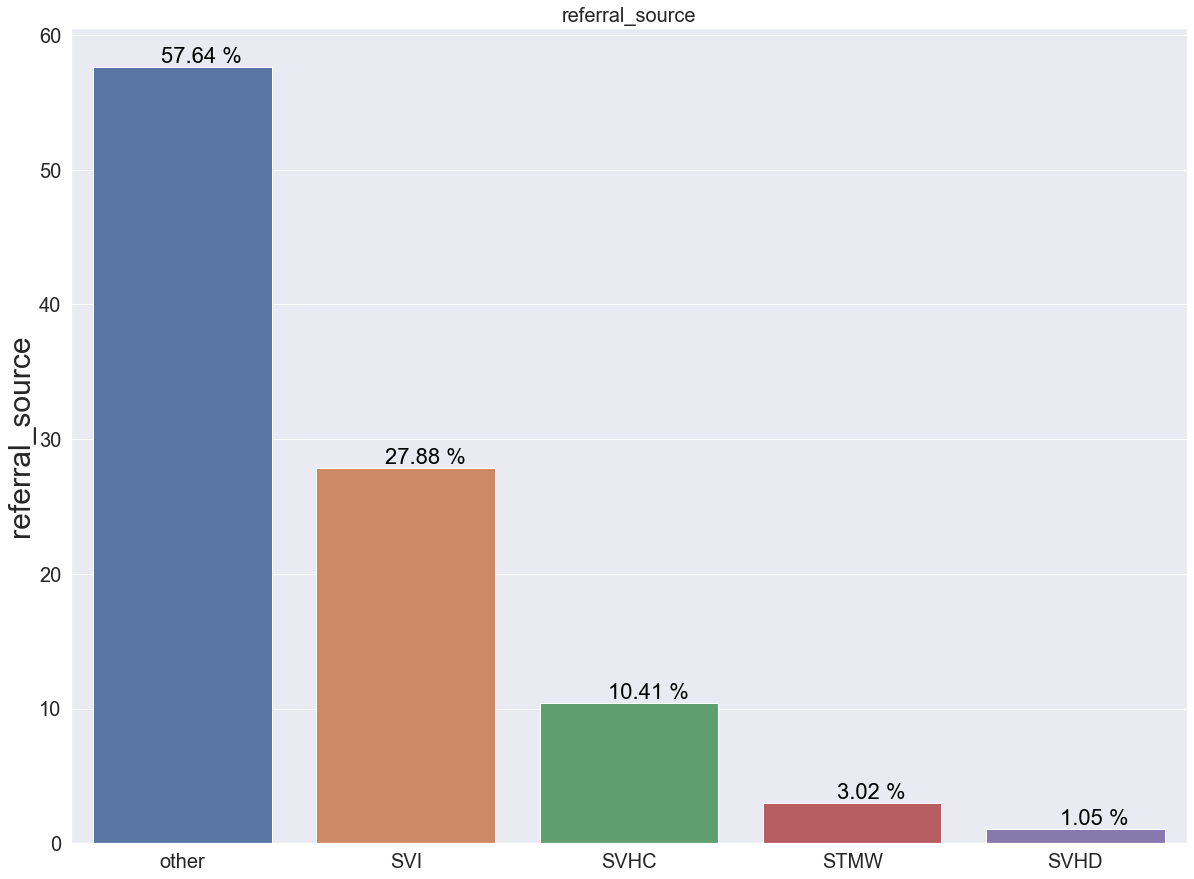

In [50]:
plt.figure(figsize= (20,15))
sns.set_theme(style="darkgrid")
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel('Percentage',size=30)
plt.title('referral_source',size=20)
a=sns.barplot(x=df.referral_source.value_counts(normalize=True).index,y=df.referral_source.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=22)
plt.show()

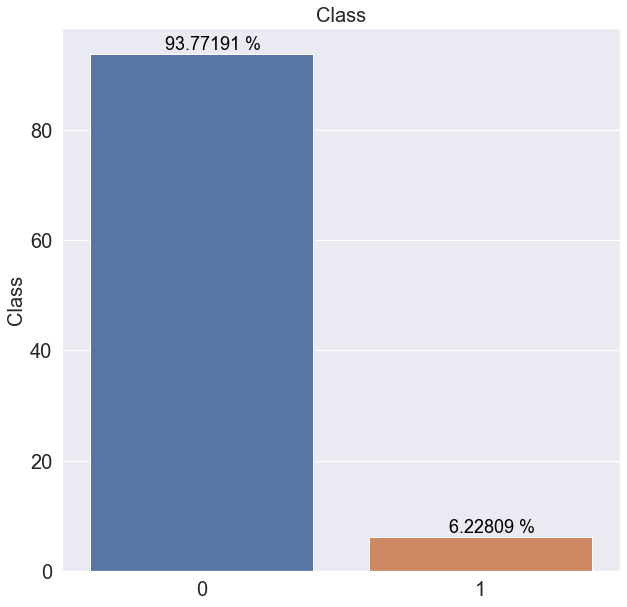

In [51]:
plt.figure(figsize= (10,10))
sns.set_theme(style="darkgrid")
plt.title('Class',size=20)
plt.ylabel('Percentage',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
a=sns.barplot(x=df.Class.value_counts(normalize=True).index,y=df.Class.value_counts(normalize=True)*100)
for i in a.patches:
        a.annotate('{:.05f}'.format(i.get_height())+ ' % ',(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=18)
plt.show()

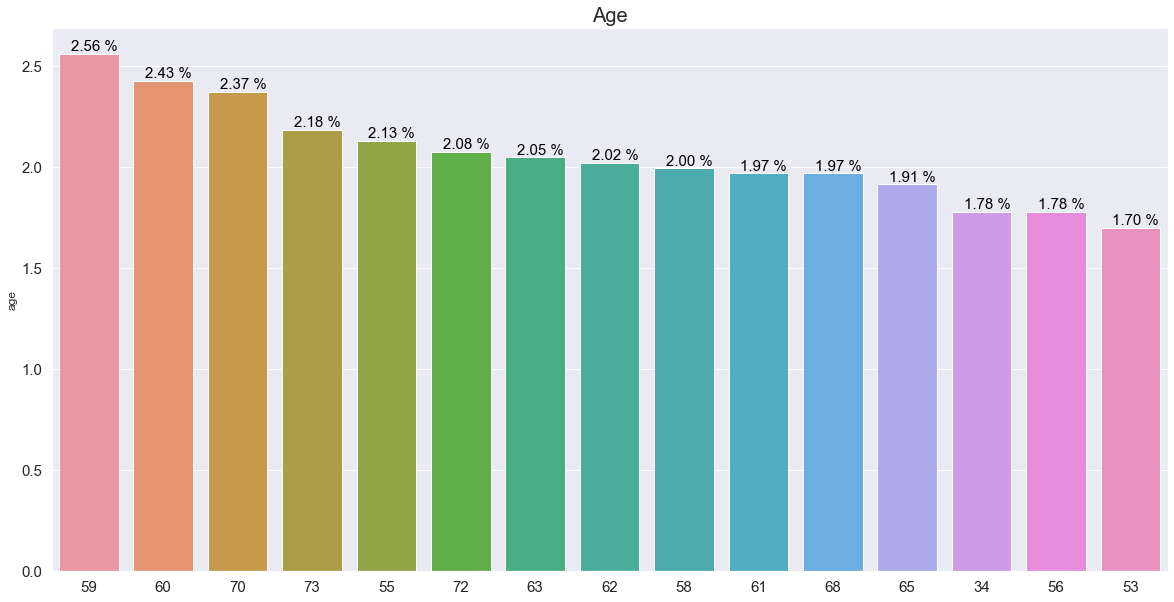

In [52]:
plt.figure(figsize= (20,10))
sns.set_theme(style="darkgrid")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Age',size=20)

data=(df.age.value_counts(normalize=True).head(15)*100).sort_values(ascending=False)

a=sns.barplot(x=data.index,y=data,order=data.index)
for i in a.patches:
        a.annotate('{:.02f}'.format(i.get_height())+ ' % ',(i.get_x()+0.5,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

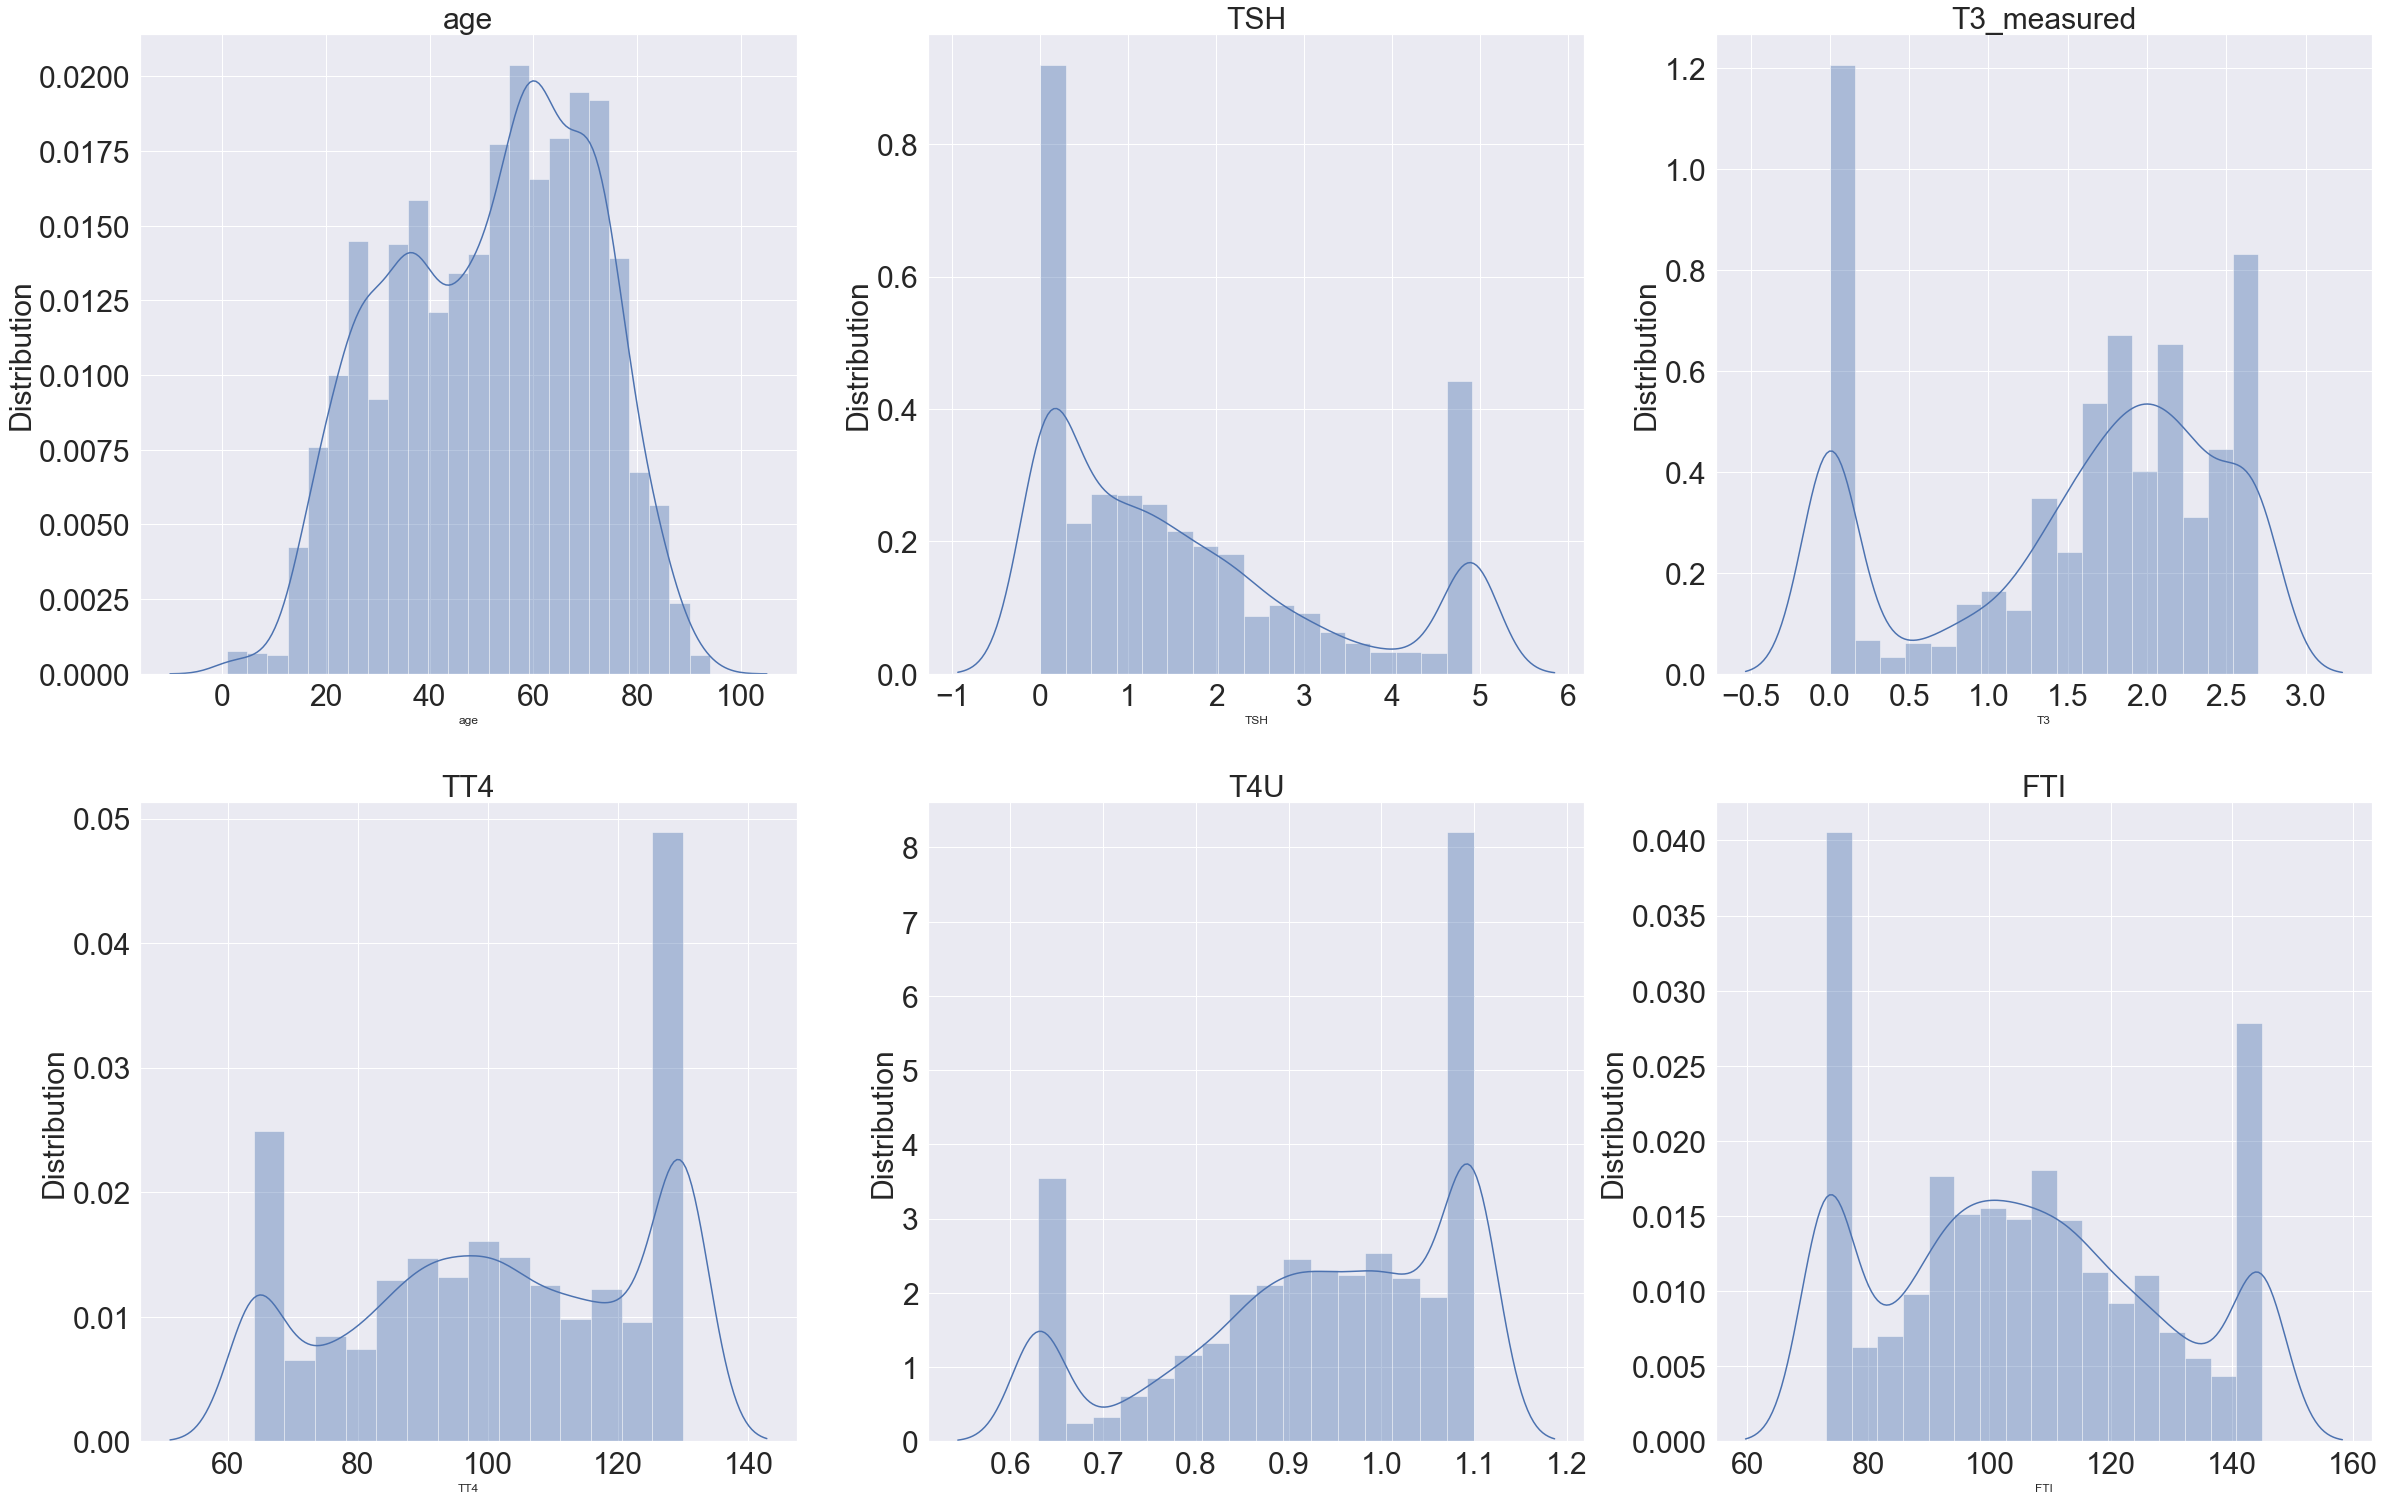

In [53]:
plt.figure(figsize= (40,40))
sns.set_theme(style="darkgrid")

plt.subplot(3,3,1)
sns.distplot(df.age)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('age',size=30)

plt.subplot(3,3,2)
sns.distplot(df.TSH)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('TSH',size=30)

plt.subplot(3,3,3)
sns.distplot(df.T3)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('T3_measured',size=30)


plt.subplot(3,3,4)
sns.distplot(df.TT4)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('TT4',size=30)

plt.subplot(3,3,5)
sns.distplot(x=df.T4U)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('T4U',size=30)

plt.subplot(3,3,6)
sns.distplot(df.FTI)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylabel('Distribution',size=30)
plt.title('FTI',size=30)


plt.show()

## Bivariate Analysis

In [54]:
df.head()

age  age_50 sex  on_thyroxine  query_on_thyroxine  \
0   41       0   F             0                   0   
1   23       0   F             0                   0   
2   46       0   M             0                   0   
3   70       1   F             1                   0   
4   70       1   F             0                   0   

   on_antithyroid_medication  sick  pregnant  thyroid_surgery  I131_treatment  \
0                          0     0         0                0               0   
1                          0     0         0                0               0   
2                          0     0         0                0               0   
3                          0     0         0                0               0   
4                          0     0         0                0               0   

   query_hypothyroid  query_hyperthyroid  lithium  goitre  tumor  \
0                  0                   0        0       0      0   
1                  0                   0        0       0      0   
2                  0                   0        0       0      0   
3                  0                   0        0       0      0   
4                  0                   0        0       0      0   

   hypopituitary  psych  TSH_measured  TSH_Normal     TSH  T3_measured  \
0              0      0             1           1 1.30000            1   
1              0      0             1           1 4.10000            1   
2              0      0             1           1 0.98000            0   
3              0      0             1           0 0.16000            1   
4              0      0             1           1 0.72000            1   

       T3  TT4_measured       TT4  T4U_measured     T4U  FTI_measured  \
0 2.50000             1 125.00000             1 1.10000             1   
1 2.00000             1 102.00000             0 0.63000             0   
2 0.00000             1 109.00000             1 0.91000             1   
3 1.90000             1 130.00000             0 0.63000             0   
4 1.20000             1  64.00000             1 0.87000             1   

   All_harmones_measured       FTI referral_source  Class  
0                      1 109.00000            SVHC      0  
1                      0  73.00000           other      0  
2                      0 120.00000           other      0  
3                      0  73.00000           other      0  
4                      1  73.00000             SVI      0

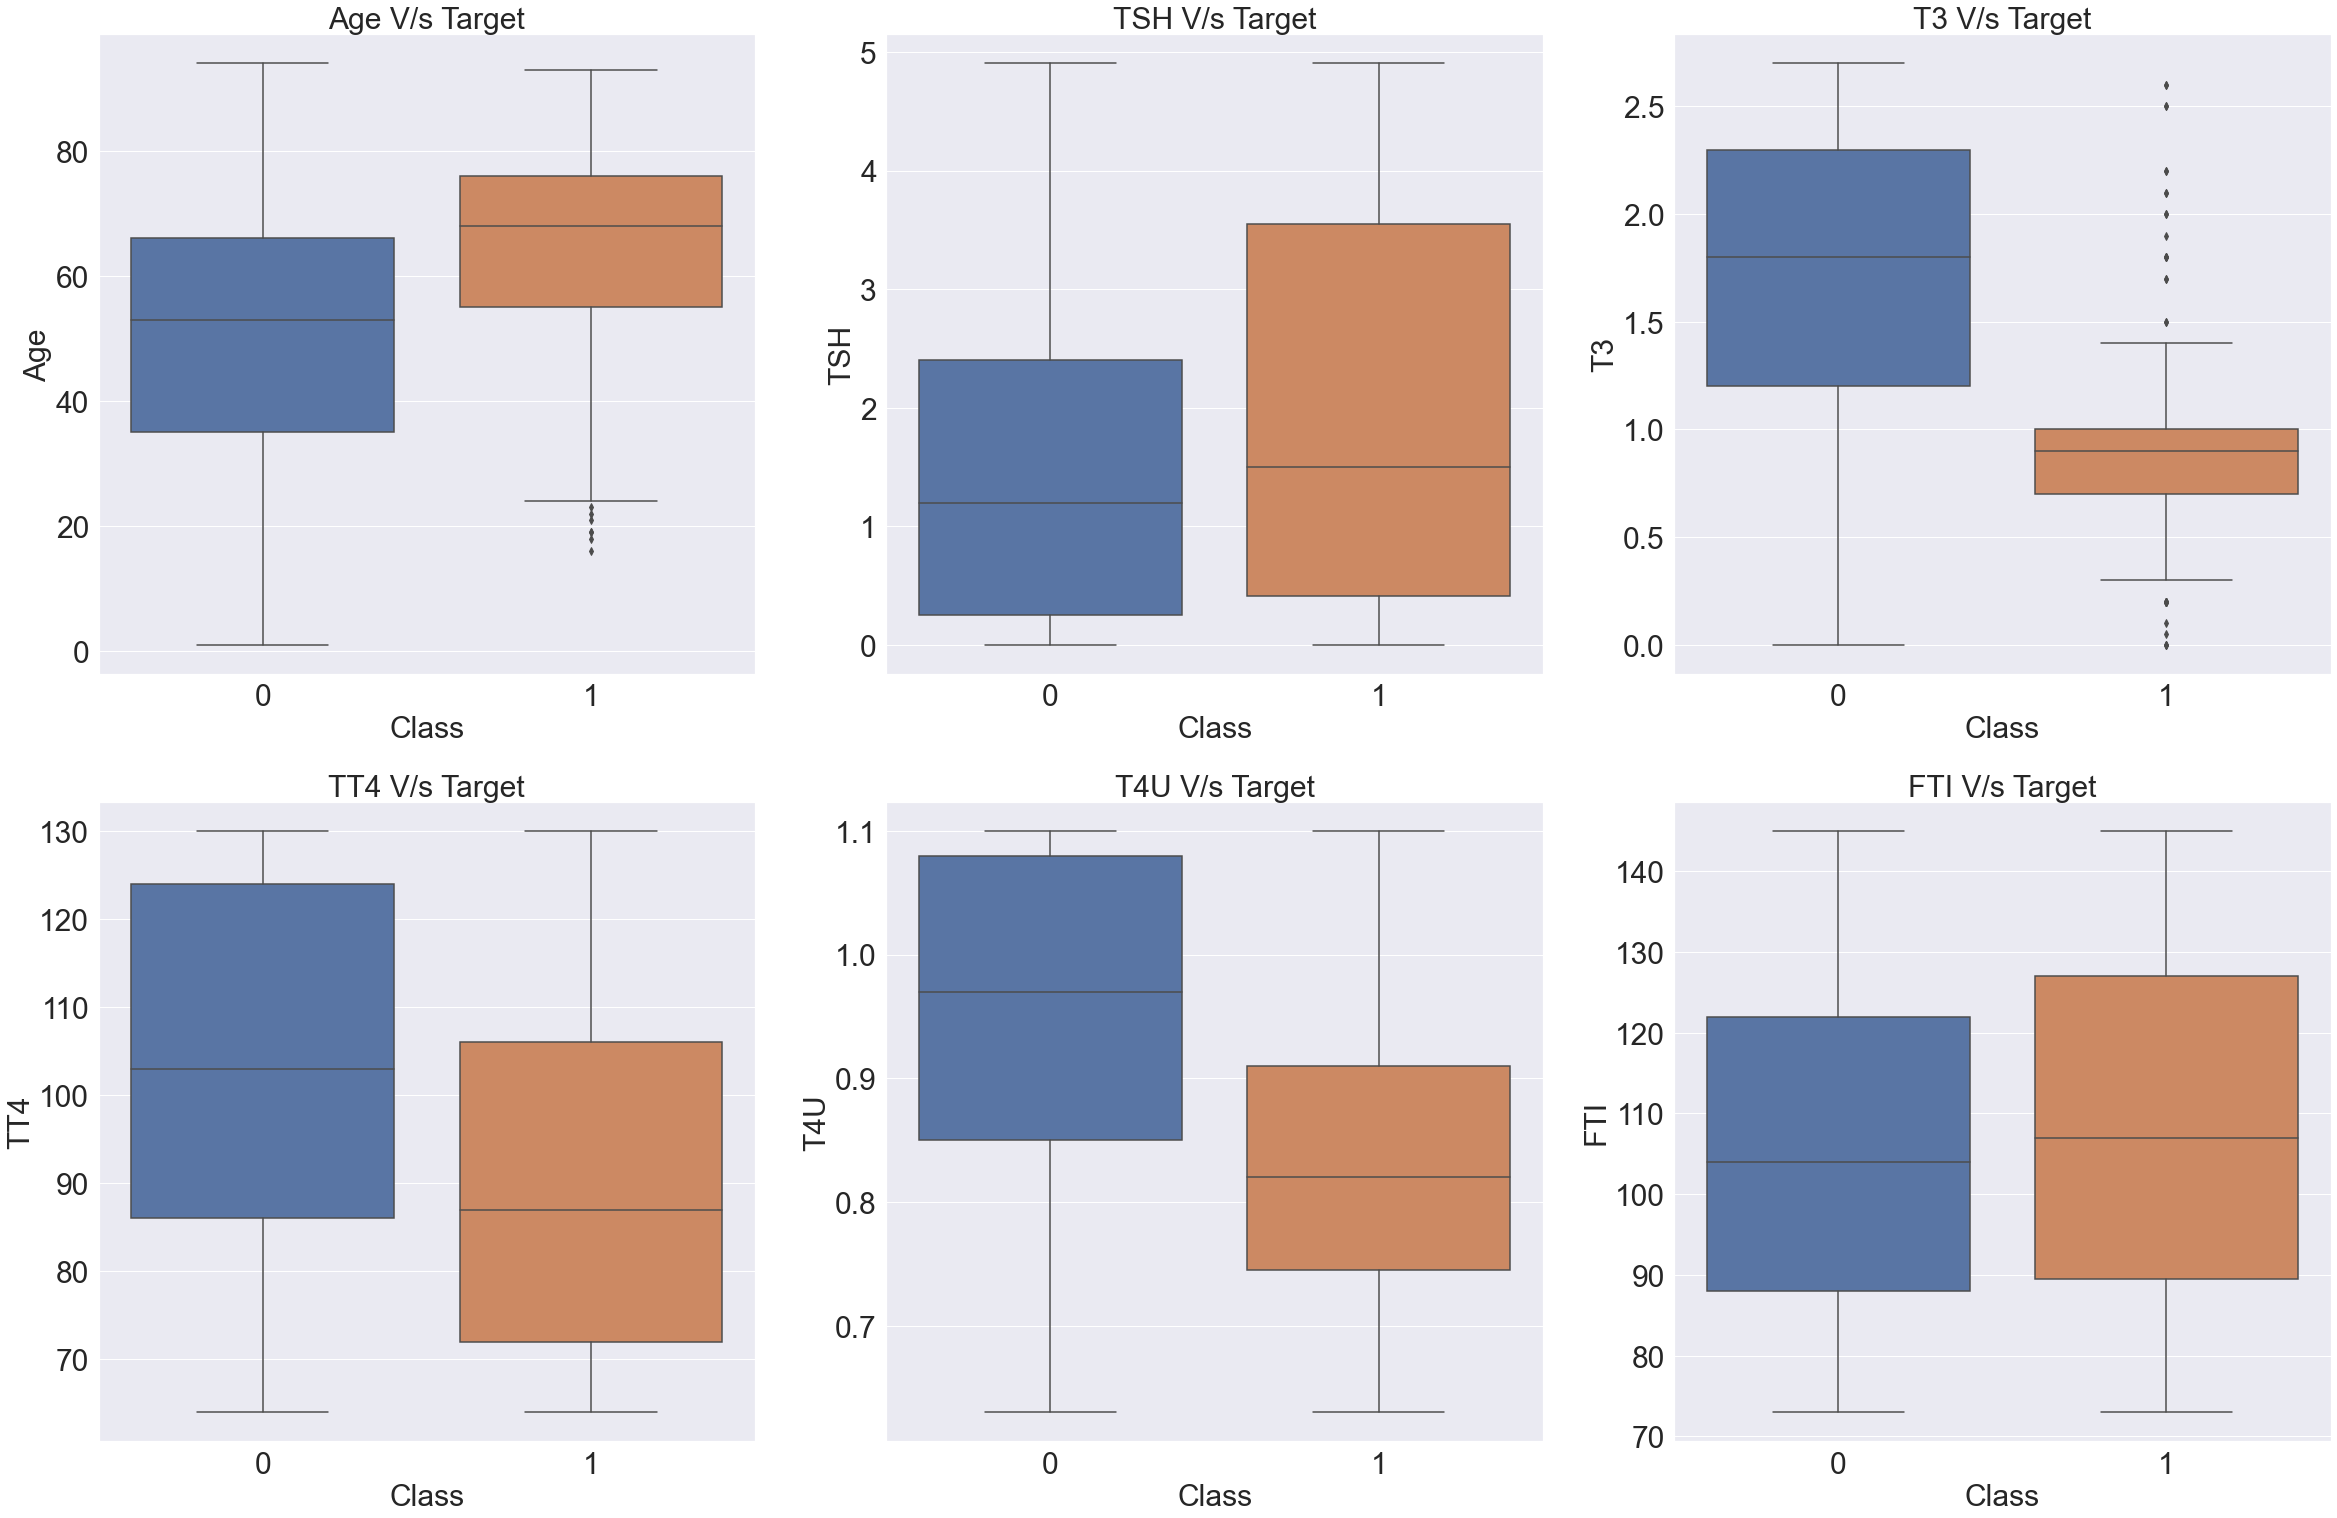

In [55]:
plt.figure(figsize= (40,40))
sns.set_theme(style="darkgrid")

plt.subplot(3,3,1)
sns.boxplot(x=df.Class,y=df.age)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Age',size=30)
plt.title('Age V/s Target',size=30)

plt.subplot(3,3,2)
sns.boxplot(x=df.Class,y=df.TSH)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('TSH',size=30)
plt.title('TSH V/s Target',size=30)

plt.subplot(3,3,3)
sns.boxplot(x=df.Class,y=df.T3)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('T3',size=30)
plt.title('T3 V/s Target',size=30)

plt.subplot(3,3,4)
sns.boxplot(x=df.Class,y=df.TT4)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('TT4',size=30)
plt.title('TT4 V/s Target',size=30)

plt.subplot(3,3,5)
sns.boxplot(x=df.Class,y=df.T4U)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('T4U',size=30)
plt.title('T4U V/s Target',size=30)

plt.subplot(3,3,6)
sns.boxplot(x=df.Class,y=df.FTI)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('FTI',size=30)
plt.title('FTI V/s Target',size=30)


plt.show()

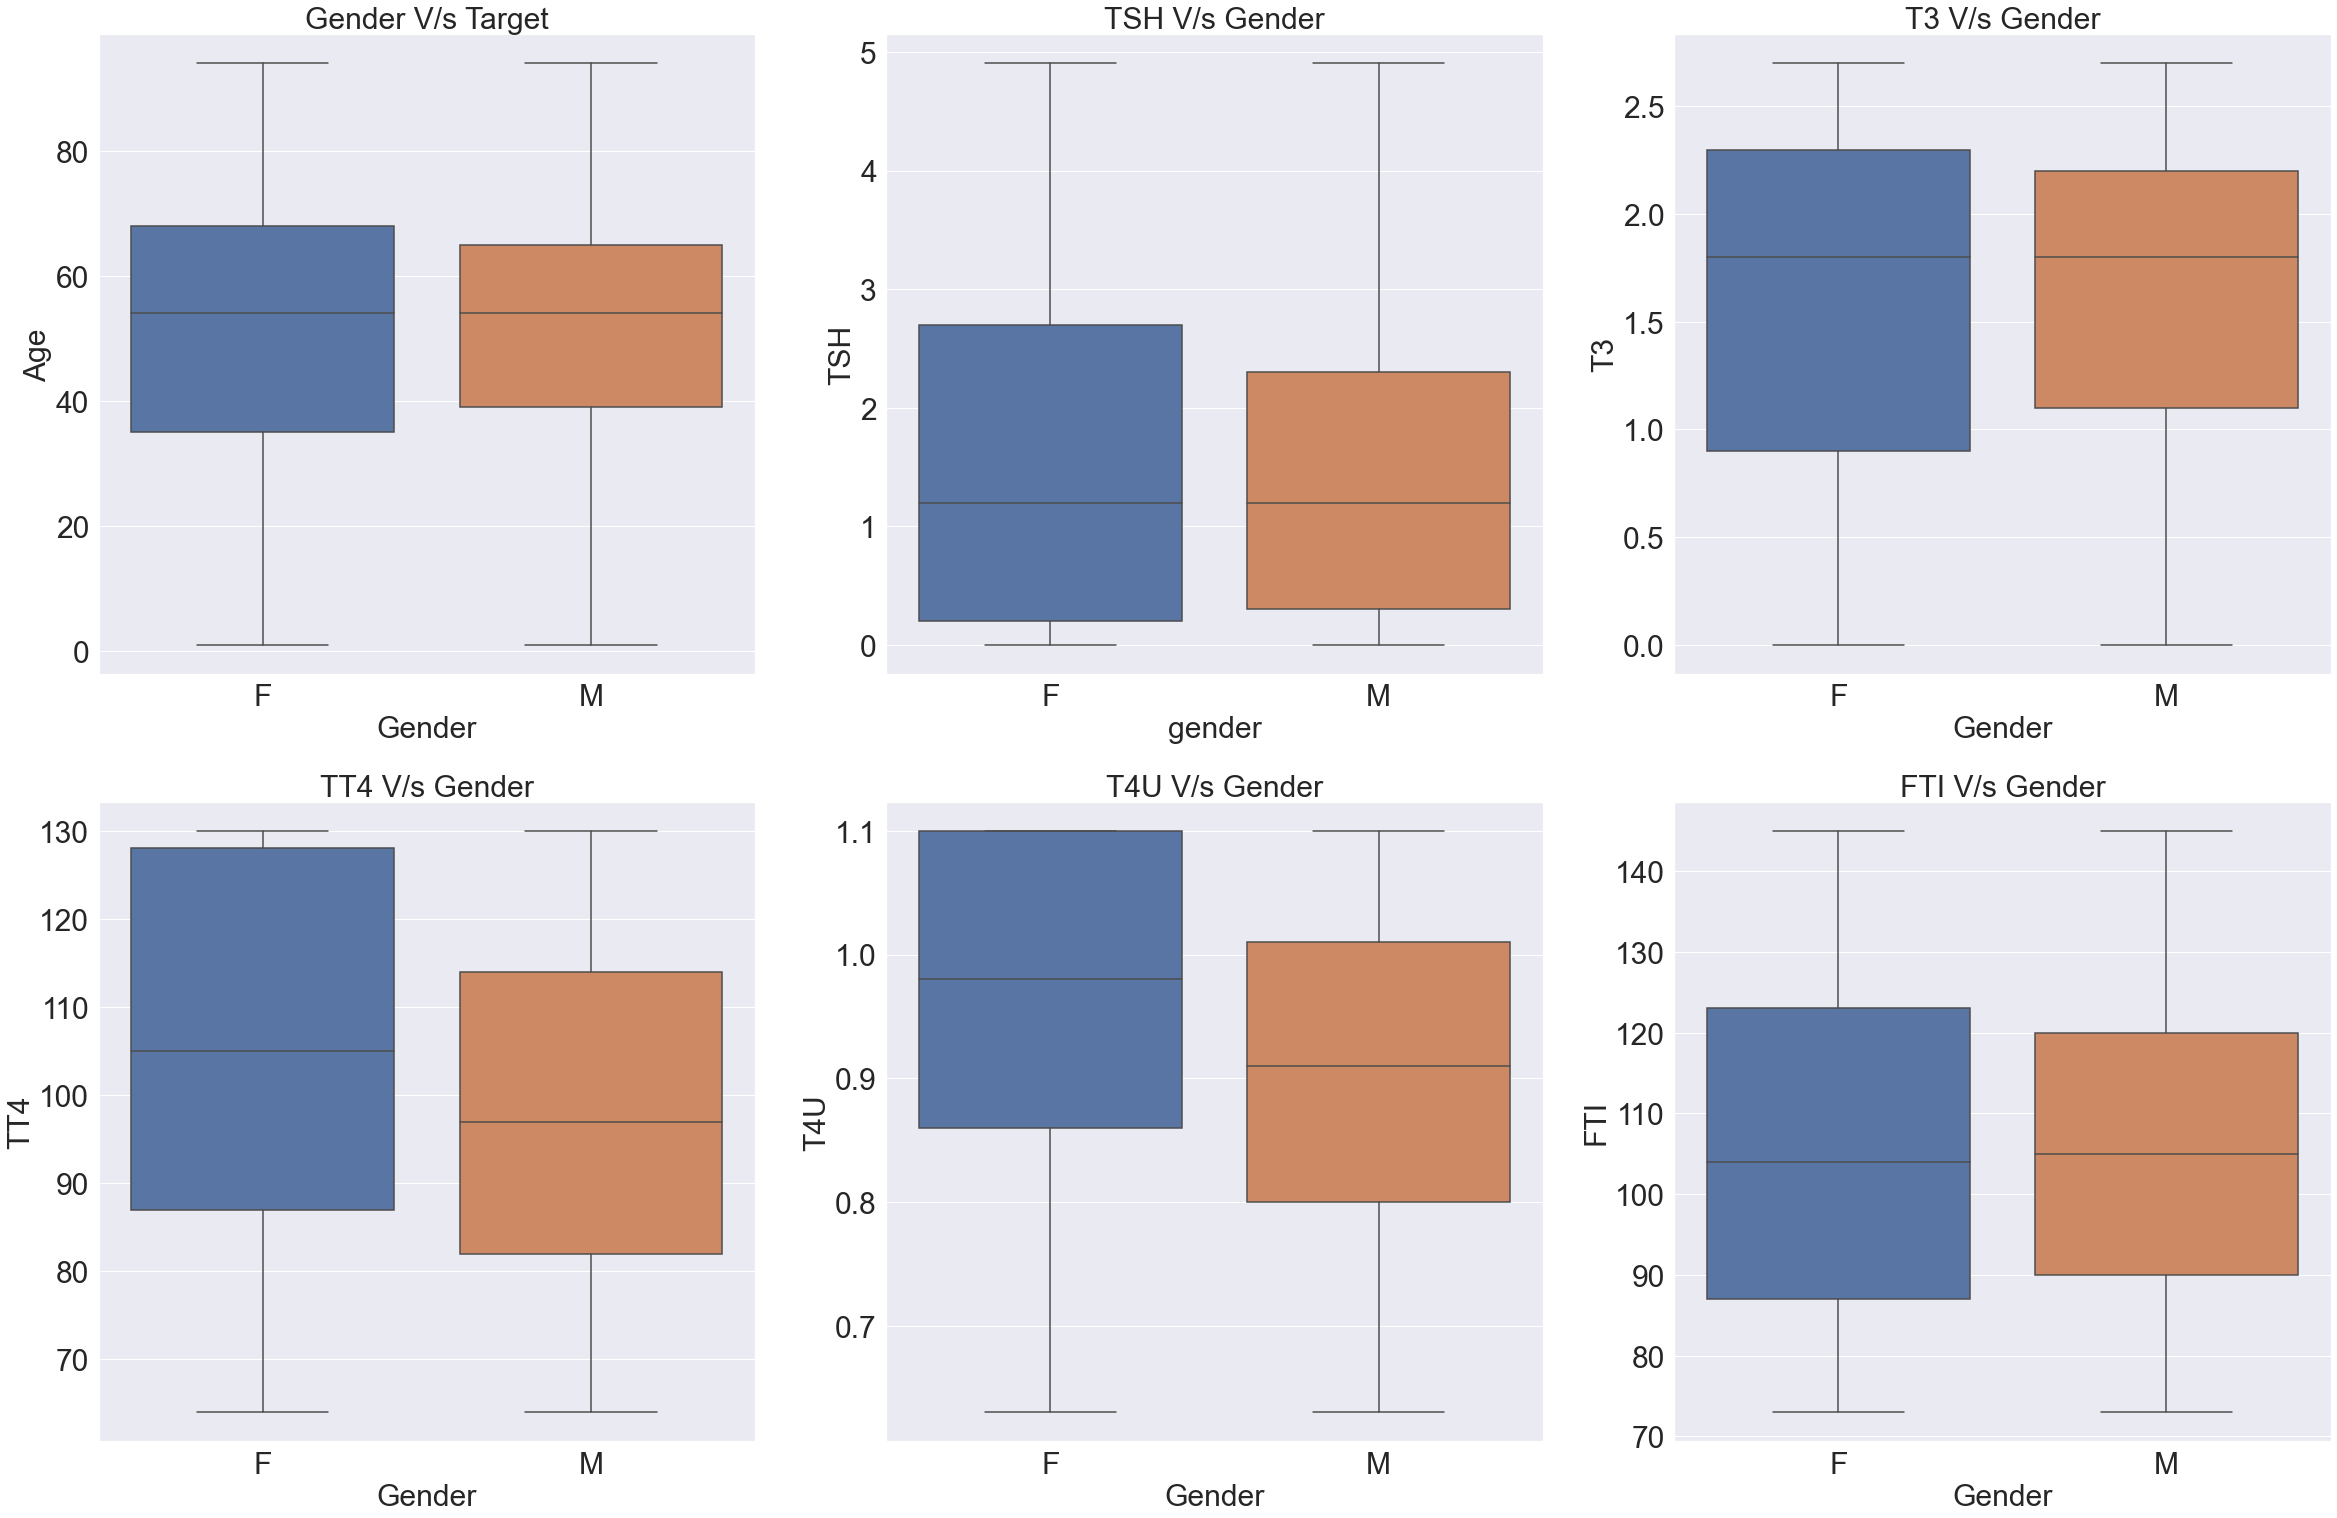

In [56]:
plt.figure(figsize= (40,40))
sns.set_theme(style="darkgrid")

plt.subplot(3,3,1)
sns.boxplot(x=df.sex,y=df.age)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Gender',size=30)
plt.ylabel('Age',size=30)
plt.title('Gender V/s Target',size=30)

plt.subplot(3,3,2)
sns.boxplot(x=df.sex,y=df.TSH)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('gender',size=30)
plt.ylabel('TSH',size=30)
plt.title('TSH V/s Gender',size=30)

plt.subplot(3,3,3)
sns.boxplot(x=df.sex,y=df.T3)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Gender',size=30)
plt.ylabel('T3',size=30)
plt.title('T3 V/s Gender',size=30)

plt.subplot(3,3,4)
sns.boxplot(x=df.sex,y=df.TT4)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Gender',size=30)
plt.ylabel('TT4',size=30)
plt.title('TT4 V/s Gender',size=30)

plt.subplot(3,3,5)
sns.boxplot(x=df.sex,y=df.T4U)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Gender',size=30)
plt.ylabel('T4U',size=30)
plt.title('T4U V/s Gender',size=30)

plt.subplot(3,3,6)
sns.boxplot(x=df.sex,y=df.FTI)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Gender',size=30)
plt.ylabel('FTI',size=30)
plt.title('FTI V/s Gender',size=30)


plt.show()

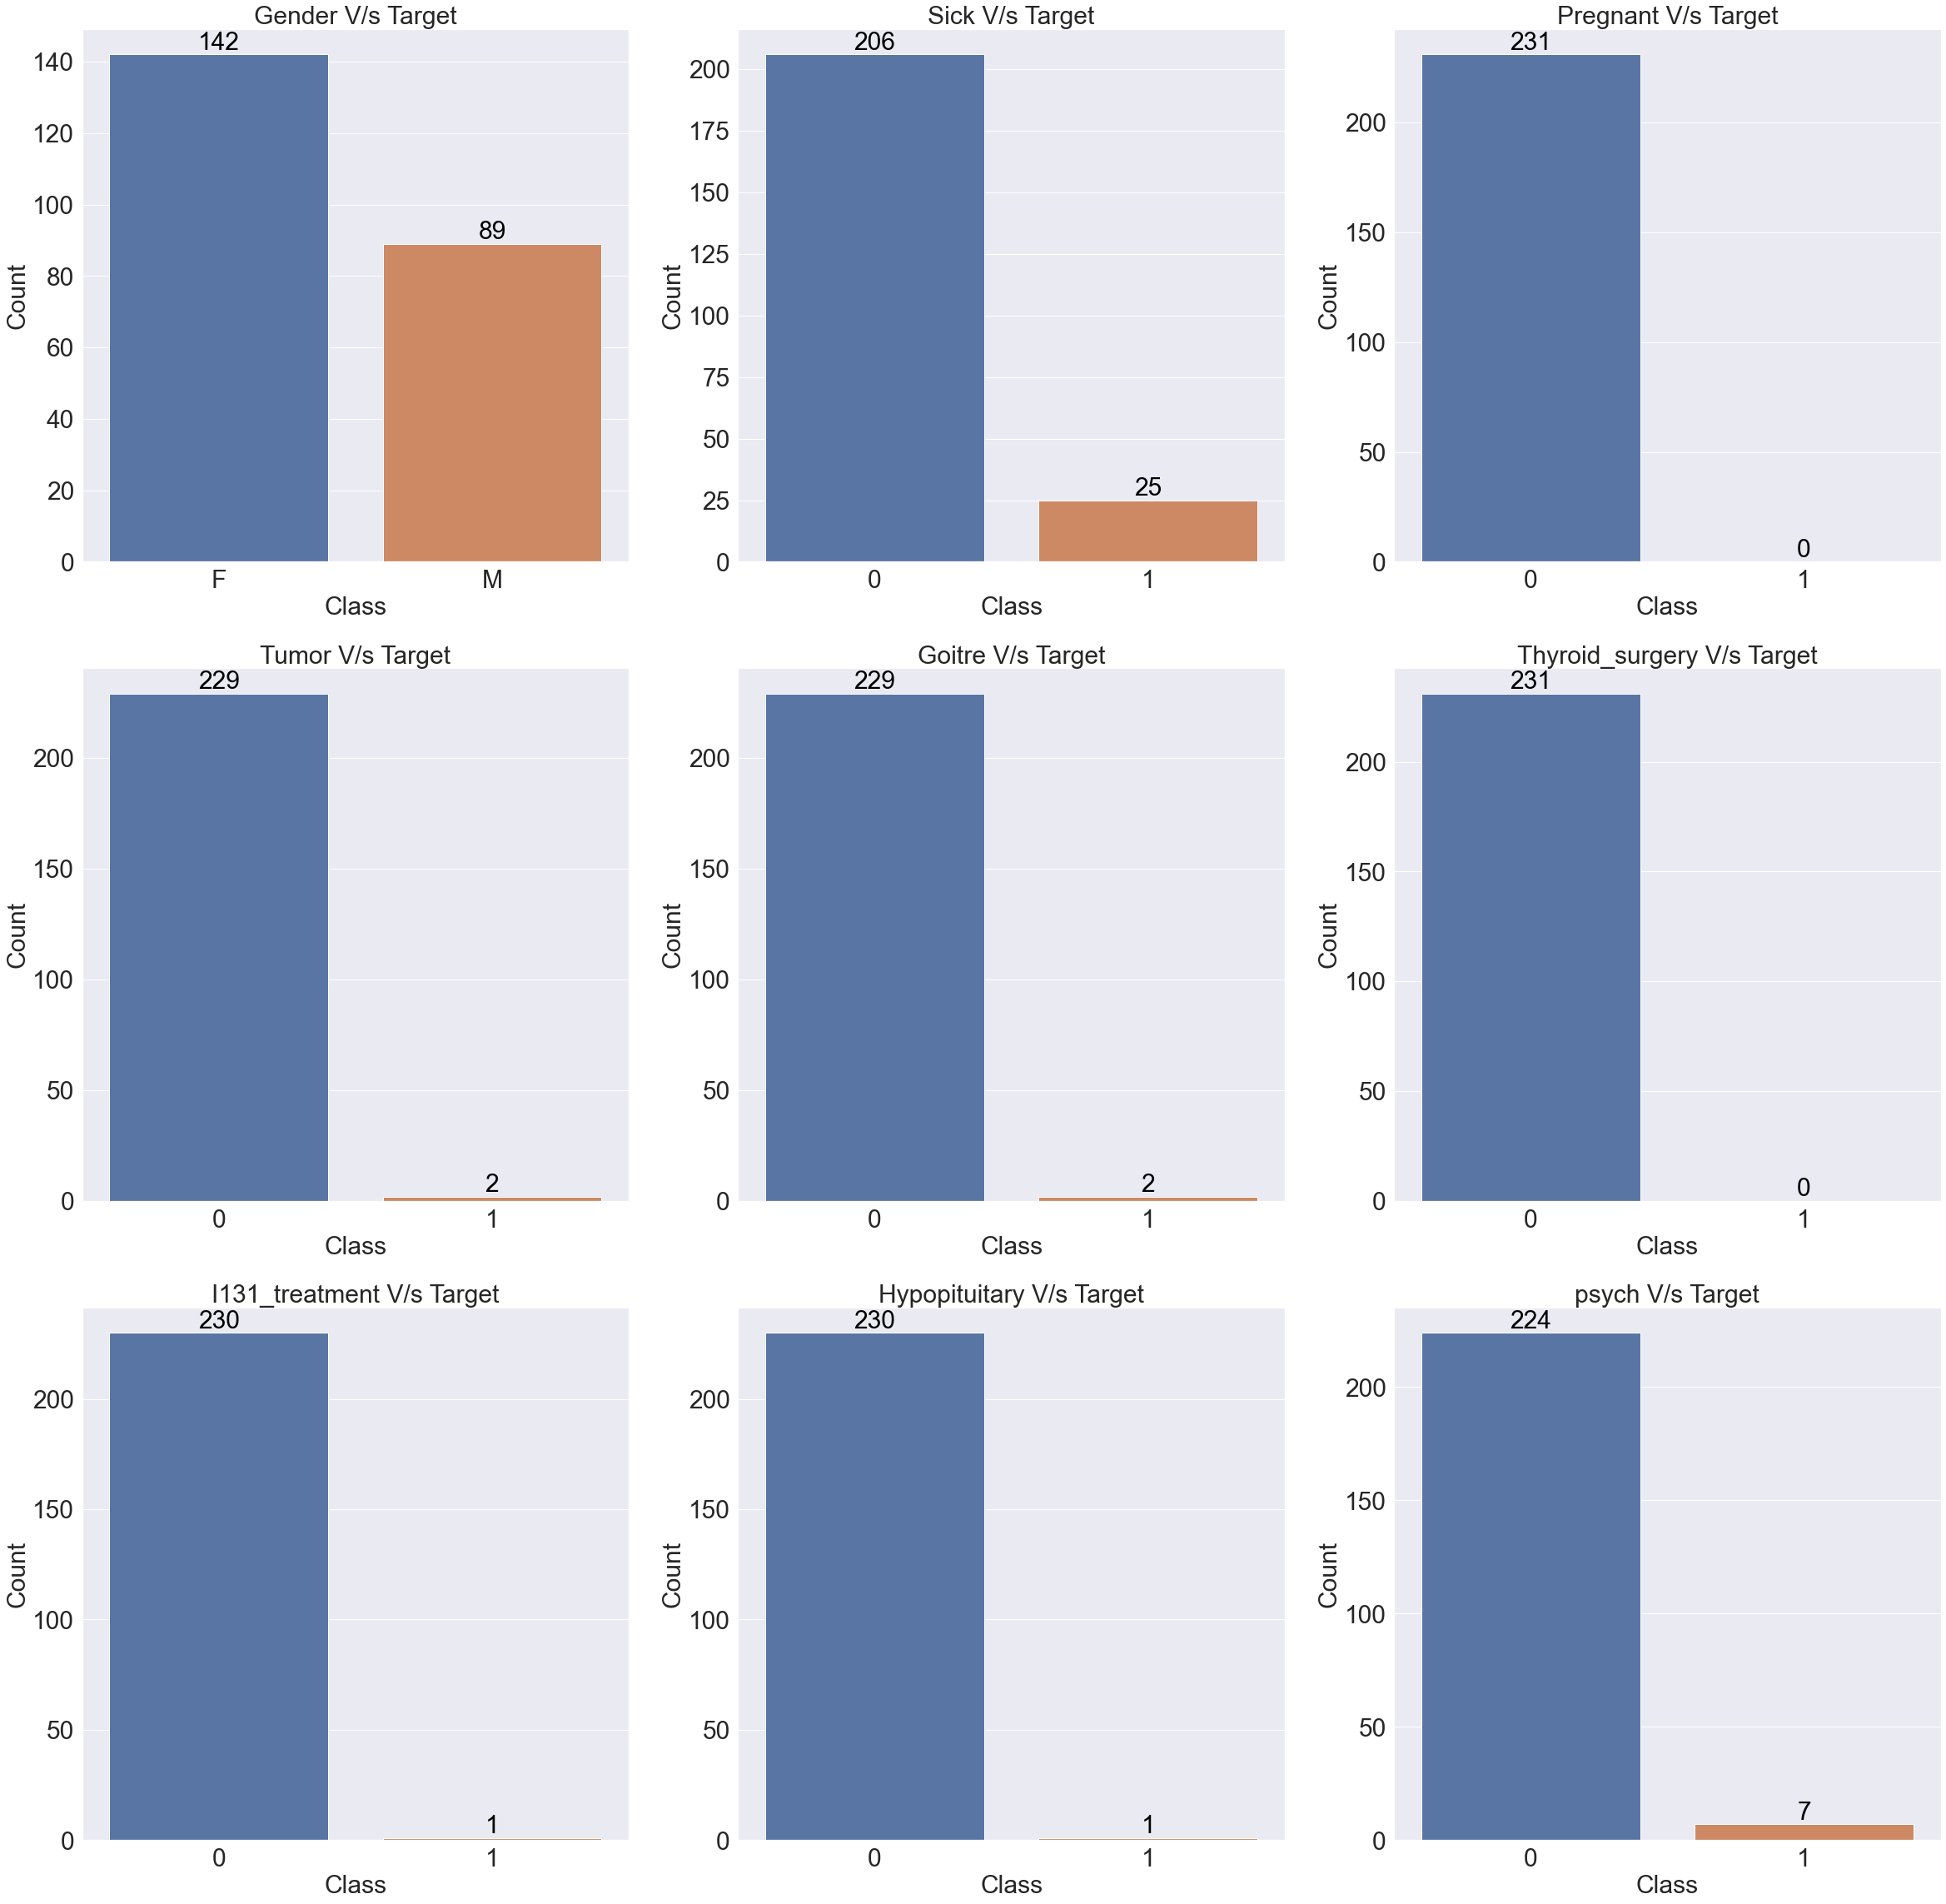

In [57]:
plt.figure(figsize= (40,40))
sns.set_theme(style="darkgrid")

plt.subplot(3,3,1)
a=sns.barplot(df.sex,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Gender V/s Target',size=30)


plt.subplot(3,3,2)
a=sns.barplot(df.sick,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Sick V/s Target',size=30)


plt.subplot(3,3,3)
a=sns.barplot(df.pregnant,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Pregnant V/s Target',size=30)

plt.subplot(3,3,4)
a=sns.barplot(df.tumor,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Tumor V/s Target',size=30)

plt.subplot(3,3,5)
a=sns.barplot(df.goitre,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Goitre V/s Target',size=30)


plt.subplot(3,3,6)
a=sns.barplot(df.thyroid_surgery,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Thyroid_surgery V/s Target',size=30)


plt.subplot(3,3,7)
a=sns.barplot(df.I131_treatment,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('I131_treatment V/s Target',size=30)


plt.subplot(3,3,8)
a=sns.barplot(df.hypopituitary,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Hypopituitary V/s Target',size=30)


plt.subplot(3,3,9)
a=sns.barplot(df.psych,df.Class,estimator=sum,ci=None)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('psych V/s Target',size=30)


plt.show()

## Multivariate Analysis

In [58]:
df.head()

age  age_50 sex  on_thyroxine  query_on_thyroxine  \
0   41       0   F             0                   0   
1   23       0   F             0                   0   
2   46       0   M             0                   0   
3   70       1   F             1                   0   
4   70       1   F             0                   0   

   on_antithyroid_medication  sick  pregnant  thyroid_surgery  I131_treatment  \
0                          0     0         0                0               0   
1                          0     0         0                0               0   
2                          0     0         0                0               0   
3                          0     0         0                0               0   
4                          0     0         0                0               0   

   query_hypothyroid  query_hyperthyroid  lithium  goitre  tumor  \
0                  0                   0        0       0      0   
1                  0                   0        0       0      0   
2                  0                   0        0       0      0   
3                  0                   0        0       0      0   
4                  0                   0        0       0      0   

   hypopituitary  psych  TSH_measured  TSH_Normal     TSH  T3_measured  \
0              0      0             1           1 1.30000            1   
1              0      0             1           1 4.10000            1   
2              0      0             1           1 0.98000            0   
3              0      0             1           0 0.16000            1   
4              0      0             1           1 0.72000            1   

       T3  TT4_measured       TT4  T4U_measured     T4U  FTI_measured  \
0 2.50000             1 125.00000             1 1.10000             1   
1 2.00000             1 102.00000             0 0.63000             0   
2 0.00000             1 109.00000             1 0.91000             1   
3 1.90000             1 130.00000             0 0.63000             0   
4 1.20000             1  64.00000             1 0.87000             1   

   All_harmones_measured       FTI referral_source  Class  
0                      1 109.00000            SVHC      0  
1                      0  73.00000           other      0  
2                      0 120.00000           other      0  
3                      0  73.00000           other      0  
4                      1  73.00000             SVI      0

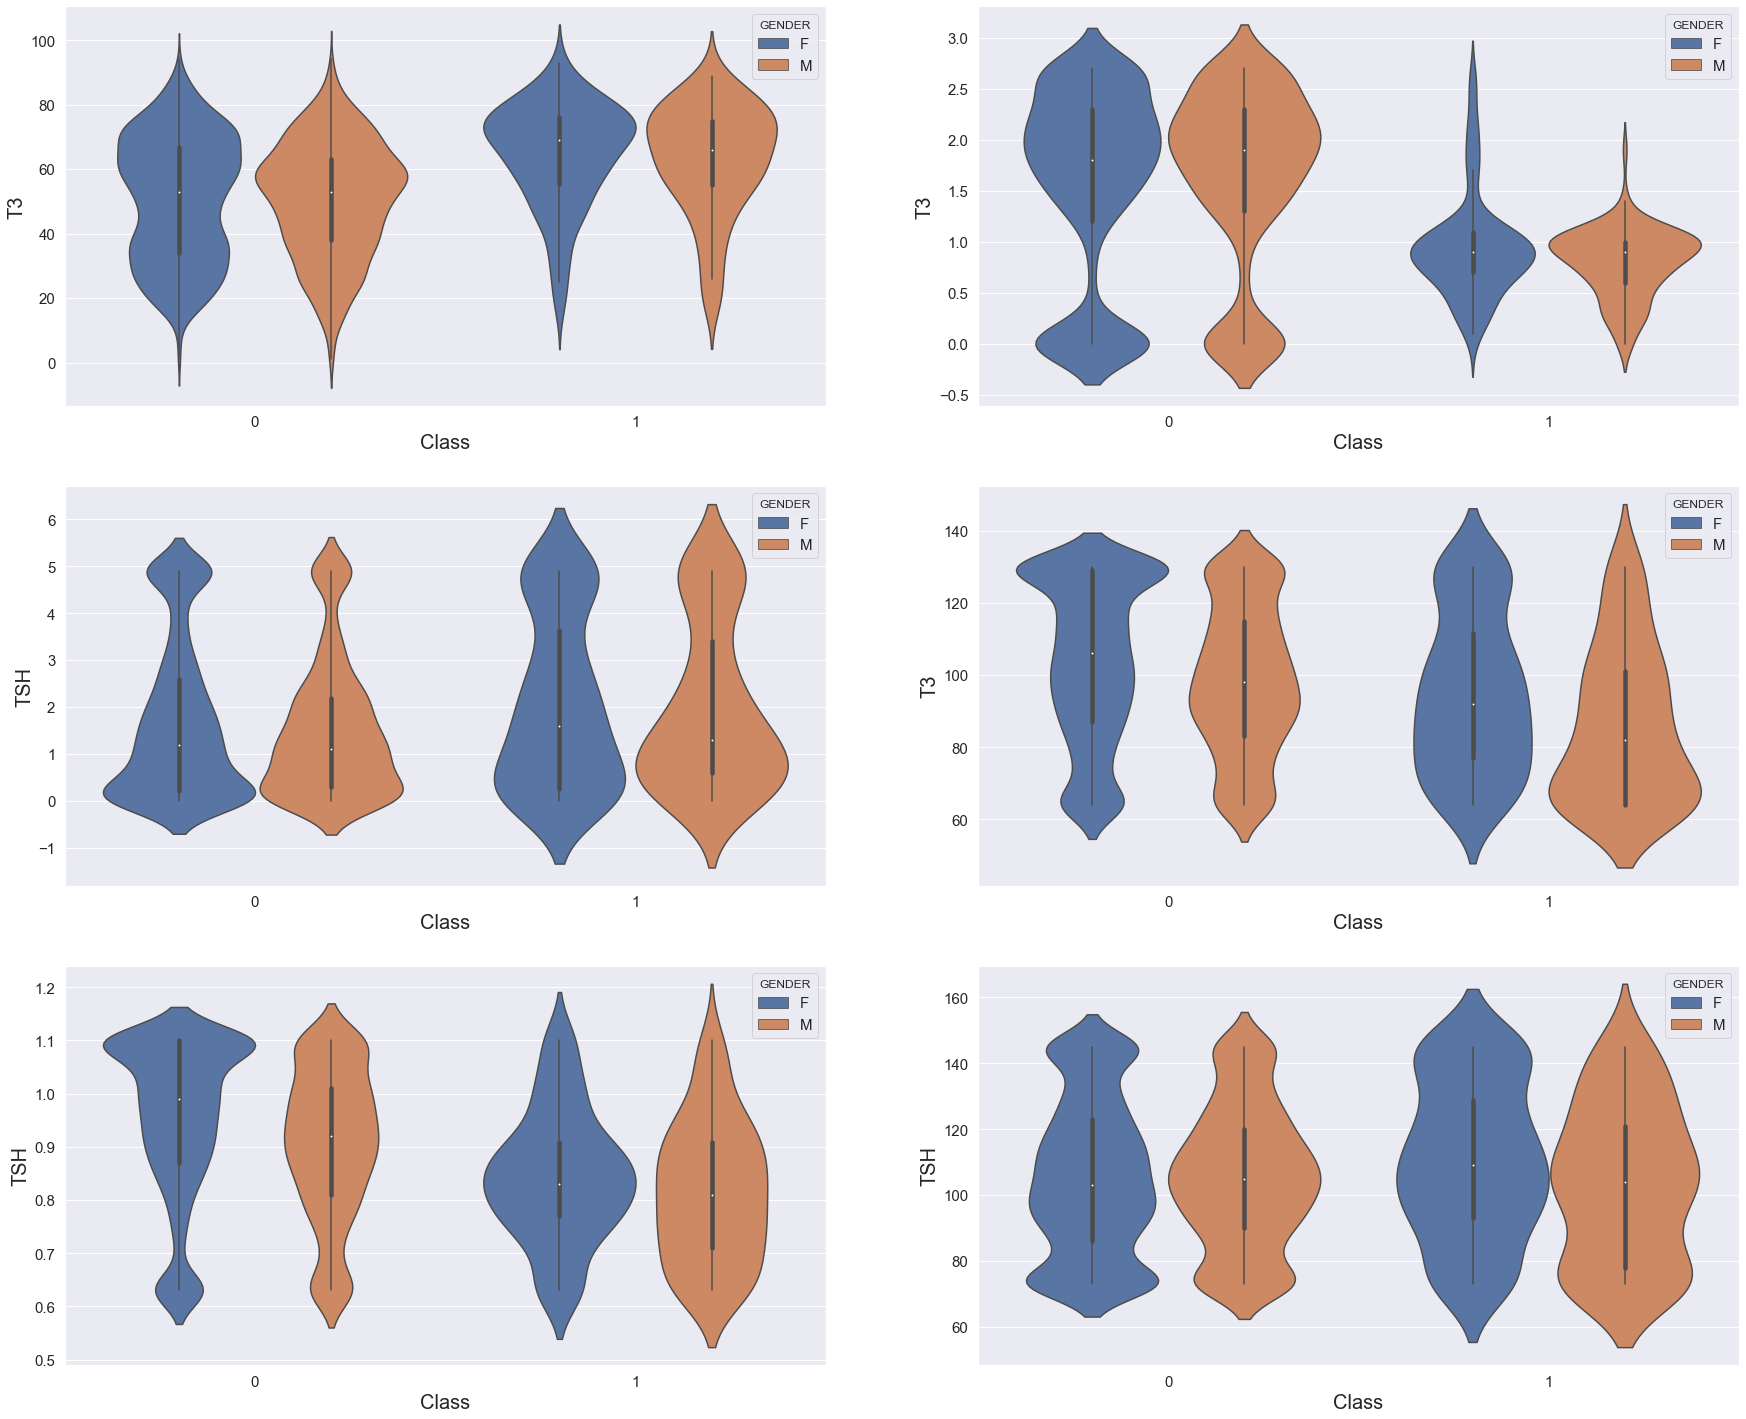

In [59]:
plt.figure(figsize= (30,25))
sns.set_theme(style="darkgrid")


plt.subplot(3,2,1)
plt.xticks(size=15)
plt.yticks(size=15)
sns.violinplot(x=df.Class,y=df.age,hue=df.sex)
plt.xlabel('Class',size=20)
plt.ylabel('T3',size=20)
plt.legend(title='GENDER',prop={'size':15})

plt.subplot(3,2,2)
plt.xticks(size=15)
plt.yticks(size=15)
sns.violinplot(x=df.Class,y=df.T3,hue=df.sex)
plt.xlabel('Class',size=20)
plt.ylabel('T3',size=20)
plt.legend(title='GENDER',prop={'size':15})

plt.subplot(3,2,3)
plt.xticks(size=15)
plt.yticks(size=15)
sns.violinplot(x=df.Class,y=df.TSH,hue=df.sex)
plt.xlabel('Class',size=20)
plt.ylabel('TSH',size=20)
plt.legend(title='GENDER',prop={'size':15})

plt.subplot(3,2,4)
plt.xticks(size=15)
plt.yticks(size=15)
sns.violinplot(x=df.Class,y=df.TT4,hue=df.sex)
plt.xlabel('Class',size=20)
plt.ylabel('T3',size=20)
plt.legend(title='GENDER',prop={'size':15})

plt.subplot(3,2,5)
plt.xticks(size=15)
plt.yticks(size=15)
sns.violinplot(x=df.Class,y=df.T4U,hue=df.sex)
plt.xlabel('Class',size=20)
plt.ylabel('TSH',size=20)
plt.legend(title='GENDER',prop={'size':15})

plt.subplot(3,2,6)
plt.xticks(size=15)
plt.yticks(size=15)
sns.violinplot(x=df.Class,y=df.FTI,hue=df.sex)
plt.xlabel('Class',size=20)
plt.ylabel('TSH',size=20)
plt.legend(title='GENDER',prop={'size':15})

plt.show()

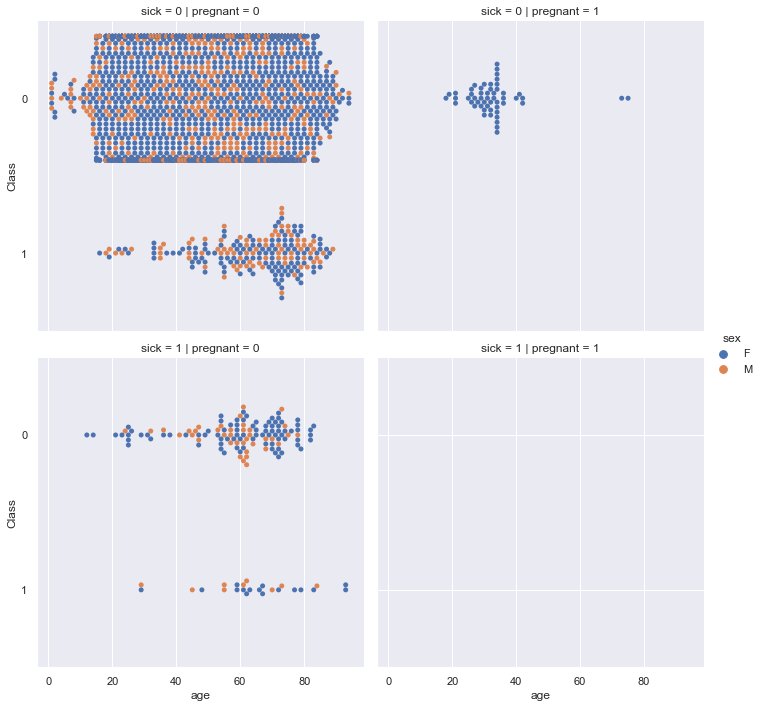

In [60]:
sns.catplot(x="age", y="Class", hue='sex',row='sick',col='pregnant',kind='swarm',data=df,orient='h')
plt.show()

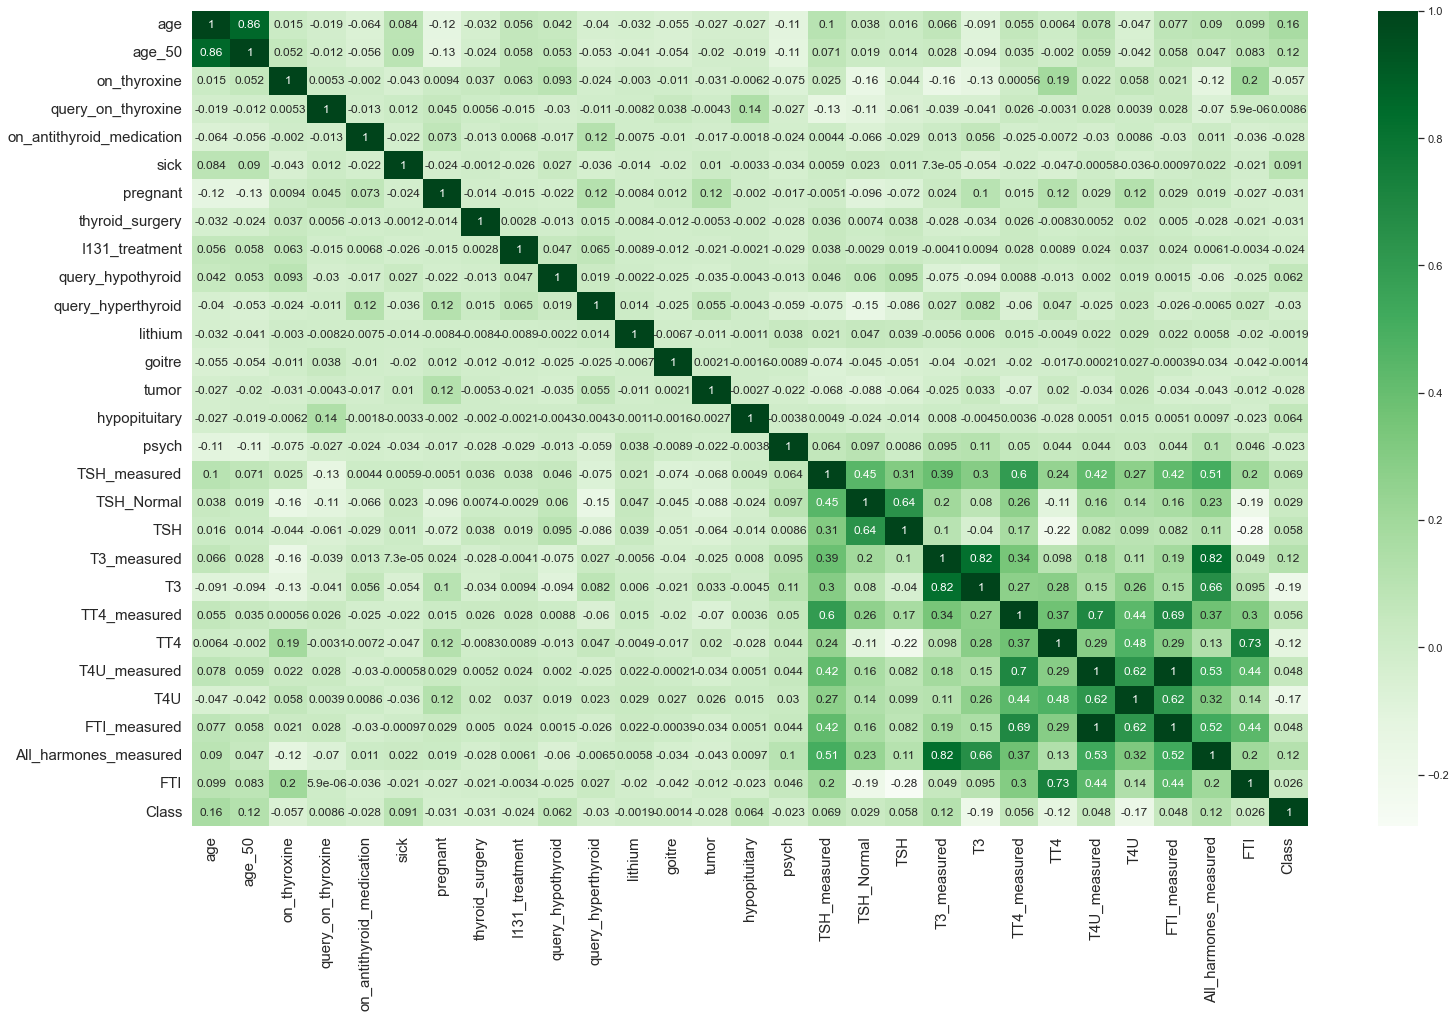

In [61]:
plt.figure(figsize=[25,15])
plt.xticks(size=15)
plt.yticks(size=15)
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

## Data preprocessing

## Dummy variables

In [62]:
df.head()

age  age_50 sex  on_thyroxine  query_on_thyroxine  \
0   41       0   F             0                   0   
1   23       0   F             0                   0   
2   46       0   M             0                   0   
3   70       1   F             1                   0   
4   70       1   F             0                   0   

   on_antithyroid_medication  sick  pregnant  thyroid_surgery  I131_treatment  \
0                          0     0         0                0               0   
1                          0     0         0                0               0   
2                          0     0         0                0               0   
3                          0     0         0                0               0   
4                          0     0         0                0               0   

   query_hypothyroid  query_hyperthyroid  lithium  goitre  tumor  \
0                  0                   0        0       0      0   
1                  0                   0        0       0      0   
2                  0                   0        0       0      0   
3                  0                   0        0       0      0   
4                  0                   0        0       0      0   

   hypopituitary  psych  TSH_measured  TSH_Normal     TSH  T3_measured  \
0              0      0             1           1 1.30000            1   
1              0      0             1           1 4.10000            1   
2              0      0             1           1 0.98000            0   
3              0      0             1           0 0.16000            1   
4              0      0             1           1 0.72000            1   

       T3  TT4_measured       TT4  T4U_measured     T4U  FTI_measured  \
0 2.50000             1 125.00000             1 1.10000             1   
1 2.00000             1 102.00000             0 0.63000             0   
2 0.00000             1 109.00000             1 0.91000             1   
3 1.90000             1 130.00000             0 0.63000             0   
4 1.20000             1  64.00000             1 0.87000             1   

   All_harmones_measured       FTI referral_source  Class  
0                      1 109.00000            SVHC      0  
1                      0  73.00000           other      0  
2                      0 120.00000           other      0  
3                      0  73.00000           other      0  
4                      1  73.00000             SVI      0

In [63]:
dummies=pd.get_dummies(df[['sex','referral_source']],prefix=['gender','refered_by_'])
df=pd.concat([df,dummies], axis=1)
df.drop(['sex','referral_source'],axis=1,inplace=True)
df.insert(len(df.columns)-1, 'Class', df.pop('Class'))

In [64]:
df.head()

age  age_50  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0   41       0             0                   0                          0   
1   23       0             0                   0                          0   
2   46       0             0                   0                          0   
3   70       1             1                   0                          0   
4   70       1             0                   0                          0   

   sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  \
0     0         0                0               0                  0   
1     0         0                0               0                  0   
2     0         0                0               0                  0   
3     0         0                0               0                  0   
4     0         0                0               0                  0   

   query_hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  \
0                   0        0       0      0              0      0   
1                   0        0       0      0              0      0   
2                   0        0       0      0              0      0   
3                   0        0       0      0              0      0   
4                   0        0       0      0              0      0   

   TSH_measured  TSH_Normal     TSH  T3_measured      T3  TT4_measured  \
0             1           1 1.30000            1 2.50000             1   
1             1           1 4.10000            1 2.00000             1   
2             1           1 0.98000            0 0.00000             1   
3             1           0 0.16000            1 1.90000             1   
4             1           1 0.72000            1 1.20000             1   

        TT4  T4U_measured     T4U  FTI_measured  All_harmones_measured  \
0 125.00000             1 1.10000             1                      1   
1 102.00000             0 0.63000             0                      0   
2 109.00000             1 0.91000             1                      0   
3 130.00000             0 0.63000             0                      0   
4  64.00000             1 0.87000             1                      1   

        FTI  gender_F  gender_M  refered_by__STMW  refered_by__SVHC  \
0 109.00000         1         0                 0                 1   
1  73.00000         1         0                 0                 0   
2 120.00000         0         1                 0                 0   
3  73.00000         1         0                 0                 0   
4  73.00000         1         0                 0                 0   

   refered_by__SVHD  refered_by__SVI  refered_by__other  Class  
0                 0                0                  0      0  
1                 0                0                  1      0  
2                 0                0                  1      0  
3                 0                0                  1      0  
4                 0                1                  0      0

In [65]:
dummies['Class']=df.Class
dummies.head()

gender_F  gender_M  refered_by__STMW  refered_by__SVHC  refered_by__SVHD  \
0         1         0                 0                 1                 0   
1         1         0                 0                 0                 0   
2         0         1                 0                 0                 0   
3         1         0                 0                 0                 0   
4         1         0                 0                 0                 0   

   refered_by__SVI  refered_by__other  Class  
0                0                  0      0  
1                0                  1      0  
2                0                  1      0  
3                0                  1      0  
4                1                  0      0

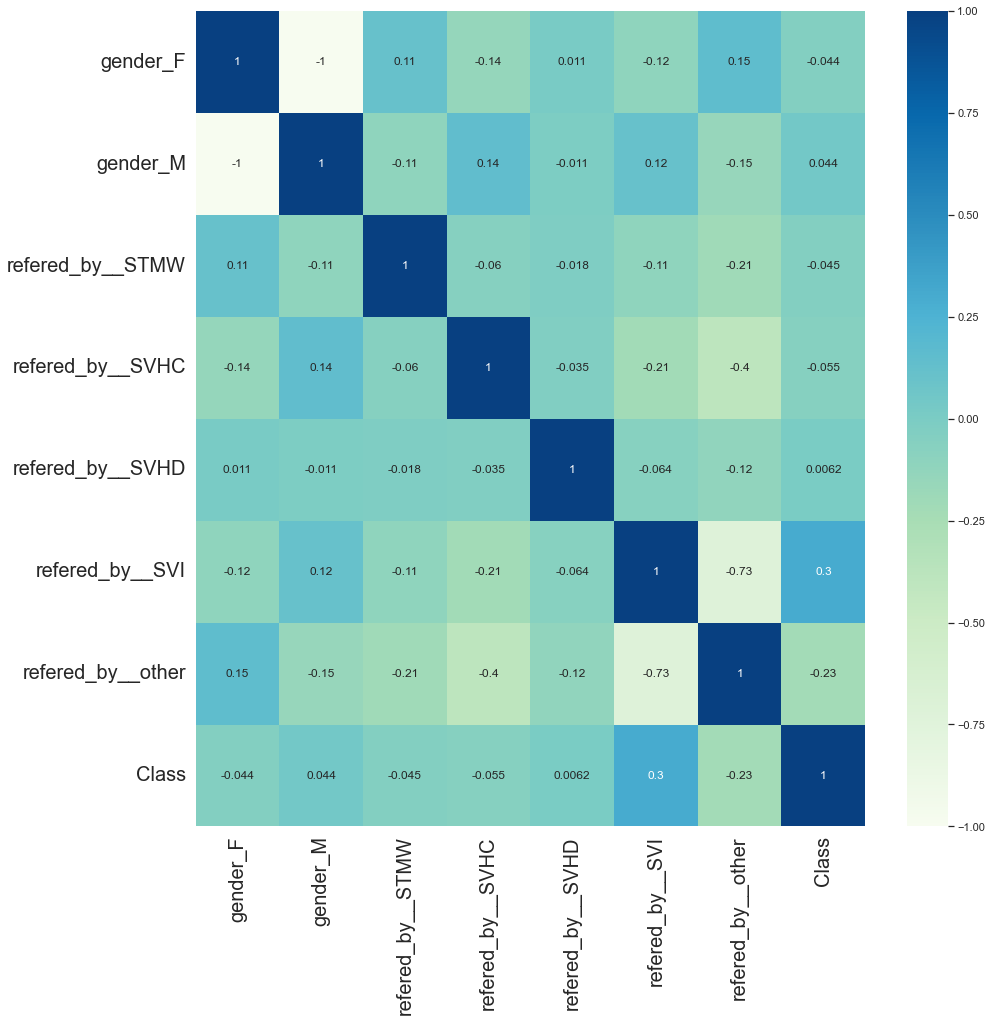

In [66]:
plt.figure(figsize=[15,15])
plt.xticks(size=20)
plt.yticks(size=20)
sns.heatmap(dummies.corr(),annot=True,cmap='GnBu')
plt.show()

## Train and Test datasets

In [67]:
df.head()

age  age_50  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0   41       0             0                   0                          0   
1   23       0             0                   0                          0   
2   46       0             0                   0                          0   
3   70       1             1                   0                          0   
4   70       1             0                   0                          0   

   sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  \
0     0         0                0               0                  0   
1     0         0                0               0                  0   
2     0         0                0               0                  0   
3     0         0                0               0                  0   
4     0         0                0               0                  0   

   query_hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  \
0                   0        0       0      0              0      0   
1                   0        0       0      0              0      0   
2                   0        0       0      0              0      0   
3                   0        0       0      0              0      0   
4                   0        0       0      0              0      0   

   TSH_measured  TSH_Normal     TSH  T3_measured      T3  TT4_measured  \
0             1           1 1.30000            1 2.50000             1   
1             1           1 4.10000            1 2.00000             1   
2             1           1 0.98000            0 0.00000             1   
3             1           0 0.16000            1 1.90000             1   
4             1           1 0.72000            1 1.20000             1   

        TT4  T4U_measured     T4U  FTI_measured  All_harmones_measured  \
0 125.00000             1 1.10000             1                      1   
1 102.00000             0 0.63000             0                      0   
2 109.00000             1 0.91000             1                      0   
3 130.00000             0 0.63000             0                      0   
4  64.00000             1 0.87000             1                      1   

        FTI  gender_F  gender_M  refered_by__STMW  refered_by__SVHC  \
0 109.00000         1         0                 0                 1   
1  73.00000         1         0                 0                 0   
2 120.00000         0         1                 0                 0   
3  73.00000         1         0                 0                 0   
4  73.00000         1         0                 0                 0   

   refered_by__SVHD  refered_by__SVI  refered_by__other  Class  
0                 0                0                  0      0  
1                 0                0                  1      0  
2                 0                0                  1      0  
3                 0                0                  1      0  
4                 0                1                  0      0

In [68]:
X=df.drop(['Class'],axis=1)

y=df.Class
  
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=100)

In [69]:
print(X_train.shape)
print(y_train.shape)             # checking if the shapes of train and test sets are compatible.
print(X_test.shape)
print(y_test.shape)

(2596, 35)
(2596,)
(1113, 35)
(1113,)


## Normalization

In [70]:
s=StandardScaler()

In [71]:
columns=['age','TSH','T3','TT4','T4U','FTI']  # seperating numerical columns for scaling.

X_train[columns] = s.fit_transform(X_train[columns]) 

In [72]:
X_train.head()

age  age_50  on_thyroxine  query_on_thyroxine  \
1795 -0.89587       0             1                   0   
2919  0.89725       1             0                   0   
479  -0.68491       0             1                   0   
3561 -0.21026       0             0                   0   
2949 -1.31778       0             0                   0   

      on_antithyroid_medication  sick  pregnant  thyroid_surgery  \
1795                          0     0         0                0   
2919                          0     1         0                0   
479                           0     0         0                0   
3561                          0     0         0                0   
2949                          0     0         0                0   

      I131_treatment  query_hypothyroid  query_hyperthyroid  lithium  goitre  \
1795               0                  0                   0        0       0   
2919               0                  0                   0        0       0   
479                0                  0                   0        0       0   
3561               0                  0                   0        0       0   
2949               0                  0                   0        0       0   

      tumor  hypopituitary  psych  TSH_measured  TSH_Normal      TSH  \
1795      0              0      0             1           0 -0.99982   
2919      1              0      0             0           0 -1.03093   
479       0              0      0             1           0 -0.87539   
3561      0              0      0             0           0 -1.03093   
2949      0              0      0             1           1  2.02009   

      T3_measured       T3  TT4_measured      TT4  T4U_measured      T4U  \
1795            0 -1.69203             1  1.23079             1  0.51787   
2919            0 -1.69203             0 -1.71083             0 -2.03552   
479             1  1.25268             1  1.04977             1  0.18190   
3561            1  0.92549             1  1.27605             1  1.12262   
2949            1  0.70736             1 -1.21301             1 -0.22127   

      FTI_measured  All_harmones_measured      FTI  gender_F  gender_M  \
1795             1                      0  0.97234         1         0   
2919             0                      0 -1.43165         1         0   
479              1                      1  1.05976         1         0   
3561             1                      0 -0.03297         0         1   
2949             1                      1 -0.95085         1         0   

      refered_by__STMW  refered_by__SVHC  refered_by__SVHD  refered_by__SVI  \
1795                 0                 0                 0                0   
2919                 0                 0                 0                0   
479                  0                 0                 0                0   
3561                 0                 0                 0                0   
2949                 0                 0                 0                1   

      refered_by__other  
1795                  1  
2919                  1  
479                   1  
3561                  1  
2949                  0

In [73]:
X_test[columns] = s.transform(X_test[columns])
X_test.head()

age  age_50  on_thyroxine  query_on_thyroxine  \
1951  0.42260       1             0                   0   
1880  1.10821       1             0                   0   
2874  0.52808       1             1                   1   
3676  0.10617       1             1                   0   
2316 -0.05205       1             0                   0   

      on_antithyroid_medication  sick  pregnant  thyroid_surgery  \
1951                          0     0         0                0   
1880                          0     0         0                0   
2874                          0     0         0                0   
3676                          0     0         0                0   
2316                          0     0         0                0   

      I131_treatment  query_hypothyroid  query_hyperthyroid  lithium  goitre  \
1951               0                  0                   0        0       0   
1880               0                  0                   0        0       0   
2874               0                  0                   0        0       0   
3676               0                  0                   0        0       0   
2316               0                  0                   0        0       0   

      tumor  hypopituitary  psych  TSH_measured  TSH_Normal      TSH  \
1951      0              0      0             1           1  0.58666   
1880      0              0      0             1           1 -0.40878   
2874      0              0      0             1           0 -1.01538   
3676      0              0      0             1           1  2.02009   
2316      0              0      0             1           1  2.02009   

      T3_measured       T3  TT4_measured      TT4  T4U_measured      T4U  \
1951            1  1.25268             1 -0.89622             1 -0.28846   
1880            1  0.05298             1 -1.16776             1 -0.82602   
2874            1  0.70736             1  1.27605             1  0.65226   
3676            0 -1.69203             1 -0.30790             1  0.31629   
2316            1 -1.25578             1 -1.71083             1  0.38348   

      FTI_measured  All_harmones_measured      FTI  gender_F  gender_M  \
1951             1                      1 -0.55747         0         1   
1880             1                      1 -0.51377         1         0   
2874             1                      1  1.71539         1         0   
3676             1                      0 -0.33893         1         0   
2316             1                      1 -1.43165         1         0   

      refered_by__STMW  refered_by__SVHC  refered_by__SVHD  refered_by__SVI  \
1951                 0                 1                 0                0   
1880                 0                 0                 0                1   
2874                 0                 0                 0                0   
3676                 0                 0                 0                0   
2316                 0                 0                 0                0   

      refered_by__other  
1951                  0  
1880                  0  
2874                  1  
3676                  1  
2316                  1

## Modeling

### Evaluation metrics:

In [74]:
metrics_df=pd.DataFrame(columns=['Accuracy','Precision','AUC_ROC Curve','Sensitivity','Specificity',
                                'Balanced Accuracy','F1 - score','False Positive Rate','False Negative Rate'])

def custom_metrics(a,p,method):
    from sklearn import metrics
    confusion = metrics.confusion_matrix(a,p)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    met=[]

    acc=round((TP+TN)/(TP+TN+FP+FN),2)
    prec=round(TP /(TP+FP),2)
    auc=round(metrics.roc_auc_score(a,p),2)
    sens=round(TP /(TP+FN),2)
    spec=round(TN / (TN+FP),2)
    bal=round((sens+spec)/2,2)
    f1=round((2*prec*sens)/(sens+prec),2)
    fpr=round(FN/(TP+FN),2)
    fnr=round(FP/(TN+FP),2)
    met.append([acc,prec,auc,sens,spec,bal,f1,fpr,fnr])
    metrics_df.loc[method]=met[0]
    return metrics_df.tail(2)

    
# custom function for plotting a ROC Curve.
def draw_roc( actual, probs ):           
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

# Logistic Regression

In [75]:
#  First Logistic regression model 
logreg=LogisticRegression().fit(X_train,y_train)

#### Train set prediction:

In [76]:
# Getting the predicted values on the train set
y_train_pred = logreg.predict(X_train)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
y_train_predictions = pd.DataFrame({'Class':y_train.values, 'Predicted':y_train_pred})
y_train_predictions.head()

Class  Predicted
0      0          0
1      0          0
2      0          0
3      0          0
4      0          0

In [78]:
custom_metrics(y_train_predictions.Class,y_train_predictions.Predicted,'Logistic_Regression_Train')

metrics_df.head()

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Logistic_Regression_Train   0.96000    0.78000        0.76000      0.54000   

                           Specificity  Balanced Accuracy  F1 - score  \
Logistic_Regression_Train      0.99000            0.76000     0.64000   

                           False Positive Rate  False Negative Rate  
Logistic_Regression_Train              0.46000              0.01000

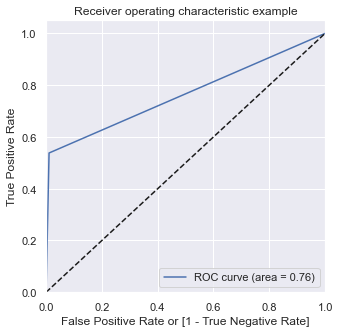

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predictions.Class, y_train_predictions.Predicted, drop_intermediate = False )
draw_roc(y_train_predictions.Class,y_train_predictions.Predicted)

#### Test set prediction:

In [80]:
X_test.head()

age  age_50  on_thyroxine  query_on_thyroxine  \
1951  0.42260       1             0                   0   
1880  1.10821       1             0                   0   
2874  0.52808       1             1                   1   
3676  0.10617       1             1                   0   
2316 -0.05205       1             0                   0   

      on_antithyroid_medication  sick  pregnant  thyroid_surgery  \
1951                          0     0         0                0   
1880                          0     0         0                0   
2874                          0     0         0                0   
3676                          0     0         0                0   
2316                          0     0         0                0   

      I131_treatment  query_hypothyroid  query_hyperthyroid  lithium  goitre  \
1951               0                  0                   0        0       0   
1880               0                  0                   0        0       0   
2874               0                  0                   0        0       0   
3676               0                  0                   0        0       0   
2316               0                  0                   0        0       0   

      tumor  hypopituitary  psych  TSH_measured  TSH_Normal      TSH  \
1951      0              0      0             1           1  0.58666   
1880      0              0      0             1           1 -0.40878   
2874      0              0      0             1           0 -1.01538   
3676      0              0      0             1           1  2.02009   
2316      0              0      0             1           1  2.02009   

      T3_measured       T3  TT4_measured      TT4  T4U_measured      T4U  \
1951            1  1.25268             1 -0.89622             1 -0.28846   
1880            1  0.05298             1 -1.16776             1 -0.82602   
2874            1  0.70736             1  1.27605             1  0.65226   
3676            0 -1.69203             1 -0.30790             1  0.31629   
2316            1 -1.25578             1 -1.71083             1  0.38348   

      FTI_measured  All_harmones_measured      FTI  gender_F  gender_M  \
1951             1                      1 -0.55747         0         1   
1880             1                      1 -0.51377         1         0   
2874             1                      1  1.71539         1         0   
3676             1                      0 -0.33893         1         0   
2316             1                      1 -1.43165         1         0   

      refered_by__STMW  refered_by__SVHC  refered_by__SVHD  refered_by__SVI  \
1951                 0                 1                 0                0   
1880                 0                 0                 0                1   
2874                 0                 0                 0                0   
3676                 0                 0                 0                0   
2316                 0                 0                 0                0   

      refered_by__other  
1951                  0  
1880                  0  
2874                  1  
3676                  1  
2316                  1

In [81]:
y_test_predictions=logreg.predict(X_test)
y_test_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [82]:
custom_metrics(y_test,y_test_predictions,'Logistic_Regression_Test')

metrics_df.head()

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Logistic_Regression_Train   0.96000    0.78000        0.76000      0.54000   
Logistic_Regression_Test    0.97000    0.75000        0.79000      0.60000   

                           Specificity  Balanced Accuracy  F1 - score  \
Logistic_Regression_Train      0.99000            0.76000     0.64000   
Logistic_Regression_Test       0.99000            0.80000     0.67000   

                           False Positive Rate  False Negative Rate  
Logistic_Regression_Train              0.46000              0.01000  
Logistic_Regression_Test               0.40000              0.01000

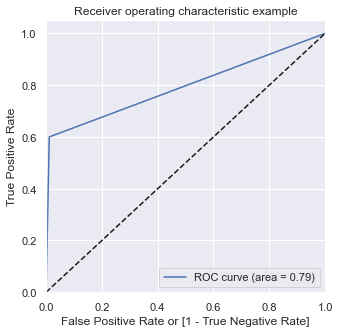

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predictions, drop_intermediate = False )
draw_roc(y_test,y_test_predictions)

# Decision Tree

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2596, 35)
(2596,)
(1113, 35)
(1113,)


In [85]:
# creating a decision tree object

dt = DecisionTreeClassifier(random_state=21)              


# creating a dictionary for different combinations of parameters.
params = {                                           
    "max_depth": [2,3,4,5,6],
    'max_features':[2,3,4,6,8],
    "min_samples_leaf": [1,5,10,15,20,25],
    "min_samples_split":[1,5,10,15,20,25],
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}



# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           n_jobs=-1, verbose=1, scoring = "accuracy")


# Fitting the data set to grid search cv.                 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=21), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4, 6, 8],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 25],
                         'min_samples_split': [1, 5, 10, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [86]:
dt_best = grid_search.best_estimator_
dt_best      

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=6,
                       min_samples_split=5, random_state=21)

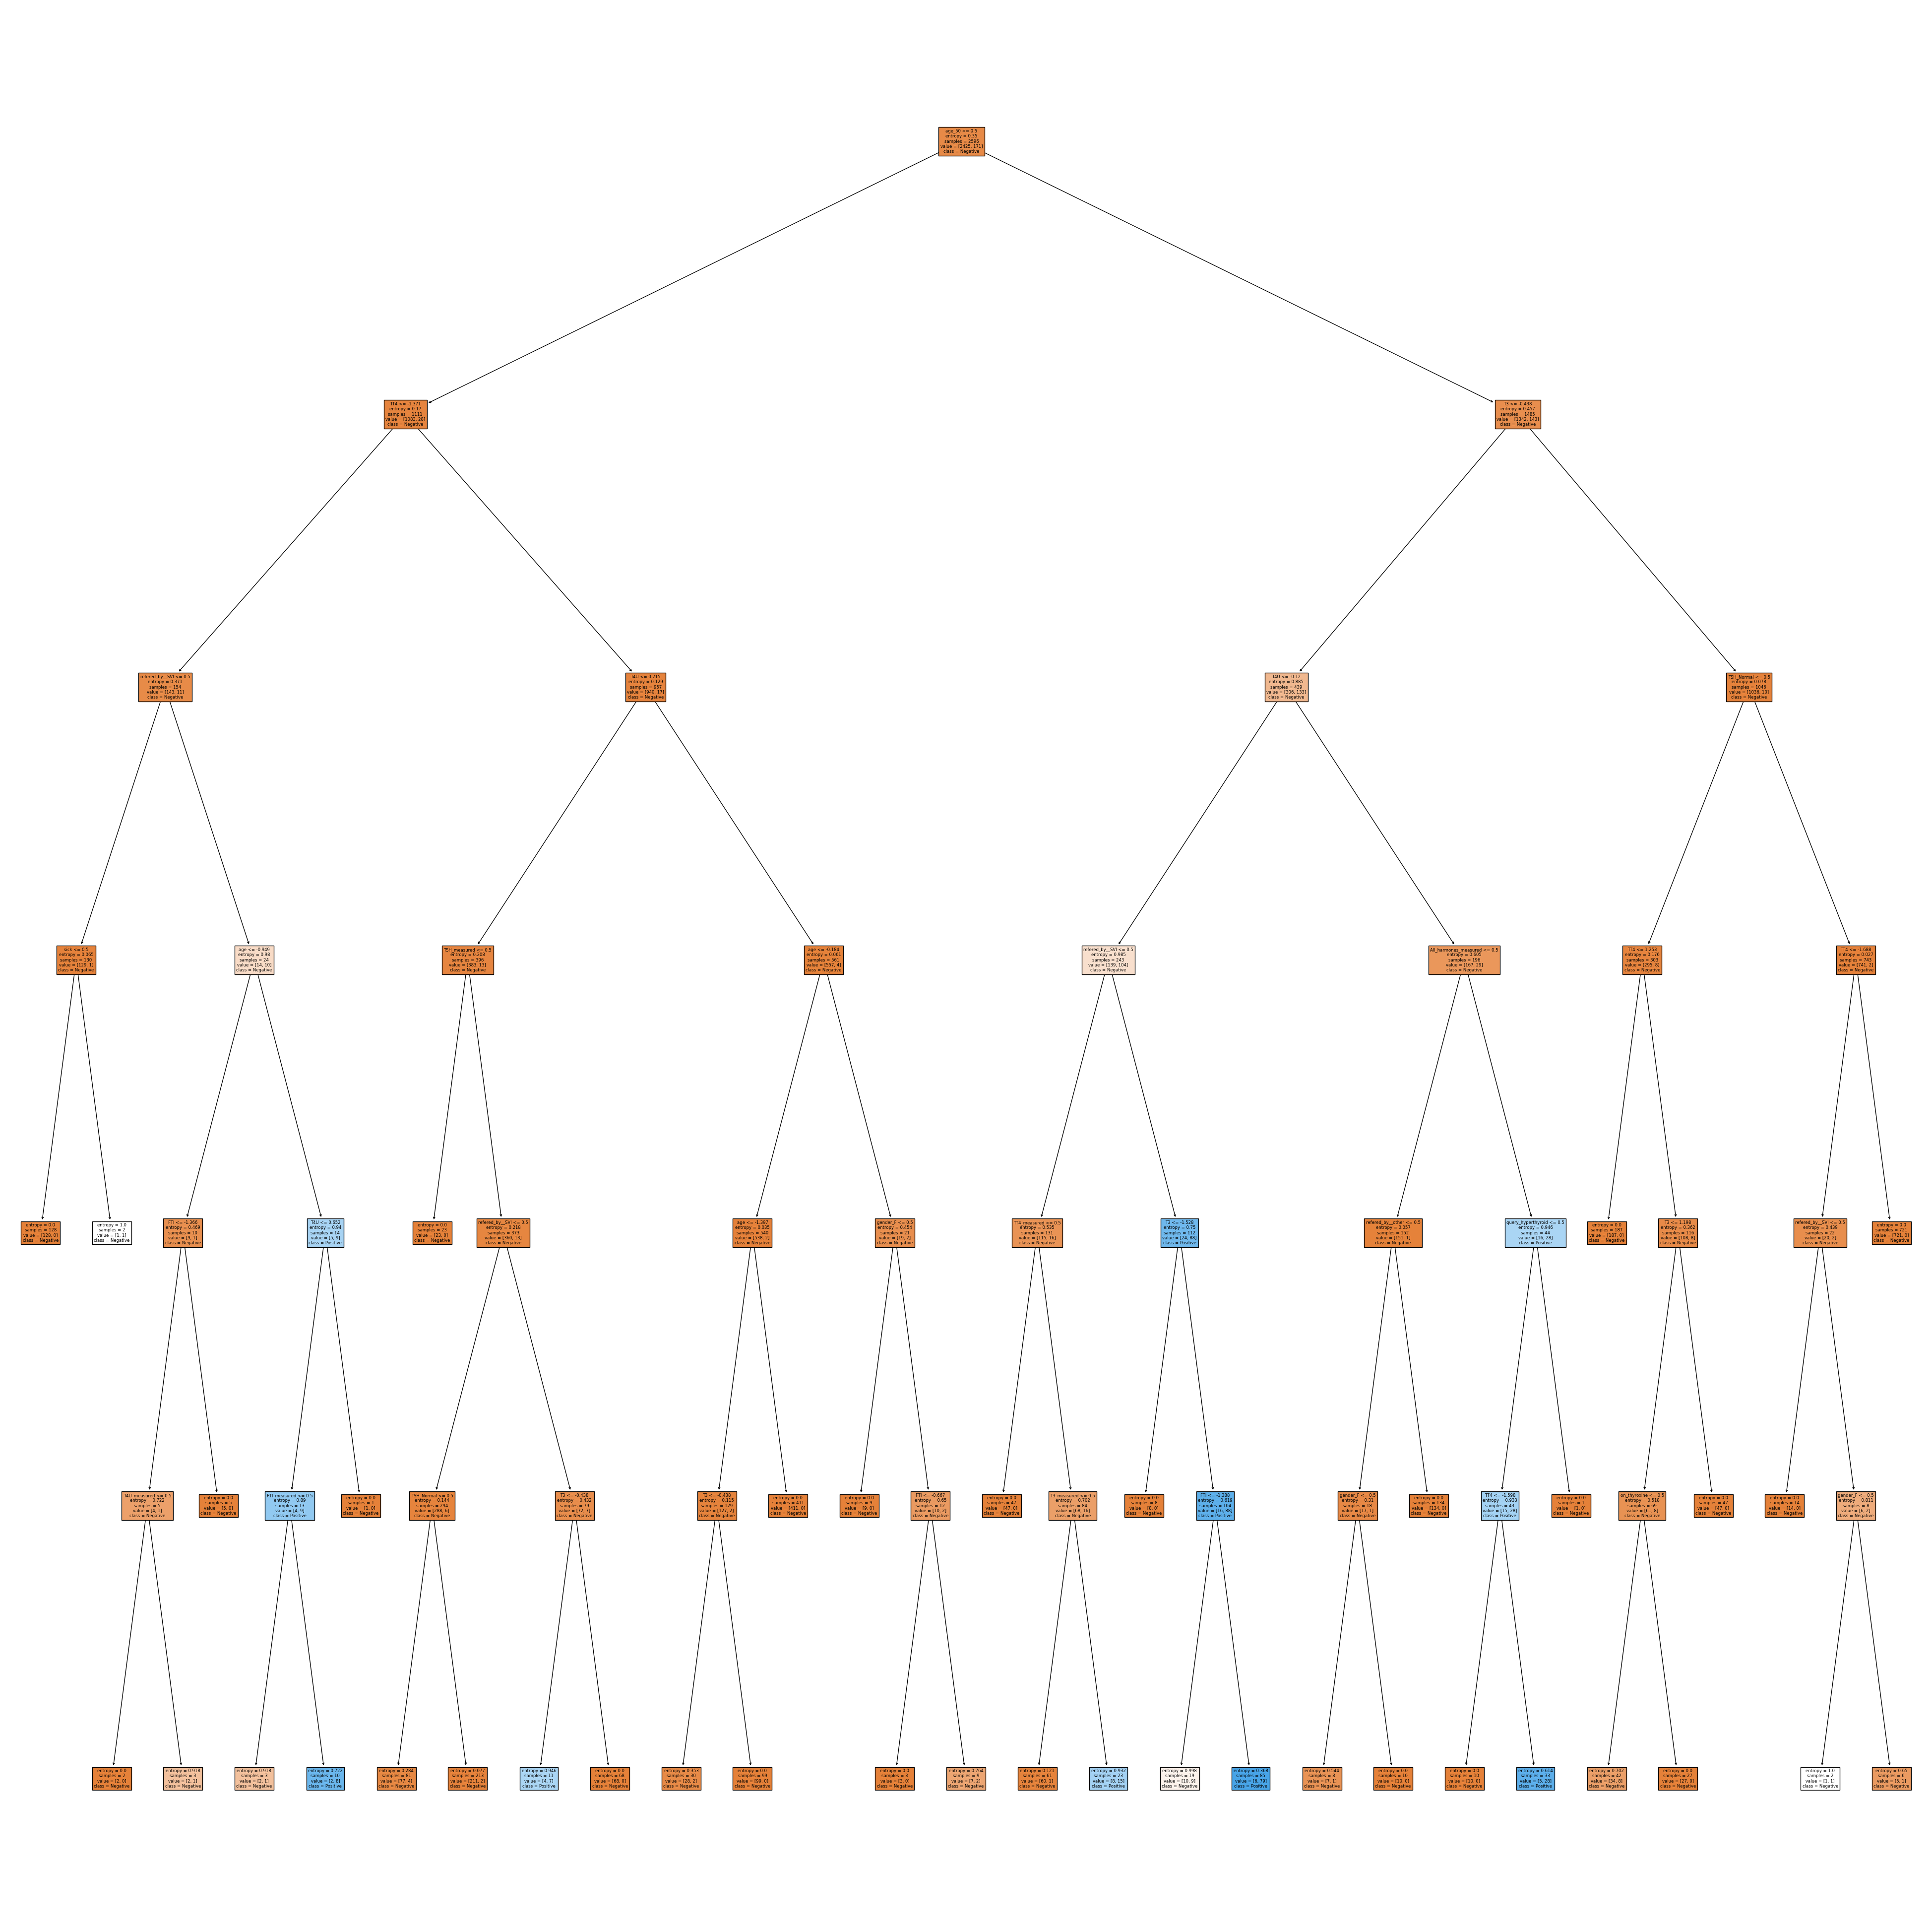

In [87]:
sns.reset_defaults()
fig=plt.figure(figsize=[50,50])
tree.plot_tree(dt_best,feature_names=X.columns,class_names=['Negative','Positive'],filled=True)
plt.show()        

#### Train set predictions

In [88]:
y_train_predictions=dt_best.predict(X_train)

custom_metrics(y_train,y_train_predictions,'Decision_Tree_Train')

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Logistic_Regression_Test   0.97000    0.75000        0.79000      0.60000   
Decision_Tree_Train        0.98000    0.85000        0.90000      0.80000   

                          Specificity  Balanced Accuracy  F1 - score  \
Logistic_Regression_Test      0.99000            0.80000     0.67000   
Decision_Tree_Train           0.99000            0.90000     0.82000   

                          False Positive Rate  False Negative Rate  
Logistic_Regression_Test              0.40000              0.01000  
Decision_Tree_Train                   0.20000              0.01000

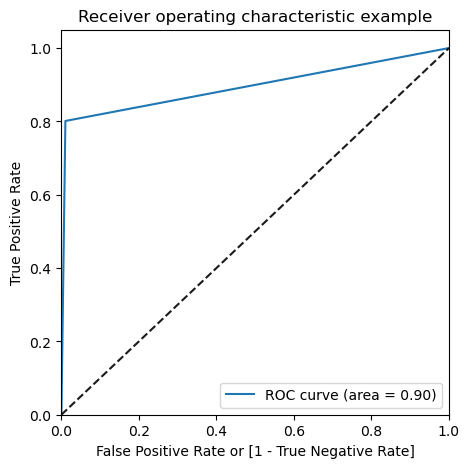

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predictions, drop_intermediate = False )
draw_roc(y_train,y_train_predictions)

#### Test set predictions

In [90]:
y_test_predictions=dt_best.predict(X_test)

custom_metrics(y_test,y_test_predictions,'Decision_Tree_Test')

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Decision_Tree_Train   0.98000    0.85000        0.90000      0.80000   
Decision_Tree_Test    0.97000    0.72000        0.87000      0.77000   

                     Specificity  Balanced Accuracy  F1 - score  \
Decision_Tree_Train      0.99000            0.90000     0.82000   
Decision_Tree_Test       0.98000            0.88000     0.74000   

                     False Positive Rate  False Negative Rate  
Decision_Tree_Train              0.20000              0.01000  
Decision_Tree_Test               0.23000              0.02000

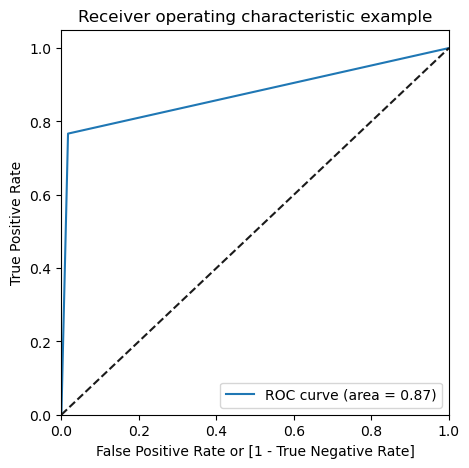

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predictions, drop_intermediate = False )
draw_roc(y_test,y_test_predictions)

# Random Forest

In [92]:
# creating a random forest classifier object.

classifier_rf = RandomForestClassifier(n_estimators=2,random_state=42)     


# Create the parameter grid based on the results of random search 
params = {
     "max_depth": [2,3,4,5,6],
    'max_features':[2,3,4,6,8],
    "min_samples_leaf": [1,5,10,15,20,25],
    "min_samples_split":[1,5,10,15,20,25],
    'n_estimators': [2,4,5,6,8],
    'criterion':['gini', 'entropy']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          n_jobs=-1, verbose=1, scoring = "accuracy")

# fitting grid search cv on our train dataset
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


GridSearchCV(estimator=RandomForestClassifier(n_estimators=2, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4, 6, 8],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 25],
                         'min_samples_split': [1, 5, 10, 15, 20, 25],
                         'n_estimators': [2, 4, 5, 6, 8]},
             scoring='accuracy', verbose=1)

In [93]:
rf_best = grid_search.best_estimator_
rf_best                  # Getting our best estimator

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=4,
                       min_samples_split=5, n_estimators=4, random_state=42)

### Train Set predictions:

In [94]:
y_train_predicted=rf_best.predict(X_train)

custom_metrics(y_train,y_train_predicted,'Random_Forest Train')

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Decision_Tree_Test    0.97000    0.72000        0.87000      0.77000   
Random_Forest Train   0.97000    0.84000        0.81000      0.63000   

                     Specificity  Balanced Accuracy  F1 - score  \
Decision_Tree_Test       0.98000            0.88000     0.74000   
Random_Forest Train      0.99000            0.81000     0.72000   

                     False Positive Rate  False Negative Rate  
Decision_Tree_Test               0.23000              0.02000  
Random_Forest Train              0.37000              0.01000

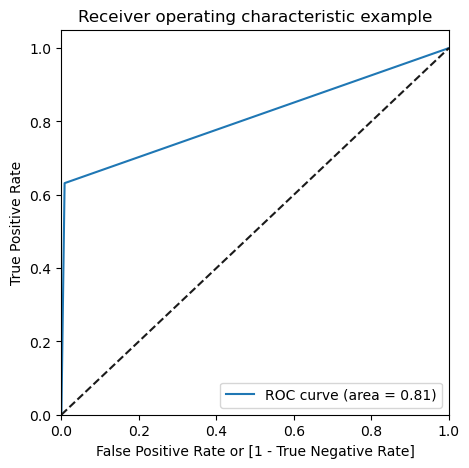

In [95]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predicted, drop_intermediate = False )
draw_roc(y_train,y_train_predicted)

### Test set predictions

In [96]:
y_test_predicted=rf_best.predict(X_test)

custom_metrics(y_test,y_test_predicted,'Random_Forest Test')

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Random_Forest Train   0.97000    0.84000        0.81000      0.63000   
Random_Forest Test    0.96000    0.73000        0.76000      0.53000   

                     Specificity  Balanced Accuracy  F1 - score  \
Random_Forest Train      0.99000            0.81000     0.72000   
Random_Forest Test       0.99000            0.76000     0.61000   

                     False Positive Rate  False Negative Rate  
Random_Forest Train              0.37000              0.01000  
Random_Forest Test               0.47000              0.01000

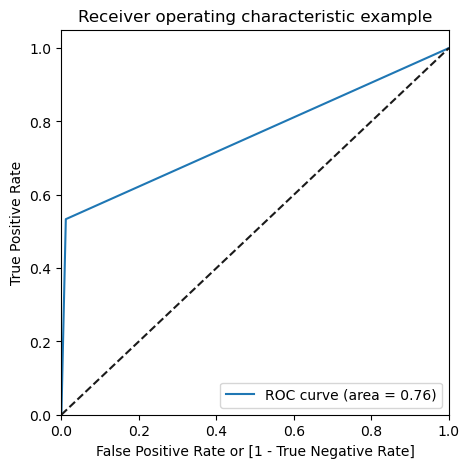

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predicted, drop_intermediate = False )
draw_roc(y_test,y_test_predicted)

In [98]:
metrics_df.tail(2)

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Random_Forest Train   0.97000    0.84000        0.81000      0.63000   
Random_Forest Test    0.96000    0.73000        0.76000      0.53000   

                     Specificity  Balanced Accuracy  F1 - score  \
Random_Forest Train      0.99000            0.81000     0.72000   
Random_Forest Test       0.99000            0.76000     0.61000   

                     False Positive Rate  False Negative Rate  
Random_Forest Train              0.37000              0.01000  
Random_Forest Test               0.47000              0.01000

# AdaBoost

In [99]:
adb=AdaBoostClassifier()

params = {
    'n_estimators': [10,20,25,30,40],
    'learning_rate': [0.01,0.05,0.1,0.2,0.3]
}


grid_search = GridSearchCV(estimator=adb,param_grid=params,
                          cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

# fitting grid search cv on our train dataset
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'n_estimators': [10, 20, 25, 30, 40]},
             scoring='accuracy', verbose=1)

In [100]:
adb_best = grid_search.best_estimator_
adb_best        

AdaBoostClassifier(learning_rate=0.2, n_estimators=40)

In [101]:
y_train_predicted=adb_best.predict(X_train)
y_test_predicted=adb_best.predict(X_test)

custom_metrics(y_train,y_train_predicted,'AdaBoost Train')
custom_metrics(y_test,y_test_predicted,'AdaBoost Test')

Accuracy  Precision  AUC_ROC Curve  Sensitivity  Specificity  \
AdaBoost Train   0.97000    0.80000        0.85000      0.72000      0.99000   
AdaBoost Test    0.97000    0.70000        0.84000      0.70000      0.98000   

                Balanced Accuracy  F1 - score  False Positive Rate  \
AdaBoost Train            0.86000     0.76000              0.28000   
AdaBoost Test             0.84000     0.70000              0.30000   

                False Negative Rate  
AdaBoost Train              0.01000  
AdaBoost Test               0.02000

In [102]:
metrics_df.tail(2)

Accuracy  Precision  AUC_ROC Curve  Sensitivity  Specificity  \
AdaBoost Train   0.97000    0.80000        0.85000      0.72000      0.99000   
AdaBoost Test    0.97000    0.70000        0.84000      0.70000      0.98000   

                Balanced Accuracy  F1 - score  False Positive Rate  \
AdaBoost Train            0.86000     0.76000              0.28000   
AdaBoost Test             0.84000     0.70000              0.30000   

                False Negative Rate  
AdaBoost Train              0.01000  
AdaBoost Test               0.02000

# Gradient Boosting

In [103]:
gbm=GradientBoostingClassifier()


# creating a dictionary for different combinations of parameters.
params = {  
    'n_estimators':[5,10,15,20,25],
    "max_depth": [2,3,4,5,6],
    'learning_rate':[0.01,0.05,0.1,0.2,0.3]
}



# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbm, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


# Fitting the data set to grid search cv.                 
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [5, 10, 15, 20, 25]},
             scoring='accuracy', verbose=1)

In [104]:
gbm_best = grid_search.best_estimator_
gbm_best  

GradientBoostingClassifier(learning_rate=0.2, n_estimators=20)

In [105]:
y_train_predictions=gbm_best.predict(X_train)
y_test_predictions=gbm_best.predict(X_test)

custom_metrics(y_train,y_train_predictions,'Gradient Boosting  Train')
custom_metrics(y_test,y_test_predictions,'Gradient Boosting  Test')

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Gradient Boosting  Train   0.99000    0.94000        0.93000      0.85000   
Gradient Boosting  Test    0.98000    0.84000        0.90000      0.80000   

                          Specificity  Balanced Accuracy  F1 - score  \
Gradient Boosting  Train      1.00000            0.92000     0.89000   
Gradient Boosting  Test       0.99000            0.90000     0.82000   

                          False Positive Rate  False Negative Rate  
Gradient Boosting  Train              0.15000              0.00000  
Gradient Boosting  Test               0.20000              0.01000

In [106]:
metrics_df.tail(2)

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Gradient Boosting  Train   0.99000    0.94000        0.93000      0.85000   
Gradient Boosting  Test    0.98000    0.84000        0.90000      0.80000   

                          Specificity  Balanced Accuracy  F1 - score  \
Gradient Boosting  Train      1.00000            0.92000     0.89000   
Gradient Boosting  Test       0.99000            0.90000     0.82000   

                          False Positive Rate  False Negative Rate  
Gradient Boosting  Train              0.15000              0.00000  
Gradient Boosting  Test               0.20000              0.01000

# Extreme Gradient Boosting:

In [107]:
xgb = xgb.XGBClassifier()


parameters = {'learning_rate': [0.05,0.1,0.2,0.3,0.5],
              'n_estimators': [5,10,12,15,20]}



# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


# Fitting the data set to grid search cv.                 
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [108]:
xgb_best = grid_search.best_estimator_
xgb_best  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [109]:
y_train_predictions=xgb_best.predict(X_train)
y_test_predictions=xgb_best.predict(X_test)

custom_metrics(y_train,y_train_predictions,'XGBoost  Train')
custom_metrics(y_test,y_test_predictions,'XGBoost  Test')

Accuracy  Precision  AUC_ROC Curve  Sensitivity  Specificity  \
XGBoost  Train   0.98000    0.92000        0.92000      0.85000      0.99000   
XGBoost  Test    0.98000    0.83000        0.90000      0.82000      0.99000   

                Balanced Accuracy  F1 - score  False Positive Rate  \
XGBoost  Train            0.92000     0.88000              0.15000   
XGBoost  Test             0.90000     0.82000              0.18000   

                False Negative Rate  
XGBoost  Train              0.01000  
XGBoost  Test               0.01000

In [110]:
metrics_df.tail(2)

Accuracy  Precision  AUC_ROC Curve  Sensitivity  Specificity  \
XGBoost  Train   0.98000    0.92000        0.92000      0.85000      0.99000   
XGBoost  Test    0.98000    0.83000        0.90000      0.82000      0.99000   

                Balanced Accuracy  F1 - score  False Positive Rate  \
XGBoost  Train            0.92000     0.88000              0.15000   
XGBoost  Test             0.90000     0.82000              0.18000   

                False Negative Rate  
XGBoost  Train              0.01000  
XGBoost  Test               0.01000

In [111]:
metrics_df

Accuracy  Precision  AUC_ROC Curve  Sensitivity  \
Logistic_Regression_Train   0.96000    0.78000        0.76000      0.54000   
Logistic_Regression_Test    0.97000    0.75000        0.79000      0.60000   
Decision_Tree_Train         0.98000    0.85000        0.90000      0.80000   
Decision_Tree_Test          0.97000    0.72000        0.87000      0.77000   
Random_Forest Train         0.97000    0.84000        0.81000      0.63000   
Random_Forest Test          0.96000    0.73000        0.76000      0.53000   
AdaBoost Train              0.97000    0.80000        0.85000      0.72000   
AdaBoost Test               0.97000    0.70000        0.84000      0.70000   
Gradient Boosting  Train    0.99000    0.94000        0.93000      0.85000   
Gradient Boosting  Test     0.98000    0.84000        0.90000      0.80000   
XGBoost  Train              0.98000    0.92000        0.92000      0.85000   
XGBoost  Test               0.98000    0.83000        0.90000      0.82000   

                           Specificity  Balanced Accuracy  F1 - score  \
Logistic_Regression_Train      0.99000            0.76000     0.64000   
Logistic_Regression_Test       0.99000            0.80000     0.67000   
Decision_Tree_Train            0.99000            0.90000     0.82000   
Decision_Tree_Test             0.98000            0.88000     0.74000   
Random_Forest Train            0.99000            0.81000     0.72000   
Random_Forest Test             0.99000            0.76000     0.61000   
AdaBoost Train                 0.99000            0.86000     0.76000   
AdaBoost Test                  0.98000            0.84000     0.70000   
Gradient Boosting  Train       1.00000            0.92000     0.89000   
Gradient Boosting  Test        0.99000            0.90000     0.82000   
XGBoost  Train                 0.99000            0.92000     0.88000   
XGBoost  Test                  0.99000            0.90000     0.82000   

                           False Positive Rate  False Negative Rate  
Logistic_Regression_Train              0.46000              0.01000  
Logistic_Regression_Test               0.40000              0.01000  
Decision_Tree_Train                    0.20000              0.01000  
Decision_Tree_Test                     0.23000              0.02000  
Random_Forest Train                    0.37000              0.01000  
Random_Forest Test                     0.47000              0.01000  
AdaBoost Train                         0.28000              0.01000  
AdaBoost Test                          0.30000              0.02000  
Gradient Boosting  Train               0.15000              0.00000  
Gradient Boosting  Test                0.20000              0.01000  
XGBoost  Train                         0.15000              0.01000  
XGBoost  Test                          0.18000              0.01000

In [112]:
metrics_df.to_excel('model_metrics2.xlsx',engine='xlsxwriter')

# Sampling Techniques

In [113]:
print('X: ',X.shape)
print('y: ',y.shape)

print('.....................................................................')


# we need to generate various datasets using different sampling techniques....

# UnderSampling

X_us,y_us=RandomUnderSampler(sampling_strategy=0.5).fit_resample(X,y)
print('X_us: ',X_us.shape)
print('y_us: ',y_us.shape)
print('.....................................................................')    


# OverSampling

X_os,y_os=RandomOverSampler(sampling_strategy='minority').fit_resample(X,y)
    
print('X_os: ',X_os.shape)
print('y_os: ',y_os.shape)
print('.....................................................................')    


# ADASYN

X_ad,y_ad=ADASYN(sampling_strategy='minority').fit_resample(X,y)
print('X_ad: ',X_ad.shape)
print('y_ad: ',y_ad.shape)
print('.....................................................................')    


# SMOTE

X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)
print('X_smote: ',X_smote.shape)
print('y_smote: ',y_smote.shape)
print('.....................................................................')  


X:  (3709, 35)
y:  (3709,)
.....................................................................
X_us:  (693, 35)
y_us:  (693,)
.....................................................................
X_os:  (6956, 35)
y_os:  (6956,)
.....................................................................
X_ad:  (6962, 35)
y_ad:  (6962,)
.....................................................................
X_smote:  (6956, 35)
y_smote:  (6956,)
.....................................................................


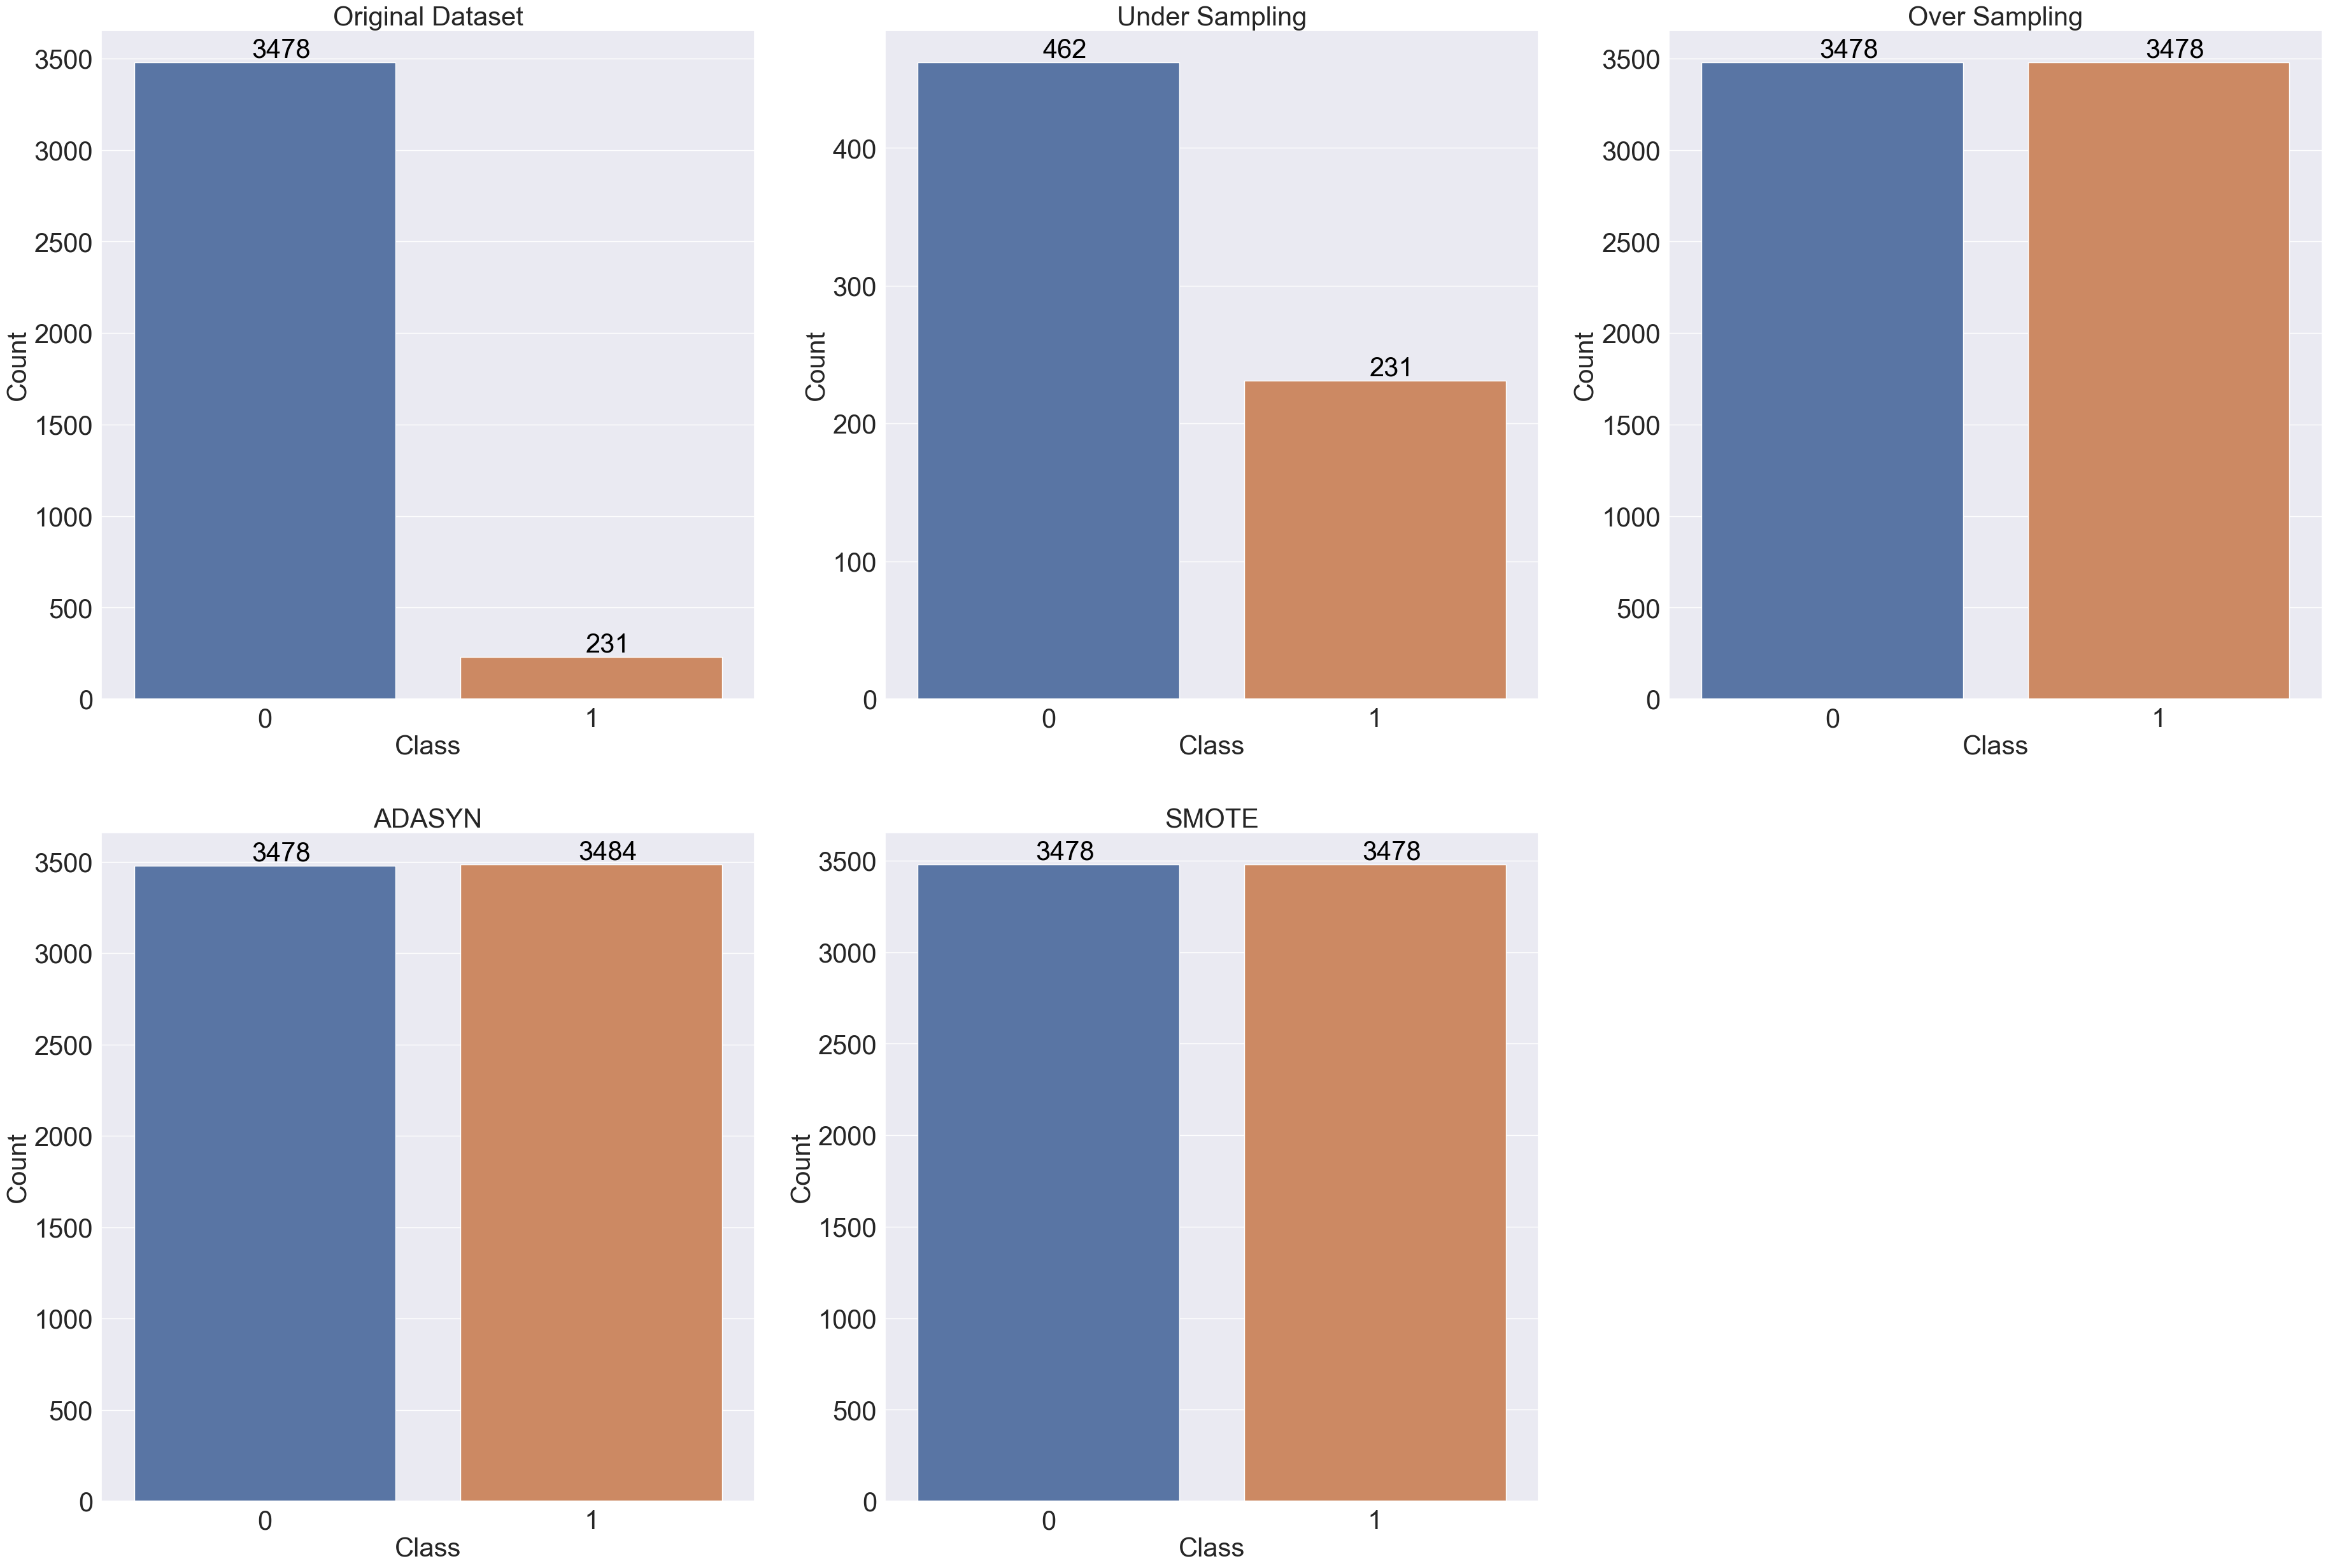

In [114]:
plt.figure(figsize= (45,30))
sns.set_theme(style="darkgrid")

plt.subplot(2,3,1)
a=sns.countplot(y)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Original Dataset',size=30)


plt.subplot(2,3,2)
a=sns.countplot(y_us)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Under Sampling',size=30)


plt.subplot(2,3,3)
a=sns.countplot(y_os)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('Over Sampling',size=30)


plt.subplot(2,3,4)
a=sns.countplot(y_ad)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('ADASYN',size=30)


plt.subplot(2,3,5)
a=sns.countplot(y_smote)
for i in a.patches:
        a.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.45,i.get_height()),ha='center',va='bottom',color='black',fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Class',size=30)
plt.ylabel('Count',size=30)
plt.title('SMOTE',size=30)
          
          
plt.show()

### Train - Test Split for sampled datasets:

In [107]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, train_size=0.7, test_size=0.3, random_state=100)

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, train_size=0.7, test_size=0.3, random_state=100)

X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, train_size=0.7, test_size=0.3, random_state=100)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, train_size=0.7, test_size=0.3, random_state=100)


### Normalization of sampled datasets

In [108]:
columns=X.select_dtypes(include=np.number).columns

X_train_us[columns] = s.fit_transform(X_train_us[columns])  
X_test_us[columns]=s.transform(X_test_us[columns])

X_train_os[columns] = s.fit_transform(X_train_os[columns])  
X_test_os[columns]=s.transform(X_test_os[columns])

X_train_ad[columns] = s.fit_transform(X_train_ad[columns])  
X_test_ad[columns]=s.transform(X_test_ad[columns])

X_train_smote[columns] = s.fit_transform(X_train_smote[columns])  
X_test_smote[columns]=s.transform(X_test_smote[columns])

## Logistic Regression + Sampling Techniques

In [109]:
metrics_log=pd.DataFrame(columns=['Accuracy','Precision','AUC_ROC Curve','Sensitivity','Specificity',
                                'Balanced Accuracy','F1 - score','False Positive Rate','False Negative Rate'])

def custom_metrics(a,p,method):
    from sklearn import metrics
    confusion = metrics.confusion_matrix(a,p)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    met=[]
    acc=round((TP+TN)/(TP+TN+FP+FN),2)
    prec=round(TP /(TP+FP),2)
    auc=round(metrics.roc_auc_score(a,p),2)
    sens=round(TP /(TP+FN),2)
    spec=round(TN / (TN+FP),2)
    bal=round((sens+spec)/2,2)
    f1=round((2*prec*sens)/(sens+prec),2)
    fpr=round(FN/(TP+FN),2)
    fnr=round(FP/(TN+FP),2)
    met.append([acc,prec,auc,sens,spec,bal,f1,fpr,fnr])
    metrics_log.loc[method]=met[0]
    return None

In [115]:
# Logreg is the logistic regression object we used previously....

# Undersampling

log_us=logreg.fit(X_train_us, y_train_us)

y_train_pred=log_us.predict(X_train_us)
y_test_pred=log_us.predict(X_test_us)

custom_metrics(y_train_us,y_train_pred,'Logistic_Regrssion Under_Sampling Train')
custom_metrics(y_test_us,y_test_pred,'Logistic_Regrssion Under_Sampling Test')


# Oversampling

log_os=logreg.fit(X_train_os, y_train_os)

y_train_pred=log_os.predict(X_train_os)
y_test_pred=log_os.predict(X_test_os)

custom_metrics(y_train_os,y_train_pred,'Logistic_Regrssion Over_Sampling Train')
custom_metrics(y_test_os,y_test_pred,'Logistic_Regrssion Over_Sampling Test')


# ADASYN

log_ad=logreg.fit(X_train_ad, y_train_ad)

y_train_pred=log_ad.predict(X_train_ad)
y_test_pred=log_ad.predict(X_test_ad)

custom_metrics(y_train_ad,y_train_pred,'Logistic_Regrssion ADASYN Train')
custom_metrics(y_test_ad,y_test_pred,'Logistic_Regrssion ADASYN Test')


# SMOTE

log_smote=logreg.fit(X_train_smote, y_train_smote)

y_train_pred=log_smote.predict(X_train_smote)
y_test_pred=log_smote.predict(X_test_smote)

custom_metrics(y_train_smote,y_train_pred,'Logistic_Regrssion SMOTE Train')
custom_metrics(y_test_smote,y_test_pred,'Logistic_Regrssion SMOTE Test')




metrics_log.head()

Accuracy  Precision  AUC_ROC Curve  \
Logistic_Regrssion Under_Sampling Train   0.92000    0.88000        0.91000   
Logistic_Regrssion Under_Sampling Test    0.88000    0.85000        0.85000   
Logistic_Regrssion Over_Sampling Train    0.90000    0.89000        0.90000   
Logistic_Regrssion Over_Sampling Test     0.90000    0.90000        0.90000   
Logistic_Regrssion ADASYN Train           0.94000    0.95000        0.94000   

                                         Sensitivity  Specificity  \
Logistic_Regrssion Under_Sampling Train      0.88000      0.94000   
Logistic_Regrssion Under_Sampling Test       0.77000      0.94000   
Logistic_Regrssion Over_Sampling Train       0.90000      0.89000   
Logistic_Regrssion Over_Sampling Test        0.90000      0.90000   
Logistic_Regrssion ADASYN Train              0.94000      0.94000   

                                         Balanced Accuracy  F1 - score  \
Logistic_Regrssion Under_Sampling Train            0.91000     0.88000   
Logistic_Regrssion Under_Sampling Test             0.86000     0.81000   
Logistic_Regrssion Over_Sampling Train             0.90000     0.89000   
Logistic_Regrssion Over_Sampling Test              0.90000     0.90000   
Logistic_Regrssion ADASYN Train                    0.94000     0.94000   

                                         False Positive Rate  \
Logistic_Regrssion Under_Sampling Train              0.12000   
Logistic_Regrssion Under_Sampling Test               0.23000   
Logistic_Regrssion Over_Sampling Train               0.10000   
Logistic_Regrssion Over_Sampling Test                0.10000   
Logistic_Regrssion ADASYN Train                      0.06000   

                                         False Negative Rate  
Logistic_Regrssion Under_Sampling Train              0.06000  
Logistic_Regrssion Under_Sampling Test               0.06000  
Logistic_Regrssion Over_Sampling Train               0.11000  
Logistic_Regrssion Over_Sampling Test                0.10000  
Logistic_Regrssion ADASYN Train                      0.06000

## Decision Tree + Sampling Techniques

In [110]:
metrics_dt=pd.DataFrame(columns=['Accuracy','Precision','AUC_ROC Curve','Sensitivity','Specificity',
                                'Balanced Accuracy','F1 - score','False Positive Rate','False Negative Rate'])

def custom_metrics(a,p,method):
    from sklearn import metrics
    confusion = metrics.confusion_matrix(a,p)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    met=[]
    acc=round((TP+TN)/(TP+TN+FP+FN),2)
    prec=round(TP /(TP+FP),2)
    auc=round(metrics.roc_auc_score(a,p),2)
    sens=round(TP /(TP+FN),2)
    spec=round(TN / (TN+FP),2)
    bal=round((sens+spec)/2,2)
    f1=round((2*prec*sens)/(sens+prec),2)
    fpr=round(FN/(TP+FN),2)
    fnr=round(FP/(TN+FP),2)
    met.append([acc,prec,auc,sens,spec,bal,f1,fpr,fnr])
    metrics_dt.loc[method]=met[0]
    return None

In [111]:
# dt_best is the decision tree classifier object we used before...


# Under Sampling

dt_us=dt_best.fit(X_train_us, y_train_us)

y_train_pred=dt_us.predict(X_train_us)
y_test_pred=dt_us.predict(X_test_us)

custom_metrics(y_train_us,y_train_pred,'Decision_Tree Under_Sampling Train')
custom_metrics(y_test_us,y_test_pred,'Decision_Tree Under_Sampling Test')


# Over Sampling

dt_os=dt_best.fit(X_train_os, y_train_os)

y_train_pred=dt_os.predict(X_train_os)
y_test_pred=dt_os.predict(X_test_os)

custom_metrics(y_train_os,y_train_pred,'Decision_Tree Over_Sampling Train')
custom_metrics(y_test_os,y_test_pred,'Decision_Tree Over_Sampling Test')


# ADASYN

dt_ad=dt_best.fit(X_train_ad, y_train_ad)

y_train_pred=dt_ad.predict(X_train_ad)
y_test_pred=dt_ad.predict(X_test_ad)

custom_metrics(y_train_ad,y_train_pred,'Decision_Tree ADASYN Train')
custom_metrics(y_test_ad,y_test_pred,'Decision_Tree ADASYN Test')


# SMOTE

dt_smote=dt_best.fit(X_train_smote, y_train_smote)

y_train_pred=dt_smote.predict(X_train_smote)
y_test_pred=dt_smote.predict(X_test_smote)

custom_metrics(y_train_smote,y_train_pred,'Decision_Tree SMOTE Train')
custom_metrics(y_test_smote,y_test_pred,'Decision_Tree SMOTE Test')

metrics_dt

Accuracy  Precision  AUC_ROC Curve  \
Decision_Tree Under_Sampling Train   0.93000    0.91000        0.92000   
Decision_Tree Under_Sampling Test    0.84000    0.79000        0.79000   
Decision_Tree Over_Sampling Train    0.76000    0.69000        0.76000   
Decision_Tree Over_Sampling Test     0.76000    0.69000        0.76000   
Decision_Tree ADASYN Train           0.95000    0.92000        0.95000   
Decision_Tree ADASYN Test            0.95000    0.92000        0.95000   
Decision_Tree SMOTE Train            0.92000    0.93000        0.92000   
Decision_Tree SMOTE Test             0.91000    0.91000        0.91000   

                                    Sensitivity  Specificity  \
Decision_Tree Under_Sampling Train      0.88000      0.96000   
Decision_Tree Under_Sampling Test       0.67000      0.92000   
Decision_Tree Over_Sampling Train       0.92000      0.59000   
Decision_Tree Over_Sampling Test        0.92000      0.59000   
Decision_Tree ADASYN Train              0.99000      0.92000   
Decision_Tree ADASYN Test               0.99000      0.91000   
Decision_Tree SMOTE Train               0.91000      0.93000   
Decision_Tree SMOTE Test                0.90000      0.92000   

                                    Balanced Accuracy  F1 - score  \
Decision_Tree Under_Sampling Train            0.92000     0.89000   
Decision_Tree Under_Sampling Test             0.80000     0.73000   
Decision_Tree Over_Sampling Train             0.76000     0.79000   
Decision_Tree Over_Sampling Test              0.76000     0.79000   
Decision_Tree ADASYN Train                    0.96000     0.95000   
Decision_Tree ADASYN Test                     0.95000     0.95000   
Decision_Tree SMOTE Train                     0.92000     0.92000   
Decision_Tree SMOTE Test                      0.91000     0.90000   

                                    False Positive Rate  False Negative Rate  
Decision_Tree Under_Sampling Train              0.12000              0.04000  
Decision_Tree Under_Sampling Test               0.33000              0.08000  
Decision_Tree Over_Sampling Train               0.08000              0.41000  
Decision_Tree Over_Sampling Test                0.08000              0.41000  
Decision_Tree ADASYN Train                      0.01000              0.08000  
Decision_Tree ADASYN Test                       0.01000              0.09000  
Decision_Tree SMOTE Train                       0.09000              0.07000  
Decision_Tree SMOTE Test                        0.10000              0.08000

## Random Forest + Sampling Techniques

In [112]:
metrics_rf=pd.DataFrame(columns=['Accuracy','Precision','AUC_ROC Curve','Sensitivity','Specificity',
                                'Balanced Accuracy','F1 - score','False Positive Rate','False Negative Rate'])

def custom_metrics(a,p,method):
    from sklearn import metrics
    confusion = metrics.confusion_matrix(a,p)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    met=[]
    acc=round((TP+TN)/(TP+TN+FP+FN),2)
    prec=round(TP /(TP+FP),2)
    auc=round(metrics.roc_auc_score(a,p),2)
    sens=round(TP /(TP+FN),2)
    spec=round(TN / (TN+FP),2)
    bal=round((sens+spec)/2,2)
    f1=round((2*prec*sens)/(sens+prec),2)
    fpr=round(FN/(TP+FN),2)
    fnr=round(FP/(TN+FP),2)
    met.append([acc,prec,auc,sens,spec,bal,f1,fpr,fnr])
    metrics_rf.loc[method]=met[0]
    return None

In [113]:
# classifier_rf is the decision tree classifier object we used before...


# Under Sampling

classifier_rf_us=rf_best.fit(X_train_us, y_train_us)

y_train_pred=classifier_rf_us.predict(X_train_us)
y_test_pred=classifier_rf_us.predict(X_test_us)

custom_metrics(y_train_us,y_train_pred,'Random_Forest Under_Sampling Train')
custom_metrics(y_test_us,y_test_pred,'Random_Forest Under_Sampling Test')


# Over Sampling

classifier_rf_os=rf_best.fit(X_train_os, y_train_os)

y_train_pred=classifier_rf_os.predict(X_train_os)
y_test_pred=classifier_rf_os.predict(X_test_os)

custom_metrics(y_train_os,y_train_pred,'Random_Forest Over_Sampling Train')
custom_metrics(y_test_os,y_test_pred,'Random_Forest Over_Sampling Test')


# ADASYN

classifier_rf_ad=rf_best.fit(X_train_ad, y_train_ad)

y_train_pred=classifier_rf_ad.predict(X_train_ad)
y_test_pred=classifier_rf_ad.predict(X_test_ad)

custom_metrics(y_train_ad,y_train_pred,'Random_Forest ADASYN Train')
custom_metrics(y_test_ad,y_test_pred,'Random_Forest ADASYN Test')


# SMOTE

classifier_rf_smote=rf_best.fit(X_train_smote, y_train_smote)

y_train_pred=classifier_rf_smote.predict(X_train_smote)
y_test_pred=classifier_rf_smote.predict(X_test_smote)

custom_metrics(y_train_smote,y_train_pred,'Random_Forest SMOTE Train')
custom_metrics(y_test_smote,y_test_pred,'Random_Forest SMOTE Test')

metrics_rf

Accuracy  Precision  AUC_ROC Curve  \
Random_Forest Under_Sampling Train   0.96000    0.97000        0.95000   
Random_Forest Under_Sampling Test    0.92000    0.90000        0.90000   
Random_Forest Over_Sampling Train    0.96000    0.96000        0.96000   
Random_Forest Over_Sampling Test     0.95000    0.95000        0.95000   
Random_Forest ADASYN Train           0.96000    0.98000        0.96000   
Random_Forest ADASYN Test            0.96000    0.97000        0.96000   
Random_Forest SMOTE Train            0.96000    0.97000        0.96000   
Random_Forest SMOTE Test             0.96000    0.97000        0.96000   

                                    Sensitivity  Specificity  \
Random_Forest Under_Sampling Train      0.92000      0.98000   
Random_Forest Under_Sampling Test       0.83000      0.96000   
Random_Forest Over_Sampling Train       0.96000      0.96000   
Random_Forest Over_Sampling Test        0.95000      0.95000   
Random_Forest ADASYN Train              0.94000      0.98000   
Random_Forest ADASYN Test               0.95000      0.97000   
Random_Forest SMOTE Train               0.95000      0.97000   
Random_Forest SMOTE Test                0.94000      0.97000   

                                    Balanced Accuracy  F1 - score  \
Random_Forest Under_Sampling Train            0.95000     0.94000   
Random_Forest Under_Sampling Test             0.90000     0.86000   
Random_Forest Over_Sampling Train             0.96000     0.96000   
Random_Forest Over_Sampling Test              0.95000     0.95000   
Random_Forest ADASYN Train                    0.96000     0.96000   
Random_Forest ADASYN Test                     0.96000     0.96000   
Random_Forest SMOTE Train                     0.96000     0.96000   
Random_Forest SMOTE Test                      0.96000     0.95000   

                                    False Positive Rate  False Negative Rate  
Random_Forest Under_Sampling Train              0.08000              0.02000  
Random_Forest Under_Sampling Test               0.17000              0.04000  
Random_Forest Over_Sampling Train               0.04000              0.04000  
Random_Forest Over_Sampling Test                0.05000              0.05000  
Random_Forest ADASYN Train                      0.06000              0.02000  
Random_Forest ADASYN Test                       0.05000              0.03000  
Random_Forest SMOTE Train                       0.05000              0.03000  
Random_Forest SMOTE Test                        0.06000              0.03000

## Printing out metrics:

In [115]:
metrics=pd.concat([metrics_log,metrics_dt,metrics_rf])
metrics.to_excel('Sampling_metrics.xlsx',engine='xlsxwriter')

### Adaboost + Sampling Techniques

In [131]:
adb_best.fit(X_train_us, y_train_us)
y_train_us_pred = adb_best.predict(X_train_us)
y_test_us_pred=adb_best.predict(X_test_us)
custom_metrics(y_train_us,y_train_us_pred,'AdaBoost Under_Sampling Train')
custom_metrics(y_test_us,y_test_us_pred,'AdaBoost Under_Sampling Test')


adb_best.fit(X_train_os, y_train_os)
y_train_os_pred = adb_best.predict(X_train_os)
y_test_os_pred=adb_best.predict(X_test_os)
custom_metrics(y_train_os,y_train_os_pred,'AdaBoost Over_Sampling Train')
custom_metrics(y_test_os,y_test_os_pred,'AdaBoost Over_Sampling Test')


adb_best.fit(X_train_ad, y_train_ad)
y_train_ad_pred = adb_best.predict(X_train_ad)
y_test_ad_pred=adb_best.predict(X_test_ad)
custom_metrics(y_train_ad,y_train_ad_pred,'AdaBoost ADASYN Train')
custom_metrics(y_test_ad,y_test_ad_pred,'AdaBoost ADASYN Test')


adb_best.fit(X_train_smote, y_train_smote)
y_train_smote_pred = adb_best.predict(X_train_smote)
y_test_smote_pred=adb_best.predict(X_test_smote)
custom_metrics(y_train_smote,y_train_smote_pred,'AdaBoost SMOTE Train')
custom_metrics(y_test_smote,y_test_smote_pred,'AdaBoost SMOTE Test')



adb_best.fit(X_train_svms, y_train_svms)
y_train_svms_pred = adb_best.predict(X_train_svms)
y_test_svms_pred=adb_best.predict(X_test_svms)
custom_metrics(y_train_svms,y_train_svms_pred,'AdaBoost SVM_SMOTE Train')
custom_metrics(y_test_svms,y_test_svms_pred,'AdaBoost SVM_SMOTE Test')


adb_best.fit(X_train_bls, y_train_bls)
y_train_bls_pred = adb_best.predict(X_train_bls)
y_test_bls_pred=adb_best.predict(X_test_bls)
custom_metrics(y_train_bls,y_train_bls_pred,'AdaBoost Borderline_SMOTE Train')
custom_metrics(y_test_bls,y_test_bls_pred,'AdaBoost Borderline_SMOTE Test')



adb_best.fit(X_train_knns, y_train_knns)
y_train_knns_pred = adb_best.predict(X_train_knns)
y_test_knns_pred=adb_best.predict(X_test_knns)
custom_metrics(y_train_knns,y_train_knns_pred,'AdaBoost KNN_SMOTE Train')
custom_metrics(y_test_knns,y_test_knns_pred,'AdaBoost KNN_SMOTE Test')

In [132]:
adaboost

Accuracy  Precision  AUC_ROC Curve  \
AdaBoost Train                    0.97000    0.80000        0.85000   
AdaBoost Test                     0.97000    0.70000        0.84000   
AdaBoost Under_Sampling Train     0.94000    0.92000        0.93000   
AdaBoost Under_Sampling Test      0.95000    0.94000        0.93000   
AdaBoost Over_Sampling Train      0.94000    0.96000        0.94000   
AdaBoost Over_Sampling Test       0.94000    0.97000        0.94000   
AdaBoost ADASYN Train             0.95000    0.97000        0.95000   
AdaBoost ADASYN Test              0.95000    0.97000        0.95000   
AdaBoost SMOTE Train              0.95000    0.97000        0.95000   
AdaBoost SMOTE Test               0.95000    0.97000        0.95000   
AdaBoost SVM_SMOTE Train          0.95000    0.96000        0.95000   
AdaBoost SVM_SMOTE Test           0.95000    0.96000        0.95000   
AdaBoost Borderline_SMOTE Train   0.96000    0.97000        0.96000   
AdaBoost Borderline_SMOTE Test    0.96000    0.97000        0.96000   
AdaBoost KNN_SMOTE Train          0.98000    0.98000        0.98000   
AdaBoost KNN_SMOTE Test           0.97000    0.97000        0.97000   

                                 Sensitivity  Specificity  Balanced Accuracy  \
AdaBoost Train                       0.72000      0.99000            0.86000   
AdaBoost Test                        0.70000      0.98000            0.84000   
AdaBoost Under_Sampling Train        0.90000      0.96000            0.93000   
AdaBoost Under_Sampling Test         0.89000      0.97000            0.93000   
AdaBoost Over_Sampling Train         0.91000      0.96000            0.94000   
AdaBoost Over_Sampling Test          0.91000      0.97000            0.94000   
AdaBoost ADASYN Train                0.93000      0.97000            0.95000   
AdaBoost ADASYN Test                 0.93000      0.97000            0.95000   
AdaBoost SMOTE Train                 0.94000      0.97000            0.96000   
AdaBoost SMOTE Test                  0.93000      0.97000            0.95000   
AdaBoost SVM_SMOTE Train             0.93000      0.96000            0.94000   
AdaBoost SVM_SMOTE Test              0.93000      0.97000            0.95000   
AdaBoost Borderline_SMOTE Train      0.96000      0.97000            0.96000   
AdaBoost Borderline_SMOTE Test       0.95000      0.97000            0.96000   
AdaBoost KNN_SMOTE Train             0.98000      0.97000            0.98000   
AdaBoost KNN_SMOTE Test              0.97000      0.97000            0.97000   

                                 F1 - score  False Positive Rate  \
AdaBoost Train                      0.76000              0.28000   
AdaBoost Test                       0.70000              0.30000   
AdaBoost Under_Sampling Train       0.91000              0.10000   
AdaBoost Under_Sampling Test        0.91000              0.11000   
AdaBoost Over_Sampling Train        0.93000              0.09000   
AdaBoost Over_Sampling Test         0.94000              0.09000   
AdaBoost ADASYN Train               0.95000              0.07000   
AdaBoost ADASYN Test                0.95000              0.07000   
AdaBoost SMOTE Train                0.95000              0.06000   
AdaBoost SMOTE Test                 0.95000              0.07000   
AdaBoost SVM_SMOTE Train            0.94000              0.07000   
AdaBoost SVM_SMOTE Test             0.94000              0.07000   
AdaBoost Borderline_SMOTE Train     0.96000              0.04000   
AdaBoost Borderline_SMOTE Test      0.96000              0.05000   
AdaBoost KNN_SMOTE Train            0.98000              0.02000   
AdaBoost KNN_SMOTE Test             0.97000              0.03000   

                                 False Negative Rate  
AdaBoost Train                               0.01000  
AdaBoost Test                                0.02000  
AdaBoost Under_Sampling Train                0.04000  
AdaBoost Under_Sampling Test                 0.03000  
AdaBoost Over_Sampling Train    

# GB + Sampling Techniques

In [170]:
gbm_best.fit(X_train_us, y_train_us)
y_train_us_pred = gbm_best.predict(X_train_us)
y_test_us_pred=gbm_best.predict(X_test_us)
custom_metrics(y_train_us,y_train_us_pred,'Gradient_Boosting Under_Sampling Train')
custom_metrics(y_test_us,y_test_us_pred,'Gradient_Boosting Under_Sampling Test')


gbm_best.fit(X_train_os, y_train_os)
y_train_os_pred = gbm_best.predict(X_train_os)
y_test_os_pred=gbm_best.predict(X_test_os)
custom_metrics(y_train_os,y_train_os_pred,'Gradient_Boosting Over_Sampling Train')
custom_metrics(y_test_os,y_test_os_pred,'Gradient_Boosting Over_Sampling Test')


gbm_best.fit(X_train_ad, y_train_ad)
y_train_ad_pred = gbm_best.predict(X_train_ad)
y_test_ad_pred=gbm_best.predict(X_test_ad)
custom_metrics(y_train_ad,y_train_ad_pred,'Gradient_Boosting ADASYN Train')
custom_metrics(y_test_ad,y_test_ad_pred,'Gradient_Boosting ADASYN Test')


gbm_best.fit(X_train_smote, y_train_smote)
y_train_smote_pred = gbm_best.predict(X_train_smote)
y_test_smote_pred=gbm_best.predict(X_test_smote)
custom_metrics(y_train_smote,y_train_smote_pred,'Gradient_Boosting SMOTE Train')
custom_metrics(y_test_smote,y_test_smote_pred,'Gradient_Boosting SMOTE Test')



gbm_best.fit(X_train_svms, y_train_svms)
y_train_svms_pred = gbm_best.predict(X_train_svms)
y_test_svms_pred=gbm_best.predict(X_test_svms)
custom_metrics(y_train_svms,y_train_svms_pred,'Gradient_Boosting SVM_SMOTE Bagging Train')
custom_metrics(y_test_svms,y_test_svms_pred,'Gradient_Boosting SVM_SMOTE Test')


gbm_best.fit(X_train_bls, y_train_bls)
y_train_bls_pred = gbm_best.predict(X_train_bls)
y_test_bls_pred=gbm_best.predict(X_test_bls)
custom_metrics(y_train_bls,y_train_bls_pred,'Gradient_Boosting Borderline_SMOTE Train')
custom_metrics(y_test_bls,y_test_bls_pred,'Gradient_Boosting Borderline_SMOTE Test')



gbm_best.fit(X_train_knns, y_train_knns)
y_train_knns_pred = gbm_best.predict(X_train_knns)
y_test_knns_pred=gbm_best.predict(X_test_knns)
custom_metrics(y_train_knns,y_train_knns_pred,'Gradient_Boosting KNN_SMOTE Train')
custom_metrics(y_test_knns,y_test_knns_pred,'Gradient_Boosting KNN_SMOTE Test')

In [171]:
gbm_metrics.tail()

Accuracy  Precision  AUC_ROC Curve  \
Gradient_Boosting SVM_SMOTE Test           0.98000    0.98000        0.98000   
Gradient_Boosting Borderline_SMOTE Train   0.98000    0.98000        0.98000   
Gradient_Boosting Borderline_SMOTE Test    0.98000    0.98000        0.98000   
Gradient_Boosting KNN_SMOTE Train          0.99000    0.99000        0.99000   
Gradient_Boosting KNN_SMOTE Test           0.98000    0.98000        0.98000   

                                          Sensitivity  Specificity  \
Gradient_Boosting SVM_SMOTE Test              0.98000      0.98000   
Gradient_Boosting Borderline_SMOTE Train      0.99000      0.98000   
Gradient_Boosting Borderline_SMOTE Test       0.98000      0.98000   
Gradient_Boosting KNN_SMOTE Train             0.99000      0.99000   
Gradient_Boosting KNN_SMOTE Test              0.99000      0.98000   

                                          Balanced Accuracy  F1 - score  \
Gradient_Boosting SVM_SMOTE Test                    0.98000     0.98000   
Gradient_Boosting Borderline_SMOTE Train            0.98000     0.98000   
Gradient_Boosting Borderline_SMOTE Test             0.98000     0.98000   
Gradient_Boosting KNN_SMOTE Train                   0.99000     0.99000   
Gradient_Boosting KNN_SMOTE Test                    0.98000     0.98000   

                                          False Positive Rate  \
Gradient_Boosting SVM_SMOTE Test                      0.02000   
Gradient_Boosting Borderline_SMOTE Train              0.01000   
Gradient_Boosting Borderline_SMOTE Test               0.02000   
Gradient_Boosting KNN_SMOTE Train                     0.01000   
Gradient_Boosting KNN_SMOTE Test                      0.01000   

                                          False Negative Rate  
Gradient_Boosting SVM_SMOTE Test                      0.02000  
Gradient_Boosting Borderline_SMOTE Train              0.02000  
Gradient_Boosting Borderline_SMOTE Test               0.02000  
Gradient_Boosting KNN_SMOTE Train                     0.01000  
Gradient_Boosting KNN_SMOTE Test                      0.02000

### XGBoost + Sampling Techniques

In [177]:
xgb_best.fit(X_train_us, y_train_us)
y_train_us_pred = xgb_best.predict(X_train_us)
y_test_us_pred=xgb_best.predict(X_test_us)
custom_metrics(y_train_us,y_train_us_pred,'XGBoost Under_Sampling Train')
custom_metrics(y_test_us,y_test_us_pred,'XGBoost Under_Sampling Test')


xgb_best.fit(X_train_os, y_train_os)
y_train_os_pred = xgb_best.predict(X_train_os)
y_test_os_pred=xgb_best.predict(X_test_os)
custom_metrics(y_train_os,y_train_os_pred,'XGBoost Over_Sampling Train')
custom_metrics(y_test_os,y_test_os_pred,'XGBoost Over_Sampling Test')


xgb_best.fit(X_train_ad, y_train_ad)
y_train_ad_pred = xgb_best.predict(X_train_ad)
y_test_ad_pred=xgb_best.predict(X_test_ad)
custom_metrics(y_train_ad,y_train_ad_pred,'XGBoost ADASYN Train')
custom_metrics(y_test_ad,y_test_ad_pred,'XGBoost ADASYN Test')


xgb_best.fit(X_train_smote, y_train_smote)
y_train_smote_pred = xgb_best.predict(X_train_smote)
y_test_smote_pred=xgb_best.predict(X_test_smote)
custom_metrics(y_train_smote,y_train_smote_pred,'XGBoost SMOTE Train')
custom_metrics(y_test_smote,y_test_smote_pred,'XGBoost SMOTE Test')



xgb_best.fit(X_train_svms, y_train_svms)
y_train_svms_pred = xgb_best.predict(X_train_svms)
y_test_svms_pred=xgb_best.predict(X_test_svms)
custom_metrics(y_train_svms,y_train_svms_pred,'XGBoost SVM_SMOTE Train')
custom_metrics(y_test_svms,y_test_svms_pred,'XGBoost SVM_SMOTE Test')


xgb_best.fit(X_train_bls, y_train_bls)
y_train_bls_pred = xgb_best.predict(X_train_bls)
y_test_bls_pred=xgb_best.predict(X_test_bls)
custom_metrics(y_train_bls,y_train_bls_pred,'XGBoost Borderline_SMOTE Train')
custom_metrics(y_test_bls,y_test_bls_pred,'XGBoost Borderline_SMOTE Test')



xgb_best.fit(X_train_knns, y_train_knns)
y_train_knns_pred = xgb_best.predict(X_train_knns)
y_test_knns_pred=xgb_best.predict(X_test_knns)
custom_metrics(y_train_knns,y_train_knns_pred,'XGBoost KNN_SMOTE Train')
custom_metrics(y_test_knns,y_test_knns_pred,'XGBoost KNN_SMOTE Test')

[14:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [178]:
xgb_metrics.tail()

Accuracy  Precision  AUC_ROC Curve  \
XGBoost SVM_SMOTE Test           0.98000    0.98000        0.98000   
XGBoost Borderline_SMOTE Train   0.98000    0.98000        0.98000   
XGBoost Borderline_SMOTE Test    0.98000    0.98000        0.98000   
XGBoost KNN_SMOTE Train          0.99000    0.99000        0.99000   
XGBoost KNN_SMOTE Test           0.98000    0.98000        0.98000   

                                Sensitivity  Specificity  Balanced Accuracy  \
XGBoost SVM_SMOTE Test              0.99000      0.98000            0.98000   
XGBoost Borderline_SMOTE Train      0.99000      0.98000            0.98000   
XGBoost Borderline_SMOTE Test       0.99000      0.98000            0.98000   
XGBoost KNN_SMOTE Train             0.99000      0.99000            0.99000   
XGBoost KNN_SMOTE Test              0.99000      0.98000            0.98000   

                                F1 - score  False Positive Rate  \
XGBoost SVM_SMOTE Test             0.98000              0.01000   
XGBoost Borderline_SMOTE Train     0.98000              0.01000   
XGBoost Borderline_SMOTE Test      0.98000              0.01000   
XGBoost KNN_SMOTE Train            0.99000              0.01000   
XGBoost KNN_SMOTE Test             0.98000              0.01000   

                                False Negative Rate  
XGBoost SVM_SMOTE Test                      0.02000  
XGBoost Borderline_SMOTE Train              0.02000  
XGBoost Borderline_SMOTE Test               0.02000  
XGBoost KNN_SMOTE Train                     0.01000  
XGBoost KNN_SMOTE Test                      0.02000

In [179]:
bag_and_boost=pd.concat([bag_metrics,adaboost,gbm_metrics,xgb_metrics])
bag_and_boost.head(15)

Accuracy  Precision  AUC_ROC Curve  \
Bagging  Train                   0.99000    0.99000        0.94000   
Bagging  Test                    0.96000    0.82000        0.69000   
Bagging Under_Sampling Train     0.99000    0.99000        0.99000   
Bagging Under_Sampling Test      0.88000    0.83000        0.86000   
Bagging Over_Sampling Train      0.99000    0.99000        0.99000   
Bagging Over_Sampling Test       0.98000    0.96000        0.98000   
Bagging ADASYN Train             1.00000    1.00000        1.00000   
Bagging ADASYN Test              0.98000    0.98000        0.98000   
Bagging SMOTE Train              1.00000    1.00000        1.00000   
Bagging SMOTE Test               0.97000    0.98000        0.97000   
Bagging SVM_SMOTE Train          0.99000    1.00000        0.99000   
Bagging SVM_SMOTE Test           0.96000    0.98000        0.96000   
Bagging Borderline_SMOTE Train   0.99000    1.00000        0.99000   
Bagging Borderline_SMOTE Test    0.98000    0.98000        0.98000   
Bagging KNN_SMOTE Train          1.00000    1.00000        1.00000   

                                Sensitivity  Specificity  Balanced Accuracy  \
Bagging  Train                      0.87000      1.00000            0.94000   
Bagging  Test                       0.38000      1.00000            0.69000   
Bagging Under_Sampling Train        0.98000      0.99000            0.98000   
Bagging Under_Sampling Test         0.79000      0.92000            0.86000   
Bagging Over_Sampling Train         1.00000      0.99000            1.00000   
Bagging Over_Sampling Test          1.00000      0.95000            0.98000   
Bagging ADASYN Train                1.00000      1.00000            1.00000   
Bagging ADASYN Test                 0.98000      0.98000            0.98000   
Bagging SMOTE Train                 1.00000      1.00000            1.00000   
Bagging SMOTE Test                  0.96000      0.98000            0.97000   
Bagging SVM_SMOTE Train             0.98000      1.00000            0.99000   
Bagging SVM_SMOTE Test              0.94000      0.98000            0.96000   
Bagging Borderline_SMOTE Train      0.99000      1.00000            1.00000   
Bagging Borderline_SMOTE Test       0.97000      0.98000            0.98000   
Bagging KNN_SMOTE Train             0.99000      1.00000            1.00000   

                                F1 - score  False Positive Rate  \
Bagging  Train                     0.93000              0.13000   
Bagging  Test                      0.52000              0.62000   
Bagging Under_Sampling Train       0.98000              0.02000   
Bagging Under_Sampling Test        0.81000              0.21000   
Bagging Over_Sampling Train        0.99000              0.00000   
Bagging Over_Sampling Test         0.98000              0.00000   
Bagging ADASYN Train               1.00000              0.00000   
Bagging ADASYN Test                0.98000              0.02000   
Bagging SMOTE Train                1.00000              0.00000   
Bagging SMOTE Test                 0.97000              0.04000   
Bagging SVM_SMOTE Train            0.99000              0.02000   
Bagging SVM_SMOTE Test             0.96000              0.06000   
Bagging Borderline_SMOTE Train     0.99000              0.01000   
Bagging Borderline_SMOTE Test      0.97000              0.03000   
Bagging KNN_SMOTE Train            0.99000              0.01000   

                                False Negative Rate  
Bagging  Train                              0.00000  
Bagging  Test                               0.00000  
Bagging Under_Sampling Train                0.01000  
Bagging Under_Sampling Test                 0.08000  
Bagging Over_Sampling Train                 0.01000  
Bagging Over_Sampling Test                  0.05000  
Bagging ADASYN Train                        0.00000  
Bagging ADASYN Test                         0.02000  
Bagging SMOTE Train                         0.00000  
Bagging SMOTE Test               

In [212]:
bag_and_boost.to_excel('bag_and_boost_metrics2.xlsx',engine='xlsxwriter')

In [200]:
bag_boost_met.head()

Precision  AUC_ROC Curve  \
Logisticregression+Undersampling+Bagging-Train    0.87000        0.91000   
Logisticregression+Undersampling+Bagging-Test     0.81000        0.85000   
Logisticregression+Oversampling+Bagging-Train     0.89000        0.90000   
Logisticregression+Overrsampling+Bagging-Test     0.90000        0.90000   
Logisticregression+ADASYN+Bagging-Train           0.94000        0.94000   

                                                F1 - score  \
Logisticregression+Undersampling+Bagging-Train     0.87000   
Logisticregression+Undersampling+Bagging-Test      0.80000   
Logisticregression+Oversampling+Bagging-Train      0.89000   
Logisticregression+Overrsampling+Bagging-Test      0.90000   
Logisticregression+ADASYN+Bagging-Train            0.94000   

                                                False Positive Rate  \
Logisticregression+Undersampling+Bagging-Train              0.12000   
Logisticregression+Undersampling+Bagging-Test               0.21000   
Logisticregression+Oversampling+Bagging-Train               0.10000   
Logisticregression+Overrsampling+Bagging-Test               0.10000   
Logisticregression+ADASYN+Bagging-Train                     0.06000   

                                                False Negative Rate  
Logisticregression+Undersampling+Bagging-Train              0.07000  
Logisticregression+Undersampling+Bagging-Test               0.08000  
Logisticregression+Oversampling+Bagging-Train               0.11000  
Logisticregression+Overrsampling+Bagging-Test               0.10000  
Logisticregression+ADASYN+Bagging-Train                     0.06000

## AUC ROC Curve

In [117]:
metrics[1::2].sort_values(by='AUC_ROC Curve',ascending=False).head()

Accuracy Precision AUC_ROC Curve Sensitivity  \
Random_Forest ADASYN Test         0.96000   0.97000       0.96000     0.95000   
Random_Forest SMOTE Test          0.96000   0.97000       0.96000     0.94000   
Decision_Tree ADASYN Test         0.95000   0.92000       0.95000     0.99000   
Random_Forest Over_Sampling Test  0.95000   0.95000       0.95000     0.95000   
Decision_Tree SMOTE Test          0.91000   0.91000       0.91000     0.90000   

                                 Specificity Balanced Accuracy F1 - score  \
Random_Forest ADASYN Test            0.97000           0.96000    0.96000   
Random_Forest SMOTE Test             0.97000           0.96000    0.95000   
Decision_Tree ADASYN Test            0.91000           0.95000    0.95000   
Random_Forest Over_Sampling Test     0.95000           0.95000    0.95000   
Decision_Tree SMOTE Test             0.92000           0.91000    0.90000   

                                 False Positive Rate False Negative Rate  
Random_Forest ADASYN Test                    0.05000             0.03000  
Random_Forest SMOTE Test                     0.06000             0.03000  
Decision_Tree ADASYN Test                    0.01000             0.09000  
Random_Forest Over_Sampling Test             0.05000             0.05000  
Decision_Tree SMOTE Test                     0.10000             0.08000

# Precision

In [118]:
metrics[1::2].sort_values(by='Precision',ascending=False).head()

Accuracy Precision AUC_ROC Curve Sensitivity  \
Random_Forest ADASYN Test         0.96000   0.97000       0.96000     0.95000   
Random_Forest SMOTE Test          0.96000   0.97000       0.96000     0.94000   
Random_Forest Over_Sampling Test  0.95000   0.95000       0.95000     0.95000   
Decision_Tree ADASYN Test         0.95000   0.92000       0.95000     0.99000   
Decision_Tree SMOTE Test          0.91000   0.91000       0.91000     0.90000   

                                 Specificity Balanced Accuracy F1 - score  \
Random_Forest ADASYN Test            0.97000           0.96000    0.96000   
Random_Forest SMOTE Test             0.97000           0.96000    0.95000   
Random_Forest Over_Sampling Test     0.95000           0.95000    0.95000   
Decision_Tree ADASYN Test            0.91000           0.95000    0.95000   
Decision_Tree SMOTE Test             0.92000           0.91000    0.90000   

                                 False Positive Rate False Negative Rate  
Random_Forest ADASYN Test                    0.05000             0.03000  
Random_Forest SMOTE Test                     0.06000             0.03000  
Random_Forest Over_Sampling Test             0.05000             0.05000  
Decision_Tree ADASYN Test                    0.01000             0.09000  
Decision_Tree SMOTE Test                     0.10000             0.08000

# False Postitive Rate

In [119]:
metrics[1::2].sort_values(by='False Positive Rate',ascending=True).head()

Accuracy Precision AUC_ROC Curve Sensitivity  \
Decision_Tree ADASYN Test         0.95000   0.92000       0.95000     0.99000   
Random_Forest Over_Sampling Test  0.95000   0.95000       0.95000     0.95000   
Random_Forest ADASYN Test         0.96000   0.97000       0.96000     0.95000   
Random_Forest SMOTE Test          0.96000   0.97000       0.96000     0.94000   
Decision_Tree Over_Sampling Test  0.76000   0.69000       0.76000     0.92000   

                                 Specificity Balanced Accuracy F1 - score  \
Decision_Tree ADASYN Test            0.91000           0.95000    0.95000   
Random_Forest Over_Sampling Test     0.95000           0.95000    0.95000   
Random_Forest ADASYN Test            0.97000           0.96000    0.96000   
Random_Forest SMOTE Test             0.97000           0.96000    0.95000   
Decision_Tree Over_Sampling Test     0.59000           0.76000    0.79000   

                                 False Positive Rate False Negative Rate  
Decision_Tree ADASYN Test                    0.01000             0.09000  
Random_Forest Over_Sampling Test             0.05000             0.05000  
Random_Forest ADASYN Test                    0.05000             0.03000  
Random_Forest SMOTE Test                     0.06000             0.03000  
Decision_Tree Over_Sampling Test             0.08000             0.41000